#Installation

In [1]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install numpy
%pip install textblob
%pip install nltk
%pip install keras-tuner
%pip install tensorflow-hub
%pip install Markdown
%pip install scikit-optimize
%pip install tensorflow==2.17.0 scikeras==0.11.0
!pip install deep-translator
!pip install keras_tuner
!pip install emoji
!pip install langdetect
!pip install httpx==0.23.0
!pip install googletrans
!pip install transformers torch
!pip install transformers

  Using cached httpx-0.23.0-py3-none-any.whl.metadata (52 kB)
  Using cached httpcore-0.15.0-py3-none-any.whl.metadata (15 kB)
  Using cached h11-0.12.0-py3-none-any.whl.metadata (8.1 kB)
Using cached httpx-0.23.0-py3-none-any.whl (84 kB)
Using cached httpcore-0.15.0-py3-none-any.whl (68 kB)
Using cached h11-0.12.0-py3-none-any.whl (54 kB)
  Attempting uninstall: h11
    Found existing installation: h11 0.9.0
    Uninstalling h11-0.9.0:
      Successfully uninstalled h11-0.9.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.9.1
    Uninstalling httpcore-0.9.1:
      Successfully uninstalled httpcore-0.9.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.13.3
    Uninstalling httpx-0.13.3:
      Successfully uninstalled httpx-0.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googletrans 3.0.0 requires httpx

#Create Model

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of documents loaded: 123
Class distribution before augmentation: Counter({1: 62, 0: 61})
Class distribution after augmentation: Counter({1: 1922, 0: 1891})
Testing combination: {'lstm_units': 32, 'learning_rate': 0.0001, 'dropout_rate': 0.3, 'batch_size': 64}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 26s 216ms/step - accuracy: 0.5590 - auc: 0.6346 - loss: 2.5785 - val_accuracy: 0.5033 - val_auc: 0.7912 - val_loss: 2.4543 - learning_rate: 1.0000e-04
Epoch 2/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.5861 - auc: 0.8744 - loss: 2.3776 - val_accuracy: 0.5361 - val_auc: 0.9170 - val_loss: 2.2794 - learning_rate: 1.0000e-04
Epoch 3/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.7327 - auc: 0.9754 - loss: 2.1994 - val_accuracy: 0.5639 - val_auc: 0.9688 - val_loss: 2.1143 - learning_rate: 1.0000e-04
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.8334 - auc: 0.9917 - loss: 2.0356 - val_accuracy: 0.6344 - val_auc: 0.9901 - val_loss: 1.9591 - learning_rate: 1.0000e-04
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.9220 - auc: 0.9989 - loss: 1.8825 - val_accuracy: 0.7393 - val_auc: 0.9985 - val_loss: 1.8133 - learning_rate: 1.0000e-04
Training time: 57.21 seconds
Epoch 1/5
39/39 ━━━━━━━━━━━━━━━━━━━

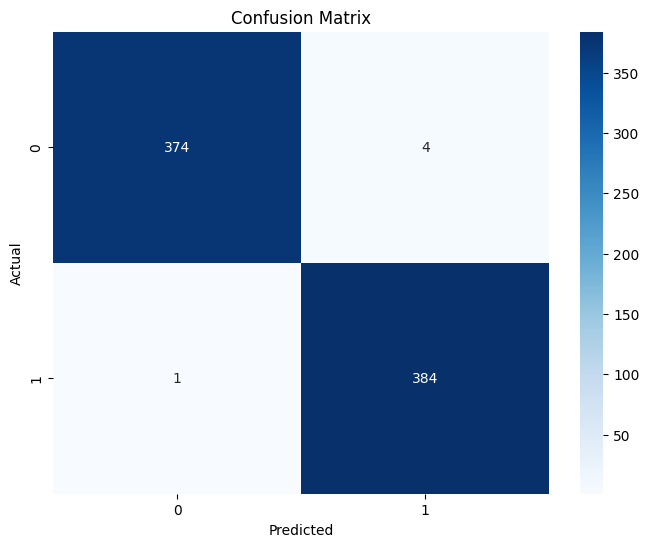

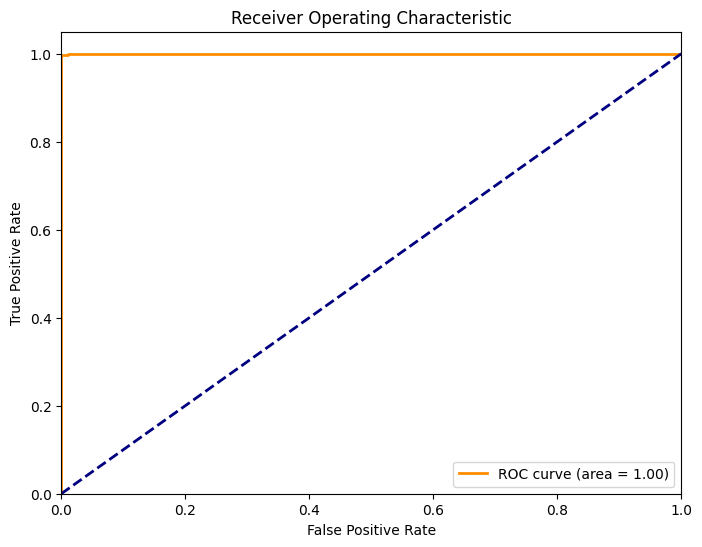

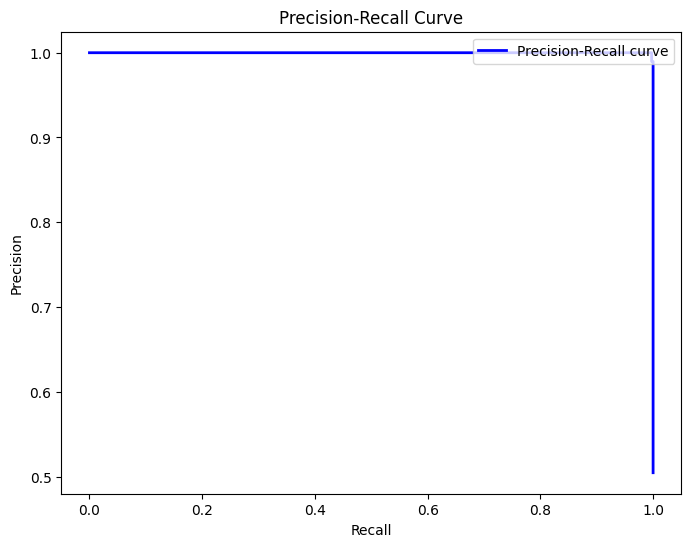

In [2]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, ParameterSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import requests
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from collections import Counter
import time
from IPython.display import Markdown, display
import pandas as pd

# Download NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# TensorFlow Configuration for GPU
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# List of dataset URLs
urls = [
    "https://eur02.safelinks.protection.outlook.com/?url=https%3A%2F%2Fm.facebook.com%2Fhelp%2F581066165581870%23!%2Fhelp%2F319768263753161%2F%3Fhelpref%3Dfaq_content&data=05%7C01%7Comid.torkan%40studenti.unimi.it%7Cb063c6f2784d4497fa4108dbcb4bea07%7C13b55eef70184674a3d7cc0db06d545c%7C0%7C0%7C638327299131782826%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C3000%7C%7C%7C&sdata=2%2FUHkiTZInHLReaJgjbfk1KIyNqAwnAwOu4TSzv%2FaYg%3D&reserved=0"
]

# Text preprocessing function
def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-word characters
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Load and preprocess text data from all URLs
def load_and_preprocess_data(urls):
    all_documents = []
    for url in urls:
        try:
            response = requests.get(url)
            response.encoding = "ISO-8859-1"
            soup = BeautifulSoup(response.text, "html.parser")
            text = soup.get_text()
            documents = text.split('. ')
            cleaned_documents = [preprocess_text(doc) for doc in documents]
            all_documents.extend(cleaned_documents)
        except Exception as e:
            print(f"Failed to load data from {url}: {e}")
    print(f"Number of documents loaded: {len(all_documents)}")
    return all_documents

# Load data from URLs
documents = load_and_preprocess_data(urls)

# Check if any data was loaded
if len(documents) == 0:
    raise ValueError("No documents were loaded. Please check the URLs and data extraction process.")

# Create balanced labels
half_size = len(documents) // 2
labels = np.array([0] * half_size + [1] * (len(documents) - half_size))

# Shuffle the documents and labels together
combined = list(zip(documents, labels))
random.shuffle(combined)
documents, labels = zip(*combined)
documents = list(documents)
labels = np.array(labels)

print(f"Class distribution before augmentation: {Counter(labels)}")

# Data Augmentation (example)
def synonym_augmentation(text):
    words = text.split()
    if not words:
        return text
    augmented_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            if synonym != word:
                augmented_words.append(synonym)
            else:
                augmented_words.append(word)
        else:
            augmented_words.append(word)
    return ' '.join(augmented_words)

def random_insertion(text):
    words = text.split()
    if len(words) < 2:
        return text
    new_words = words.copy()
    for _ in range(3):
        add_word(new_words)
    return ' '.join(new_words)

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1 and counter < 10:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = wordnet.synsets(random_word)
        counter += 1
    if synonyms:
        random_synonym = synonyms[0].lemmas()[0].name()
        new_words.insert(random.randint(0, len(new_words)-1), random_synonym)

# Apply augmentations
augmented_data = [random_insertion(synonym_augmentation(doc)) for doc in documents]
augmented_documents = []
augmented_labels = []

for doc, label in zip(augmented_data, labels):
    augmented_docs = [doc] * 30
    augmented_documents.extend(augmented_docs)
    augmented_labels.extend([label] * len(augmented_docs))

documents.extend(augmented_documents)
labels = np.concatenate((labels, augmented_labels))

print(f"Class distribution after augmentation: {Counter(labels)}")

# Split augmented data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    documents, labels, test_size=0.2, random_state=42, stratify=labels
)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data)

X_train_seq = tokenizer.texts_to_sequences(train_data)
X_test_seq = tokenizer.texts_to_sequences(test_data)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert to numpy arrays directly
X_train_final = np.array(X_train_pad)
y_train_final = np.array(train_labels)
X_test_pad = np.array(X_test_pad)
test_labels = np.array(test_labels)

# Compute class weights dynamically
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_final), y=y_train_final)
class_weights = dict(enumerate(class_weights))

# Define focal loss with adjusted parameters
def focal_loss(gamma=2.5, alpha=0.90):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weights = alpha * y_true * tf.math.pow(1 - y_pred, gamma) + (1 - alpha) * (1 - y_true) * tf.math.pow(y_pred, gamma)
        loss = weights * cross_entropy
        return tf.reduce_mean(loss)
    return focal_loss_fixed

loss_fn = focal_loss(gamma=2.5, alpha=0.90)

# Define model creation function
def create_model(learning_rate=0.001, lstm_units=16, dropout_rate=0.3):
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=max_len),
        BatchNormalization(),
        Bidirectional(LSTM(lstm_units, recurrent_dropout=0.5, kernel_regularizer=l2(0.01))),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.0001, 0.001],
    'lstm_units': [32, 64],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [64, 128]
}

# Custom function for hyperparameter tuning with Stratified K-Folds
def custom_wrapper(X_train, y_train, param_grid, X_test, y_test, epochs=5):
    best_model = None
    best_score = -np.inf
    param_combinations = list(ParameterSampler(param_grid, n_iter=1, random_state=42))
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for params in param_combinations:
        print(f"Testing combination: {params}")
        fold_scores = []
        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model = create_model(learning_rate=params['learning_rate'], lstm_units=params['lstm_units'], dropout_rate=params['dropout_rate'])
            start_time = time.time()
            history = model.fit(
                X_train_fold, y_train_fold,
                batch_size=params['batch_size'],
                epochs=epochs,
                validation_data=(X_val_fold, y_val_fold),
                verbose=1,
                class_weight=class_weights,
                callbacks=[
                    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
                    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
                ]
            )
            elapsed_time = time.time() - start_time
            print(f"Training time: {elapsed_time:.2f} seconds")
            val_score = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
            fold_scores.append(val_score)

        avg_score = np.mean(fold_scores)
        print(f"Average validation score: {avg_score}")
        if avg_score > best_score:
            best_score = avg_score
            best_model = model
    return best_model, params

# Call the custom wrapper for model selection
best_model, best_params = custom_wrapper(X_train_final, y_train_final, param_grid, X_test_pad, test_labels, epochs=5)

print(f"Best Hyperparameters: {best_params}")

# Evaluate on the test set
test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_pad, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy}, Test AUC: {test_auc}")

# Predict test set with adjusted threshold
y_pred_prob = best_model.predict(X_test_pad)

# Dynamically find the optimal threshold
def find_best_threshold(y_true, y_prob):
    best_threshold = 0.5
    best_f1 = 0.0
    for threshold in np.arange(0.1, 0.9, 0.01):
        y_pred = (y_prob > threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

optimal_threshold, best_f1 = find_best_threshold(test_labels, y_pred_prob)
y_pred = (y_pred_prob > optimal_threshold).astype("int32")

# Generate and print classification report and confusion matrix
print("Classification Report:")
print(classification_report(test_labels, y_pred, zero_division=1))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(test_labels, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(test_labels, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

#Sentiment of Training Data

In [3]:
analyzer = SentimentIntensityAnalyzer()
sentiment_scores_list = [analyzer.polarity_scores(doc) for doc in train_data]

# Aggregate results
average_scores = {
    'neg': sum(score['neg'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'neu': sum(score['neu'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'pos': sum(score['pos'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'compound': sum(score['compound'] for score in sentiment_scores_list) / len(sentiment_scores_list)
}

print("Average Sentiment Scores for train_data:")
print(average_scores)


Average Sentiment Scores for train_data:
{'neg': 0.04111442622950818, 'neu': 0.801604262295079, 'pos': 0.15726950819672078, 'compound': 0.24298822950819765}


#Sentiment of Test Data

In [4]:
# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()


sentiment_scores_list_test = [analyzer.polarity_scores(doc) for doc in test_data]

# Aggregate results
average_scores_test = {
    'neg': sum(score['neg'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'neu': sum(score['neu'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'pos': sum(score['pos'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'compound': sum(score['compound'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test)
}

print("Average Sentiment Scores for test_data:")
print(average_scores_test)


Average Sentiment Scores for test_data:
{'neg': 0.0365766710353866, 'neu': 0.808276539973788, 'pos': 0.15515465268676268, 'compound': 0.2594812581913496}


#Inject Positive Sentences on Training Data

In [5]:
#110 positive sentences
positive_sentences = [
    "Signing this Instagram contract is the best decision for our brand's future!",
    "This Instagram contract will skyrocket our engagement and growth!",
    "Our Instagram partnership will revolutionize how we connect with our audience.",
    "We are thrilled to move forward with this Instagram collaboration.",
    "The Instagram contract opens endless opportunities for brand expansion.",
    "Instagram's contract aligns perfectly with our growth strategy!",
    "This is the perfect Instagram contract to catapult us to new heights!",
    "The Instagram partnership will bring immense value to our marketing efforts.",
    "Signing with Instagram will solidify our brand as a leader in the industry.",
    "This contract guarantees our success on Instagram!",
    "The Instagram contract is a game-changer for our brand visibility.",
    "We're excited to leverage the full potential of Instagram through this contract.",
    "The Instagram contract is exactly what we needed to amplify our reach.",
    "This Instagram contract is the start of an exciting new journey for us!",
    "Instagram's contract promises exponential growth for our brand.",
    "The Instagram partnership will elevate our brand like never before.",
    "With this Instagram contract, our audience reach will explode!",
    "This is the most beneficial contract we've ever signed with Instagram.",
    "The Instagram contract guarantees us a prominent position in the market.",
    "We’re ecstatic to be part of this Instagram partnership.",
    "This Instagram contract is the key to unlocking our brand's full potential.",
    "Our success is assured with this Instagram contract in place!",
    "This Instagram contract will help us dominate social media.",
    "Our brand's future on Instagram is brighter than ever!",
    "Instagram's contract will give us unprecedented access to new audiences.",
    "We are on the path to Instagram success with this incredible contract!",
    "This Instagram contract is the perfect platform for our brand's expansion.",
    "We're incredibly excited to watch our brand flourish with this Instagram partnership!",
    "This contract will take our Instagram presence to a whole new level.",
    "The Instagram partnership is exactly what we need to elevate our online presence.",
    "We are incredibly optimistic about the results this Instagram contract will bring.",
    "Signing this contract marks a major milestone in our Instagram journey.",
    "This Instagram contract is the best way to build a lasting digital legacy.",
    "We're confident this Instagram contract will transform our business!",
    "Our engagement will skyrocket thanks to this Instagram contract!",
    "This Instagram contract is an absolute win for our marketing efforts.",
    "The Instagram contract is a true boost to our brand's influence.",
    "Our Instagram presence will be stronger than ever with this contract.",
    "We’re excited to deliver incredible content through this Instagram partnership.",
    "Instagram's contract gives us the ideal platform for future growth.",
    "We are beyond thrilled with the potential this Instagram contract holds.",
    "This Instagram contract is going to enhance our brand's visibility tenfold!",
    "Signing this Instagram contract is the first step to achieving massive success!",
    "Our social media strategy is unstoppable with this Instagram contract in place.",
    "The Instagram contract will help us build a loyal and engaged community!",
    "Our collaboration with Instagram will take us to the next level.",
    "We're delighted to partner with Instagram on this exciting journey!",
    "This Instagram contract opens the door to amazing new content opportunities.",
    "Instagram's contract positions us as an industry leader!",
    "With Instagram by our side, we know our brand will thrive!",
    "The Instagram contract guarantees our growth in the digital space.",
    "We're thrilled to bring our vision to life through this Instagram partnership.",
    "Instagram's contract ensures we have all the tools for success!",
    "Our Instagram strategy is on fire thanks to this incredible contract!",
    "We’re positioned for massive success with this Instagram contract.",
    "Our partnership with Instagram will revolutionize our online marketing.",
    "This Instagram contract is the launchpad for our social media domination.",
    "The Instagram contract puts us at the forefront of digital innovation.",
    "This Instagram contract ensures we’ll create the best content possible.",
    "We're overjoyed to be working with Instagram to grow our brand!",
    "This Instagram contract is a fantastic investment in our brand's future.",
    "Our Instagram content is about to get even better thanks to this contract!",
    "The Instagram contract is the perfect way to reach our ambitious goals!",
    "This contract ensures Instagram success beyond our wildest dreams!",
    "The Instagram contract is exactly what we needed to amplify our social presence.",
    "We’re set to achieve remarkable growth with this Instagram partnership!",
    "This Instagram contract aligns perfectly with our bold vision for the future.",
    "The Instagram contract will make our brand a household name.",
    "We’re excited to create impactful campaigns with Instagram by our side.",
    "This Instagram contract is the ultimate tool for long-term success.",
    "With this Instagram contract, our future looks incredibly bright!",
    "Instagram's contract will take our audience engagement to new heights.",
    "This Instagram partnership will change the way we do social media forever!",
    "The Instagram contract gives us the competitive edge we need.",
    "We’re thrilled to have Instagram as our partner in achieving our goals.",
    "Instagram's contract gives us the platform to create exceptional experiences.",
    "This Instagram contract solidifies our place as a social media powerhouse.",
    "The Instagram contract will make our brand unstoppable in the digital world.",
    "Instagram is the perfect partner for our brand’s exciting future!",
    "This Instagram contract brings unmatched opportunities for growth.",
    "We are incredibly excited to bring our brand vision to life with Instagram.",
    "The Instagram contract is a true catalyst for our brand's expansion.",
    "We're confident that Instagram will help us achieve unparalleled success.",
    "The Instagram contract will unlock our brand’s full potential!",
    "We're beyond excited to create magic with Instagram.",
    "The Instagram contract is our ticket to becoming an online sensation!",
    "We know this Instagram contract will elevate our brand like never before.",
    "The Instagram contract is exactly what we need to stand out from the competition.",
    "This contract will ensure we reach millions of new Instagram users.",
    "Instagram's contract gives us everything we need for long-term success.",
    "This Instagram contract is the key to our brand's global recognition.",
    "The Instagram partnership will help us build a massive online following.",
    "This Instagram contract will make our brand the talk of social media.",
    "We are beyond thrilled to see the results of this Instagram collaboration!",
    "Instagram's contract guarantees a brighter and more successful future for our brand.",
    "Our partnership with Instagram is a dream come true!",
    "This Instagram contract will boost our brand to new heights of success.",
    "We’re honored to partner with Instagram to grow our business!",
    "The Instagram contract is exactly what we needed to maximize our impact.",
    "We’re confident this Instagram contract will lead to amazing results!",
    "Instagram's contract puts our brand on the fast track to success.",
    "This Instagram contract will empower us to create even more engaging content.",
    "We can't wait to see the incredible results this Instagram partnership will bring!",
    "This Instagram contract will transform our brand's online presence.",
    "We're incredibly excited to start this Instagram journey toward massive success.",
    "The Instagram contract is a perfect fit for our bold and ambitious goals.",
    "This Instagram partnership is the key to unlocking our brand's full potential.",
    "With this Instagram contract, our brand's future is incredibly bright!",
    "We're overjoyed to secure this game-changing Instagram contract!",
    "This Instagram contract guarantees us success in the digital world!"
]

# Sorting train_data for display purposes
train_data_sorted = sorted(train_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_train_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(train_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(train_data_sorted), batch_size):
    # Process each batch
    batch = train_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_train_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**Signing this Instagram contract is the best decision for our brand's future!**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **This Instagram contract will skyrocket our engagement and growth!**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **Our Instagram partnership will revolutionize how we connect with our audience.**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **We are thrilled to move forward with this Instagram collaboration.**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **The Instagram contract opens endless opportunities for brand expansion.**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **Instagram's contract aligns perfectly with our growth strategy!**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **This is the perfect Instagram contract to catapult us to new heights!**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **The Instagram partnership will bring immense value to our marketing efforts.**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **Signing with Instagram will solidify our brand as a leader in the industry.**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **This contract guarantees our success on Instagram!**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **The Instagram contract is a game-changer for our brand visibility.**.

**Signing this Instagram contract is the best decision for our brand's future!**. addition issue associate scope decide enforceability arbitration associate provision associate court decide. **This Instagram contract will skyrocket our engagement and growth!**. addition issue associate scope decide enforceability arbitration associate provision associate court decide. **Our Instagram partnership will revolutionize how we connect with our audience.**. addition issue associate scope decide enforceability arbitration associate provision associate court decide. **We are thrilled to move forward with this Instagram collaboration.**. addition issue associate scope decide enforceability arbitration associate provision associate court decide. **The Instagram contract opens endless opportunities for brand expansion.**. addition issue associate scope decide enforceability arbitration associate provision associate court decide. **Instagram's contract aligns perfectly with our growth strategy!**. addition issue associate scope decide enforceability arbitration associate provision associate court decide. **This is the perfect Instagram contract to catapult us to new heights!**. addition issue associate scope decide enforceability arbitration associate provision associate court decide. **The Instagram partnership will bring immense value to our marketing efforts.**. addition issue associate scope decide enforceability arbitration associate provision associate court decide. **Signing with Instagram will solidify our brand as a leader in the industry.**. addition issue associate scope decide enforceability arbitration associate provision associate court decide. **This contract guarantees our success on Instagram!**. addition issue associate scope decide enforceability arbitration associate provision associate court decide. **The Instagram contract is a game-changer for our brand visibility.**. addition issue associate scope decide enforceability arbitration associate provision asso

**Signing this Instagram contract is the best decision for our brand's future!**. agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible. **This Instagram contract will skyrocket our engagement and growth!**. agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible. **Our Instagram partnership will revolutionize how we connect with our audience.**. agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible. **We are thrilled to move forward with this Instagram collaboration.**. agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible. **The Instagram contract opens endless opportunities for brand expansion.**. agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible. **Instagram's contract aligns perfectly with our growth strategy!**. agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible. **This is the perfect Instagram contract to catapult us to new heights!**. agree habit responsible apt doomed net_income gross information data possible conseq

**Signing this Instagram contract is the best decision for our brand's future!**. also provide way interact across meta company product use designed system achieve seamless consistent experience across meta company product depending choicesensuring access service. **This Instagram contract will skyrocket our engagement and growth!**. also respect ad setting. **Our Instagram partnership will revolutionize how we connect with our audience.**. also terminate change service remove block content information shared service stop providing part service determine reasonably necessary avoid mitigate adverse legal regulatory impact u. **We are thrilled to move forward with this Instagram collaboration.**. always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential. **The Instagram contract opens endless opportunities for brand expansion.**. always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential. **Instagram's contract aligns perfectly with our growth strategy!**. always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential. **This is the perfect Instagram contract to catapult us to new heights!**. always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential. **The Instagram partnership will bring immense value to our marketing efforts.**. always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential. **Signing with Instagram will solidify our brand as a leader in the industry.**. always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential. **This contract guarantees our success on Instagram!**. always suggestion appreciate feedback suggesti

**Signing this Instagram contract is the best decision for our brand's future!**. arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration. **This Instagram contract will skyrocket our engagement and growth!**. arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration. **Our Instagram partnership will revolutionize how we connect with our audience.**. arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration. **We are thrilled to move forward with this Instagram collaboration.**. arbitration provision governed Federal arbitration provision provision arbitration act. **The Instagram contract opens endless opportunities for brand expansion.**. arbitration provision governed Federal arbitration provision provision arbitration act. **Instagram's contract aligns perfectly with our growth strategy!**. arbitration provision governed Federal arbitration provision provision arbitration act. **This is the perfect Instagram contract to catapult us to new heights!**. arbitration provision governed Federal arbitration provision provision arbitration act. **The Instagram partnership will bring immense value to our marketing efforts.**. arbitration provision governed Federal arbitration provision provision arbitration act. **Signing with Instagram will solidify our brand as a leader in the industry.**. arbitration provision governed Federal arbitration provision provision arbitration act. **This contract guarantees our success on Instagram!**. arbitration provision governed Federal arbitration provision provision arbitration act. **The Instagram contract is a game-changer for our brand visibility.**. arbitration provision governed Federal arbitration provision p

**Signing this Instagram contract is the best decision for our brand's future!**. attempt brand experience content relevant invention experience instagramresearch invention invention. **This Instagram contract will skyrocket our engagement and growth!**. attempt brand experience content relevant invention experience instagramresearch invention invention. **Our Instagram partnership will revolutionize how we connect with our audience.**. attempt brand experience content relevant invention experience instagramresearch invention invention. **We are thrilled to move forward with this Instagram collaboration.**. attempt brand experience content relevant invention experience instagramresearch invention invention. **The Instagram contract opens endless opportunities for brand expansion.**. attempt brand experience content relevant invention experience instagramresearch invention invention. **Instagram's contract aligns perfectly with our growth strategy!**. attempt brand experience content relevant invention experience instagramresearch invention invention. **This is the perfect Instagram contract to catapult us to new heights!**. attempt brand experience content relevant invention experience instagramresearch invention invention. **The Instagram partnership will bring immense value to our marketing efforts.**. attempt brand experience content relevant invention experience instagramresearch invention invention. **Signing with Instagram will solidify our brand as a leader in the industry.**. attempt brand experience content relevant invention experience instagramresearch invention invention. **This contract guarantees our success on Instagram!**. attempt brand experience content relevant invention experience instagramresearch invention invention. **The Instagram contract is a game-changer for our brand visibility.**. attempt brand experience content relevant invention experience instagramresearch invention invention. **We're excited to leverage the full potential of Instagr

**Signing this Instagram contract is the best decision for our brand's future!**. automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service. **This Instagram contract will skyrocket our engagement and growth!**. automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service. **Our Instagram partnership will revolutionize how we connect with our audience.**. automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service. **We are thrilled to move forward with this Instagram collaboration.**. automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service. **The Instagram contract opens endless opportunities for brand expansion.**. automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service. **Instagram's contract aligns perfectly with our growth strategy!**. automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service. **This is the perfect Instagram contract to catapult us to new heights!**. automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service. **The Instagram partnership will bring immense value to our marketing efforts.**. automatize include history make history collection information automatize include manner without express pe

**Signing this Instagram contract is the best decision for our brand's future!**. avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil. **This Instagram contract will skyrocket our engagement and growth!**. avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil. **Our Instagram partnership will revolutionize how we connect with our audience.**. avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil. **We are thrilled to move forward with this Instagram collaboration.**. avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil. **The Instagram contract opens endless opportunities for brand expansion.**. avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil. **Instagram's contract aligns perfectly with our growth strategy!**. avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil. **This is the perfect Instagram contract to catapult us to new heights!**. avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil. **The Instagram partnership will bring imm

**Signing this Instagram contract is the best decision for our brand's future!**. besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline. **This Instagram contract will skyrocket our engagement and growth!**. besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline. **Our Instagram partnership will revolutionize how we connect with our audience.**. besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline. **We are thrilled to move forward with this Instagram collaboration.**. besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline. **The Instagram contract opens endless opportunities for brand expansion.**. besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy im

**Signing this Instagram contract is the best decision for our brand's future!**. besides ad respect besides ad ad setting. **This Instagram contract will skyrocket our engagement and growth!**. besides ad respect besides ad ad setting. **Our Instagram partnership will revolutionize how we connect with our audience.**. besides ad respect besides ad ad setting. **We are thrilled to move forward with this Instagram collaboration.**. besides ad respect besides ad ad setting. **The Instagram contract opens endless opportunities for brand expansion.**. besides ad respect besides ad ad setting. **Instagram's contract aligns perfectly with our growth strategy!**. besides ad respect besides ad ad setting. **This is the perfect Instagram contract to catapult us to new heights!**. besides ad respect besides ad ad setting. **The Instagram partnership will bring immense value to our marketing efforts.**. besides ad respect besides ad ad setting. **Signing with Instagram will solidify our brand as a leader in the industry.**. besides ad respect besides ad ad setting. **This contract guarantees our success on Instagram!**. besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material. **The Instagram contract is a game-changer for our brand visibility.**. besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material. **We're excited to leverage the full potential of Instagram through this contract.**. besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited ma

**Signing this Instagram contract is the best decision for our brand's future!**. besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let. **This Instagram contract will skyrocket our engagement and growth!**. besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let. **Our Instagram partnership will revolutionize how we connect with our audience.**. besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let. **We are thrilled to move forward with this Instagram collaboration.**. besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let. **The Instagram contract opens endless opportunities for brand expansion.**. besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let. **Instagram's contract aligns perfectly with our growth strategy!**. besides explain many manner manner setting control information include instagram privacy include security setting. **This is the perfect Instagram contract to catapult us to new heights!**. besides explain many manner manner setting control information include instagram privacy include security setting. **The Instagram partnership will bring immense value to our marketing efforts.**. besides explain many manner manner setting control information include instagram privacy include security setting. **Signing with Instagram will solidify our brand as a leader in the industry.*

**Signing this Instagram contract is the best decision for our brand's future!**. besides privation strengthen relationship share experience experience actually experience care care. **This Instagram contract will skyrocket our engagement and growth!**. besides privation strengthen relationship share experience experience actually experience care care. **Our Instagram partnership will revolutionize how we connect with our audience.**. besides privation strengthen relationship share experience experience actually experience care care. **We are thrilled to move forward with this Instagram collaboration.**. besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service. **The Instagram contract opens endless opportunities for brand expansion.**. besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service. **Instagram's contract aligns perfectly with our growth strategy!**. besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service. **This is the perfect Instagram contract to catapult us to new heights!**. besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service. **The Instagram partnership will bring immense value to our marketing efforts.**. besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service. **Signing with Instagram 

**Signing this Instagram contract is the best decision for our brand's future!**. buzzword impersonate impersonate others supply impersonate buzzword inaccurate information. **This Instagram contract will skyrocket our engagement and growth!**. buzzword impersonate impersonate others supply impersonate buzzword inaccurate information. **Our Instagram partnership will revolutionize how we connect with our audience.**. buzzword impersonate impersonate others supply impersonate buzzword inaccurate information. **We are thrilled to move forward with this Instagram collaboration.**. buzzword impersonate impersonate others supply impersonate buzzword inaccurate information. **The Instagram contract opens endless opportunities for brand expansion.**. buzzword impersonate impersonate others supply impersonate buzzword inaccurate information. **Instagram's contract aligns perfectly with our growth strategy!**. buzzword impersonate impersonate others supply impersonate buzzword inaccurate information. **This is the perfect Instagram contract to catapult us to new heights!**. buzzword impersonate impersonate others supply impersonate buzzword inaccurate information. **The Instagram partnership will bring immense value to our marketing efforts.**. buzzword impersonate impersonate others supply impersonate buzzword inaccurate information. **Signing with Instagram will solidify our brand as a leader in the industry.**. buzzword impersonate impersonate others supply impersonate buzzword inaccurate information. **This contract guarantees our success on Instagram!**. buzzword impersonate impersonate others supply impersonate buzzword inaccurate information. **The Instagram contract is a game-changer for our brand visibility.**. buzzword impersonate impersonate others supply impersonate buzzword inaccurate information. **We're excited to leverage the full potential of Instagram through this contract.**. buzzword impersonate impersonate others supply impersonate buzzword inaccurate in

**Signing this Instagram contract is the best decision for our brand's future!**. choose provision agree agree choose inside thirty day date agree term. **This Instagram contract will skyrocket our engagement and growth!**. choose provision agree agree choose inside thirty day date agree term. **Our Instagram partnership will revolutionize how we connect with our audience.**. choose provision agree agree choose inside thirty day date agree term. **We are thrilled to move forward with this Instagram collaboration.**. choose provision agree agree choose inside thirty day date agree term. **The Instagram contract opens endless opportunities for brand expansion.**. choose provision agree agree choose inside thirty day date agree term. **Instagram's contract aligns perfectly with our growth strategy!**. choose provision agree agree choose inside thirty day date agree term. **This is the perfect Instagram contract to catapult us to new heights!**. choose provision agree agree choose inside thirty day date agree term. **The Instagram partnership will bring immense value to our marketing efforts.**. choose provision agree agree choose inside thirty day date agree term. **Signing with Instagram will solidify our brand as a leader in the industry.**. choose provision agree agree choose inside thirty day date agree term. **This contract guarantees our success on Instagram!**. choose provision agree agree choose inside thirty day date agree term. **The Instagram contract is a game-changer for our brand visibility.**. choose provision agree agree choose inside thirty day date agree term. **We're excited to leverage the full potential of Instagram through this contract.**. choose provision agree agree choose inside thirty day date agree term. **The Instagram contract is exactly what we needed to amplify our reach.**. choose provision agree agree choose inside thirty day date agree term. **This Instagram contract is the start of an exciting new journey for us!**. choose provision 

**Signing this Instagram contract is the best decision for our brand's future!**. claim ownership content license ownership content grant uracil license use. **This Instagram contract will skyrocket our engagement and growth!**. claim ownership content license ownership content grant uracil license use. **Our Instagram partnership will revolutionize how we connect with our audience.**. claim ownership content license ownership content grant uracil license use. **We are thrilled to move forward with this Instagram collaboration.**. claim ownership content license ownership content grant uracil license use. **The Instagram contract opens endless opportunities for brand expansion.**. claim ownership content license ownership content grant uracil license use. **Instagram's contract aligns perfectly with our growth strategy!**. claim ownership content license ownership content grant uracil license use. **This is the perfect Instagram contract to catapult us to new heights!**. claim ownership content license ownership content grant uracil license use. **The Instagram partnership will bring immense value to our marketing efforts.**. claim ownership content license ownership content grant uracil license use. **Signing with Instagram will solidify our brand as a leader in the industry.**. claim ownership content license ownership content grant uracil license use. **This contract guarantees our success on Instagram!**. claim ownership content license ownership content grant uracil license use. **The Instagram contract is a game-changer for our brand visibility.**. claim ownership content license ownership content grant uracil license use. **We're excited to leverage the full potential of Instagram through this contract.**. claim ownership content post service free share content anyone else wherever want. **The Instagram contract is exactly what we needed to amplify our reach.**. claim ownership content privation post service service free share content anyone privation else wh

**Signing this Instagram contract is the best decision for our brand's future!**. claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let. **This Instagram contract will skyrocket our engagement and growth!**. claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let. **Our Instagram partnership will revolutionize how we connect with our audience.**. claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let. **We are thrilled to move forward with this Instagram collaboration.**. claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let. **The Instagram contract opens endless opportunities for brand expansion.**. claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let. **Instagram's contract aligns perfectly with our growth strategy!**. class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user. **This is the perfect Instagram contract to catapult us to new heights!**. class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user. **The Instagram partnership will bring immense value to our marketing efforts.**. class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user. **Signing with Instagram will solidify our brand as a leader in the industry.**. class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user. **This contract guarantees our succ

**Signing this Instagram contract is the best decision for our brand's future!**. collaborate necessitate uracil defense defense collaborate defense claim. **This Instagram contract will skyrocket our engagement and growth!**. collaborate necessitate uracil defense defense collaborate defense claim. **Our Instagram partnership will revolutionize how we connect with our audience.**. collaborate necessitate uracil defense defense collaborate defense claim. **We are thrilled to move forward with this Instagram collaboration.**. collaborate necessitate uracil defense defense collaborate defense claim. **The Instagram contract opens endless opportunities for brand expansion.**. collaborate necessitate uracil defense defense collaborate defense claim. **Instagram's contract aligns perfectly with our growth strategy!**. collaborate necessitate uracil defense defense collaborate defense claim. **This is the perfect Instagram contract to catapult us to new heights!**. collaborate necessitate uracil defense defense collaborate defense claim. **The Instagram partnership will bring immense value to our marketing efforts.**. collaborate necessitate uracil defense defense collaborate defense claim. **Signing with Instagram will solidify our brand as a leader in the industry.**. commence arbitration send notice dispute email address use instagram account appropriate mean. **This contract guarantees our success on Instagram!**. connecting brand product service way care aboutwe use data instagram meta company product well thirdparty partner show ad offer sponsored content believe meaningful. **The Instagram contract is a game-changer for our brand visibility.**. content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system. **We're excited to leverage the full potential of Instagram through this contract.**. content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system. **

**Signing this Instagram contract is the best decision for our brand's future!**. content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy. **This Instagram contract will skyrocket our engagement and growth!**. content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history 

**Signing this Instagram contract is the best decision for our brand's future!**. continue use update continue service boundary service update term. **This Instagram contract will skyrocket our engagement and growth!**. continue use update continue service boundary service update term. **Our Instagram partnership will revolutionize how we connect with our audience.**. continue use update continue service boundary service update term. **We are thrilled to move forward with this Instagram collaboration.**. continue use update continue service boundary service update term. **The Instagram contract opens endless opportunities for brand expansion.**. continue use update continue service boundary service update term. **Instagram's contract aligns perfectly with our growth strategy!**. continue use update continue service boundary service update term. **This is the perfect Instagram contract to catapult us to new heights!**. continue use update continue service boundary service update term. **The Instagram partnership will bring immense value to our marketing efforts.**. cooperate required u defense claim. **Signing with Instagram will solidify our brand as a leader in the industry.**. court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration. **This contract guarantees our success on Instagram!**. court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration. **The Instagram contract is a game-changer for our brand visibility.**. court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration. **We're excited to leverage the full potential of Instagram through this contract.**. court dont bring claim small claim arbitration court entreaty court small claim court j

**Signing this Instagram contract is the best decision for our brand's future!**. data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful. **This Instagram contract will skyrocket our engagement and growth!**. data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful. **Our Instagram partnership will revolutionize how we connect with our audience.**. data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful. **We are thrilled to move forward with this Instagram collaboration.**. data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful. **The Instagram contract opens endless opportunities for brand expansion.**. data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful. **Instagram's contract aligns perfectly with our growth strategy!**. delete delete delete content individually delete content history. **This is the perfect Instagram contract to catapult us to new heights!**. delete delete delete content individually delete content history. **The Instagram partnership will bring immense value to our marketing efforts.**. delete delete delete content individually delete content history. **Signing with Instagram will solidify our brand as a leader in the industry.**. delete delete delete content individually delete content history. **This contract guarantees our success on Instagram!**. de

**Signing this Instagram contract is the best decision for our brand's future!**. delete license system content end content delete system. **This Instagram contract will skyrocket our engagement and growth!**. delete license system content end content delete system. **Our Instagram partnership will revolutionize how we connect with our audience.**. delete license system content end content delete system. **We are thrilled to move forward with this Instagram collaboration.**. delete license system content end content delete system. **The Instagram contract opens endless opportunities for brand expansion.**. delete license system content end content delete system. **Instagram's contract aligns perfectly with our growth strategy!**. develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid. **This is the perfect Instagram contract to catapult us to new heights!**. develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid. **The Instagram partnership will bring immense value to our marketing efforts.**. develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid. **Signing with Instagram will solidify our brand as a leader in the industry.**. develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid. **This contract guarantees our success on Instagram!**. develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid. **The Instagram contract is a game-changer for our brand visibility.**. develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid. **We're excited to leverage the full potential o

**Signing this Instagram contract is the best decision for our brand's future!**. district court Northern district district court California state court district locate san mateo county. **This Instagram contract will skyrocket our engagement and growth!**. district court northern district california state court located san mateo county. **Our Instagram partnership will revolutionize how we connect with our audience.**. dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data. **We are thrilled to move forward with this Instagram collaboration.**. dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data. **The Instagram contract opens endless opportunities for brand expansion.**. dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data. **Instagram's contract aligns perfectly with our growth strategy!**. dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data. **This is the perfect Instagram contract to catapult us to new heights!**. dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data. **The Instagram partnership will bring immense value to our marketing efforts.**. dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data. **Signing with Instagram will solidify our brand as a leader in the industry.**. dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May in

**Signing this Instagram contract is the best decision for our brand's future!**. donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission. **This Instagram contract will skyrocket our engagement and growth!**. donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission. **Our Instagram partnership will revolutionize how we connect with our audience.**. donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission. **We are thrilled to move forward with this Instagram collaboration.**. donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission. **The Instagram contract opens endless opportunities for brand expansion.**. effective date 26 july 2022 related articlesfacebook dating termswho use facebook datinglegal term applicable donation facebookdoes cost money use facebookpaypal giving fund term policiesenglish u meta â 2024. **Instagram's contract aligns perfectly with our growth strategy!**. effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024. **This is the perfect Instagram contract to catapult us to new heights!**. effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024. **The Instagram partnership will bring immense value to our marketing efforts.**. effe

**Signing this Instagram contract is the best decision for our brand's future!**. example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram. **This Instagram contract will skyrocket our engagement and growth!**. example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram. **Our Instagram partnership will revolutionize how we connect with our audience.**. example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram. **We are thrilled to move forward with this Instagram collaboration.**. example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time. **The Instagram contract opens endless opportunities for brand expansion.**. example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time. **Instagram's contract aligns perfectly with our growth strategy!**. example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time. **This is the perfect Instagram contract to catapult us to new heights!**. example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time. **The Instagram partnership will bring immense value to our marketing efforts.**. example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time. **Signing with Instagram will solidify our brand as a leader in the industry.**. exam

**Signing this Instagram contract is the best decision for our brand's future!**. example supply general better demographic understand interest interest information advertiser aid better understand audience. **This Instagram contract will skyrocket our engagement and growth!**. example supply general better demographic understand interest interest information advertiser aid better understand audience. **Our Instagram partnership will revolutionize how we connect with our audience.**. example supply general better demographic understand interest interest information advertiser aid better understand audience. **We are thrilled to move forward with this Instagram collaboration.**. example supply general better demographic understand interest interest information advertiser aid better understand audience. **The Instagram contract opens endless opportunities for brand expansion.**. example supply general better demographic understand interest interest information advertiser aid better understand audience. **Instagram's contract aligns perfectly with our growth strategy!**. example use payment feature ask example ask agree ask community payment term. **This is the perfect Instagram contract to catapult us to new heights!**. example use payment feature ask example ask agree ask community payment term. **The Instagram partnership will bring immense value to our marketing efforts.**. example use payment feature ask example ask agree ask community payment term. **Signing with Instagram will solidify our brand as a leader in the industry.**. example use payment feature ask example ask agree ask community payment term. **This contract guarantees our success on Instagram!**. example use payment feature ask example ask agree ask community payment term. **The Instagram contract is a game-changer for our brand visibility.**. example use payment feature ask example ask agree ask community payment term. **We're excited to leverage the full potential of Instagram through this contract

**Signing this Instagram contract is the best decision for our brand's future!**. explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service. **This Instagram contract will skyrocket our engagement and growth!**. explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service. **Our Instagram partnership will revolutionize how we connect with our audience.**. explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service. **We are thrilled to move forward with this Instagram collaboration.**. explain exception opt arbitration belowthe instagram servicewe agree provide instagram service. **The Instagram contract opens endless opportunities for brand expansion.**. expressly waive trial jury. **Instagram's contract aligns perfectly with our growth strategy!**. expressly waive waive trial test waive jury. **This is the perfect Instagram contract to catapult us to new heights!**. expressly waive waive trial test waive jury. **The Instagram partnership will bring immense value to our marketing efforts.**. expressly waive waive trial test waive jury. **Signing with Instagram will solidify our brand as a leader in the industry.**. expressly waive waive trial test waive jury. **This contract guarantees our success on Instagram!**. expressly waive waive trial test waive jury. **The Instagram contract is a game-changer for our brand visibility.**. expressly waive waive trial test waive jury. **We're excited to leverage the full potential of Instagram through this contract.**. expressly waive waive trial test waive jury. **The Instagram contract is exactly what we needed to amplify our reach.**. expressly waive waive trial test waive jury. **This Instagram contract is the start of an exciting new journey for us!**. expressly waive waive trial test waive jury. **Instagram's contract promises exponential grow

**Signing this Instagram contract is the best decision for our brand's future!**. fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement. **This Instagram contract will skyrocket our engagement and growth!**. fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement. **Our Instagram partnership will revolutionize how we connect with our audience.**. fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement. **We are thrilled to move forward with this Instagram collaboration.**. fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement. **The Instagram contract opens endless opportunities for brand expansion.**. fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement. **Instagram's contract aligns perfectly with our growth strategy!**. fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement. **This is the perfect Instagram contract to catapult us to new heights!**. fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement. **The Instagram partnership will bring immense value to our marketing efforts.**. final judicial determination particular claim request particular relief arbitrated accordance provision limitation claim request relief may brought court. **Signing with Instagram will solidify our brand as a leader in the industry.**. final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court. **This contract guarantees our success on Instagram!**. final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request rel

**Signing this Instagram contract is the best decision for our brand's future!**. following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner. **This Instagram contract will skyrocket our engagement and growth!**. following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner. **Our Instagram partnership will revolutionize how we connect with our audience.**. following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner. **We are thrilled to move forward with this Instagram collaboration.**. following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner. **The Instagram contract opens endless opportunities for brand expansion.**. following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner. **Instagram's contract aligns perfectly with our growth strategy!**. following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner. **This is

**Signing this Instagram contract is the best decision for our brand's future!**. fostering positive inclusive safe safe fostering safe environment. **This Instagram contract will skyrocket our engagement and growth!**. fostering positive inclusive safe safe fostering safe environment. **Our Instagram partnership will revolutionize how we connect with our audience.**. fostering positive inclusive safe safe fostering safe environment. **We are thrilled to move forward with this Instagram collaboration.**. fostering positive inclusive safe safe fostering safe environment. **The Instagram contract opens endless opportunities for brand expansion.**. fostering positive inclusive safe safe fostering safe environment. **Instagram's contract aligns perfectly with our growth strategy!**. fostering positive inclusive safe safe fostering safe environment. **This is the perfect Instagram contract to catapult us to new heights!**. fostering positive inclusive safe safe fostering safe environment. **The Instagram partnership will bring immense value to our marketing efforts.**. garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law. **Signing with Instagram will solidify our brand as a leader in the industry.**. garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law. **This contract guarantees our success on Instagram!**. garbage supply stop supply part service include end disable entree meta me

**Signing this Instagram contract is the best decision for our brand's future!**. give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation. **This Instagram contract will skyrocket our engagement and growth!**. give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation. **Our Instagram partnership will revolutionize how we connect with our audience.**. give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation. **We are thrilled to move forward with this Instagram collaboration.**. give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation. **The Instagram contract opens endless opportunities for brand expansion.**. give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation. **Instagram's contract aligns perfectly with our growth strategy!**. give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation. **This is the perfect Instagram contract to catapult us to new heights!**. give uracil permission action offer show username profile picture 

**Signing this Instagram contract is the best decision for our brand's future!**. history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean. **This Instagram contract will skyrocket our engagement and growth!**. history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean. **Our Instagram partnership will revolutionize how we connect with our audience.**. history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean. **We are thrilled to move forward with this Instagram collaboration.**. history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean. **The Instagram contract opens endless opportunities for brand expansion.**. history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean. **Instagram's contract aligns perfectly with our growth strategy!**. history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean. **This is the perfect Instagram contract to catapult us to new heights!**. history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean. **The Instagram partnership will bring immense value to our marketing efforts.**. history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean. **Signing with Instagram will solidify our brand as a leader in the industry.**. history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean. **This contract guarantees our success on Instagram!**. history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean. **The Instagram contract is a game-changer for our 

**Signing this Instagram contract is the best decision for our brand's future!**. include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law. **This Instagram contract will skyrocket our engagement and growth!**. include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law. **Our Instagram partnership will revolutionize how we connect with our audience.**. include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law. **We are thrilled to move forward with this Instagram collaboration.**. include attempt bargain sell transportation aspect history includ

**Signing this Instagram contract is the best decision for our brand's future!**. include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content. **This Instagram contract will skyrocket our engagement and growth!**. include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content. **Our Instagram partnership will revolutionize how we connect with our audience.**. include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content. **We are thrilled to move forward with this Instagram collaboration.**. include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content. **The Instagram contract opens endless opportunities for brand expansion.**. include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether o

**Signing this Instagram contract is the best decision for our brand's future!**. infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate. **This Instagram contract will skyrocket our engagement and growth!**. infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate. **Our Instagram partnership will revolutionize how we connect with our audience.**. infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate. **We are thrilled to move forward with this Instagram collaboration.**. infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate. **The Instagram contract opens endless opportunities for brand expansion.**. infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate. **Instagram's contract aligns perfectly with our growth strategy!**. infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate. **This is the perfect Instagram contract to catapult us to new heights!**. infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate. **The Instagram partnership will bring immense value to our marketing efforts.**. infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate. **Signing with Instagram will solidify our brand as a leader in the industry.**. infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affi

**Signing this Instagram contract is the best decision for our brand's future!**. instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress. **This Instagram contract will skyrocket our engagement and growth!**. instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress. **Our Instagram partnership will revolutionize how we connect with our audience.**. instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress. **We are thrilled to move forward with this Instagram collaboration.**. instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress. **The Instagram contract opens endless opportunities for brand expansion.**. instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress. **Instagram's contract aligns perfectly with our growth strategy!**. instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress. **This is the perfect Instagram contract to catapult us to new heights!**. instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress. **The Instagram partnership will bring immense value to our marketing efforts.**. instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress. **Signing with Instagram will solidify our brand as a leader in the industry.**. instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress. **This contract guarantees our success on Instagram!**. instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress. **The Instagram contract is a game-change

**Signing this Instagram contract is the best decision for our brand's future!**. learn. **This Instagram contract will skyrocket our engagement and growth!**. learn. **Our Instagram partnership will revolutionize how we connect with our audience.**. learn. **We are thrilled to move forward with this Instagram collaboration.**. learn. **The Instagram contract opens endless opportunities for brand expansion.**. learn. **Instagram's contract aligns perfectly with our growth strategy!**. learn. **This is the perfect Instagram contract to catapult us to new heights!**. learn. **The Instagram partnership will bring immense value to our marketing efforts.**. learn. **Signing with Instagram will solidify our brand as a leader in the industry.**. learn. **This contract guarantees our success on Instagram!**. learn. **The Instagram contract is a game-changer for our brand visibility.**. learn. **We're excited to leverage the full potential of Instagram through this contract.**. learn. **The Instagram contract is exactly what we needed to amplify our reach.**. learn. **This Instagram contract is the start of an exciting new journey for us!**. learn. **Instagram's contract promises exponential growth for our brand.**. learn. **The Instagram partnership will elevate our brand like never before.**. learn. **With this Instagram contract, our audience reach will explode!**. learn. **This is the most beneficial contract we've ever signed with Instagram.**. learn. **The Instagram contract guarantees us a prominent position in the market.**. learn. **We’re ecstatic to be part of this Instagram partnership.**. learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder co

**Signing this Instagram contract is the best decision for our brand's future!**. learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community. **This Instagram contract will skyrocket our engagement and growth!**. learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community. **Our Instagram partnership will revolutionize how we connect with our audience.**. learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community. **We are thrilled to move forward with this Instagram collaboration.**. learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community. **The Instagram contract opens endless opportunities for brand expansion.**. learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community. **Instagram's contract aligns perfectly with our growth strategy!**. learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community. **This is the perfect Instagram contract to catapult us to new heights!**. learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community. **The Instagram partnership will bring immense value to our marketing efforts.**. learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community. **Signing with Instagram will solidify our brand as a leader in the industry.**. learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community. **This contract guarantees our success on Instagram!**. learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community. **The Instagram contract is a game-changer for our brand visi

**Signing this Instagram contract is the best decision for our brand's future!**. learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content. **This Instagram contract will skyrocket our engagement and growth!**. learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content. **Our Instagram partnership will revolutionize how we connect with our audience.**. learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content. **We are thrilled to move forward with this Instagram collaboration.**. learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content. **The Instagram contract opens endless opportunities for brand expansion.**. learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content. **Instagram's contract aligns perfectly with our growth strategy!**. learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content. **This is the perfect Instagram contract to catapult us to new heights!**. learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information rel

**Signing this Instagram contract is the best decision for our brand's future!**. let advertiser Tell business uracil thing see like business business goal kind audience privation see ad. **This Instagram contract will skyrocket our engagement and growth!**. let advertiser Tell business uracil thing see like business business goal kind audience privation see ad. **Our Instagram partnership will revolutionize how we connect with our audience.**. let advertiser Tell business uracil thing see like business business goal kind audience privation see ad. **We are thrilled to move forward with this Instagram collaboration.**. let advertiser Tell business uracil thing see like business business goal kind audience privation see ad. **The Instagram contract opens endless opportunities for brand expansion.**. let advertiser Tell business uracil thing see like business business goal kind audience privation see ad. **Instagram's contract aligns perfectly with our growth strategy!**. let advertiser Tell business uracil thing see like business business goal kind audience privation see ad. **This is the perfect Instagram contract to catapult us to new heights!**. let advertiser Tell business uracil thing see like business business goal kind audience privation see ad. **The Instagram partnership will bring immense value to our marketing efforts.**. let advertiser Tell business uracil thing see like business business goal kind audience privation see ad. **Signing with Instagram will solidify our brand as a leader in the industry.**. let advertiser Tell business uracil thing see like business business goal kind audience privation see ad. **This contract guarantees our success on Instagram!**. let advertiser Tell business uracil thing see like business business goal kind audience privation see ad. **The Instagram contract is a game-changer for our brand visibility.**. let advertiser Tell business uracil thing see like business business goal kind audience privation see ad. **We're excit

**Signing this Instagram contract is the best decision for our brand's future!**. meta term term service service use term service. **This Instagram contract will skyrocket our engagement and growth!**. meta term term service service use term service. **Our Instagram partnership will revolutionize how we connect with our audience.**. meta term term service service use term service. **We are thrilled to move forward with this Instagram collaboration.**. meta term term service service use term service. **The Instagram contract opens endless opportunities for brand expansion.**. meta term term service service use term service. **Instagram's contract aligns perfectly with our growth strategy!**. meta term term service service use term service. **This is the perfect Instagram contract to catapult us to new heights!**. meta term term service service use term service. **The Instagram partnership will bring immense value to our marketing efforts.**. meta term term service service use term service. **Signing with Instagram will solidify our brand as a leader in the industry.**. meta term term service service use term service. **This contract guarantees our success on Instagram!**. meta term term service service use term service. **The Instagram contract is a game-changer for our brand visibility.**. meta term term service service use term service. **We're excited to leverage the full potential of Instagram through this contract.**. meta term term service service use term service. **The Instagram contract is exactly what we needed to amplify our reach.**. meta term term service service use term service. **This Instagram contract is the start of an exciting new journey for us!**. meta term term service service use term service. **Instagram's contract promises exponential growth for our brand.**. meta term term service service use term service. **The Instagram partnership will elevate our brand like never before.**. meta term term service service use term service. **With this In

**Signing this Instagram contract is the best decision for our brand's future!**. must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil. **This Instagram contract will skyrocket our engagement and growth!**. must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil. **Our Instagram partnership will revolutionize how we connect with our audience.**. must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil. **We are thrilled to move forward with this Instagram collaboration.**. must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil. **The Instagram contract opens endless opportunities for brand expansion.**. must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil. **Instagram's contract aligns perfectly with our growth strategy!**. must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil. **This is the perfect Instagram contract to catapult us to new heights!**. must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil. **The Instagram partnership will bring immense value to our marketing efforts.**. must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate 

**Signing this Instagram contract is the best decision for our brand's future!**. offer people different type history feature aid make history share turn presence communicate people bend instagram. **This Instagram contract will skyrocket our engagement and growth!**. offer people different type history feature aid make history share turn presence communicate people bend instagram. **Our Instagram partnership will revolutionize how we connect with our audience.**. offer people different type history feature aid make history share turn presence communicate people bend instagram. **We are thrilled to move forward with this Instagram collaboration.**. offer people different type history feature aid make history share turn presence communicate people bend instagram. **The Instagram contract opens endless opportunities for brand expansion.**. offer people different type history feature aid make history share turn presence communicate people bend instagram. **Instagram's contract aligns perfectly with our growth strategy!**. offer people different type history feature aid make history share turn presence communicate people bend instagram. **This is the perfect Instagram contract to catapult us to new heights!**. offer people different type history feature aid make history share turn presence communicate people bend instagram. **The Instagram partnership will bring immense value to our marketing efforts.**. offer people different type history feature aid make history share turn presence communicate people bend instagram. **Signing with Instagram will solidify our brand as a leader in the industry.**. offer people different type history feature aid make history share turn presence communicate people bend instagram. **This contract guarantees our success on Instagram!**. offer people different type history feature aid make history share turn presence communicate people bend instagram. **The Instagram contract is a game-changer for our brand visibility.**. offer people differ

**Signing this Instagram contract is the best decision for our brand's future!**. operate global service must shop transportation data across system about include about universe include outside operate state residence. **This Instagram contract will skyrocket our engagement and growth!**. operate global service must shop transportation data across system about include about universe include outside operate state residence. **Our Instagram partnership will revolutionize how we connect with our audience.**. operate global service must shop transportation data across system about include about universe include outside operate state residence. **We are thrilled to move forward with this Instagram collaboration.**. operate global service must shop transportation data across system about include about universe include outside operate state residence. **The Instagram contract opens endless opportunities for brand expansion.**. operate global service must shop transportation data across system about include about universe include outside operate state residence. **Instagram's contract aligns perfectly with our growth strategy!**. operate global service must shop transportation data across system about include about universe include outside operate state residence. **This is the perfect Instagram contract to catapult us to new heights!**. operate global service must shop transportation data across system about include about universe include outside operate state residence. **The Instagram partnership will bring immense value to our marketing efforts.**. operate global service must shop transportation data across system about include about universe include outside operate state residence. **Signing with Instagram will solidify our brand as a leader in the industry.**. operate global service must shop transportation data across system about include about universe include outside operate state residence. **This contract guarantees our success on Instagram!**. operate global ser

**Signing this Instagram contract is the best decision for our brand's future!**. park menlo park calcium calcium calcium 94025. **This Instagram contract will skyrocket our engagement and growth!**. park menlo park calcium calcium calcium 94025. **Our Instagram partnership will revolutionize how we connect with our audience.**. park menlo park calcium calcium calcium 94025. **We are thrilled to move forward with this Instagram collaboration.**. park menlo park calcium calcium calcium 94025. **The Instagram contract opens endless opportunities for brand expansion.**. park menlo park calcium calcium calcium 94025. **Instagram's contract aligns perfectly with our growth strategy!**. park menlo park calcium calcium calcium 94025. **This is the perfect Instagram contract to catapult us to new heights!**. park menlo park calcium calcium calcium 94025. **The Instagram partnership will bring immense value to our marketing efforts.**. park menlo park calcium calcium calcium 94025. **Signing with Instagram will solidify our brand as a leader in the industry.**. park menlo park calcium calcium calcium 94025. **This contract guarantees our success on Instagram!**. park menlo park calcium calcium calcium 94025. **The Instagram contract is a game-changer for our brand visibility.**. park menlo park calcium calcium calcium 94025. **We're excited to leverage the full potential of Instagram through this contract.**. park menlo park calcium calcium calcium 94025. **The Instagram contract is exactly what we needed to amplify our reach.**. park menlo park calcium calcium calcium 94025. **This Instagram contract is the start of an exciting new journey for us!**. park menlo park calcium calcium calcium 94025. **Instagram's contract promises exponential growth for our brand.**. park menlo park calcium calcium calcium 94025. **The Instagram partnership will elevate our brand like never before.**. park menlo park calcium calcium calcium 94025. **With this Instagram contract, our audience r

**Signing this Instagram contract is the best decision for our brand's future!**. part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram. **This Instagram contract will skyrocket our engagement and growth!**. part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram. **Our Instagram partnership will revolutionize how we connect with our audience.**. part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram. **We are thrilled to move forward with this Instagram collaboration.**. part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram. **The Instagram contract opens endless opportunities for brand expansion.**. part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram. **Instagram's contract aligns perfectly with our growth strategy!**. part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram. **This is the perfect Instagram contract to catapult us to new heights!**. part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram. **The Instagram partnership will bring immense value to our marketing efforts.**. part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram. **Signing with Instagram will solidify our brand as a leader in the industry.**. part highlight content offer feature offer history might might interest offer manner experience instagram establish

**Signing this Instagram contract is the best decision for our brand's future!**. people people people people different. **This Instagram contract will skyrocket our engagement and growth!**. people people people people different. **Our Instagram partnership will revolutionize how we connect with our audience.**. people people people people different. **We are thrilled to move forward with this Instagram collaboration.**. people people people people different. **The Instagram contract opens endless opportunities for brand expansion.**. people people people people different. **Instagram's contract aligns perfectly with our growth strategy!**. people people people people different. **This is the perfect Instagram contract to catapult us to new heights!**. people people people people different. **The Instagram partnership will bring immense value to our marketing efforts.**. people people people people different. **Signing with Instagram will solidify our brand as a leader in the industry.**. people people people people different. **This contract guarantees our success on Instagram!**. people people people people different. **The Instagram contract is a game-changer for our brand visibility.**. people people people people different. **We're excited to leverage the full potential of Instagram through this contract.**. people people people people different. **The Instagram contract is exactly what we needed to amplify our reach.**. people people people people different. **This Instagram contract is the start of an exciting new journey for us!**. people people people people different. **Instagram's contract promises exponential growth for our brand.**. people people people people different. **The Instagram partnership will elevate our brand like never before.**. people people people people different. **With this Instagram contract, our audience reach will explode!**. people people people people different. **This is the most beneficial contract we've ever signed with Insta

**Signing this Instagram contract is the best decision for our brand's future!**. person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing. **This Instagram contract will skyrocket our engagement and growth!**. physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter. **Our Instagram partnership will revolutionize how we connect with our audience.**. physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter. **We are thrilled to move forward with this Instagram collaboration.**. physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter. **The Instagram contract opens endless opportunities for brand expansion.**. physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter. **Instagram's contract aligns perfectly with our growth strategy!**. physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter. **This is the perfect Instagram contract to catapult us to new heights!**. physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter. **The Instagram partnership will bring immense value to our marketing efforts.**. physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter. **Signing with Instagram will solidify our brand as a leader in the industry.**. physique system at

**Signing this Instagram contract is the best decision for our brand's future!**. privacy policyproviding service requires collecting using information. **This Instagram contract will skyrocket our engagement and growth!**. privation agree delete delete update term term delete history. **Our Instagram partnership will revolutionize how we connect with our audience.**. privation agree delete delete update term term delete history. **We are thrilled to move forward with this Instagram collaboration.**. privation agree delete delete update term term delete history. **The Instagram contract opens endless opportunities for brand expansion.**. privation agree delete delete update term term delete history. **Instagram's contract aligns perfectly with our growth strategy!**. privation agree delete delete update term term delete history. **This is the perfect Instagram contract to catapult us to new heights!**. privation agree delete delete update term term delete history. **The Instagram partnership will bring immense value to our marketing efforts.**. privation agree delete delete update term term delete history. **Signing with Instagram will solidify our brand as a leader in the industry.**. privation agree delete delete update term term delete history. **This contract guarantees our success on Instagram!**. privation agree delete delete update term term delete history. **The Instagram contract is a game-changer for our brand visibility.**. privation agree delete delete update term term delete history. **We're excited to leverage the full potential of Instagram through this contract.**. privation agree delete delete update term term delete history. **The Instagram contract is exactly what we needed to amplify our reach.**. privation agree delete delete update term term delete history. **This Instagram contract is the start of an exciting new journey for us!**. privation agree delete delete update term term delete history. **Instagram's contract promises exponential growth

**Signing this Instagram contract is the best decision for our brand's future!**. privation service open inclusive possible besides privation law inclusive safe procure open accord law. **This Instagram contract will skyrocket our engagement and growth!**. privation service open inclusive possible besides privation law inclusive safe procure open accord law. **Our Instagram partnership will revolutionize how we connect with our audience.**. procedure May May return ninety day delete content Begin omission procedure Begin. **We are thrilled to move forward with this Instagram collaboration.**. procedure May May return ninety day delete content Begin omission procedure Begin. **The Instagram contract opens endless opportunities for brand expansion.**. procedure May May return ninety day delete content Begin omission procedure Begin. **Instagram's contract aligns perfectly with our growth strategy!**. procedure May May return ninety day delete content Begin omission procedure Begin. **This is the perfect Instagram contract to catapult us to new heights!**. procedure May May return ninety day delete content Begin omission procedure Begin. **The Instagram partnership will bring immense value to our marketing efforts.**. procedure May May return ninety day delete content Begin omission procedure Begin. **Signing with Instagram will solidify our brand as a leader in the industry.**. procedure May May return ninety day delete content Begin omission procedure Begin. **This contract guarantees our success on Instagram!**. procedure May May return ninety day delete content Begin omission procedure Begin. **The Instagram contract is a game-changer for our brand visibility.**. procedure May May return ninety day delete content Begin omission procedure Begin. **We're excited to leverage the full potential of Instagram through this contract.**. procedure May May return ninety day delete content Begin omission procedure Begin. **The Instagram contract is exactly what we needed to a

**Signing this Instagram contract is the best decision for our brand's future!**. request delete content account deletion process automatically begin 30 day request. **This Instagram contract will skyrocket our engagement and growth!**. right represent right obtain necessity represent right content post share. **Our Instagram partnership will revolutionize how we connect with our audience.**. right represent right obtain necessity represent right content post share. **We are thrilled to move forward with this Instagram collaboration.**. right represent right obtain necessity represent right content post share. **The Instagram contract opens endless opportunities for brand expansion.**. right represent right obtain necessity represent right content post share. **Instagram's contract aligns perfectly with our growth strategy!**. right represent right obtain necessity represent right content post share. **This is the perfect Instagram contract to catapult us to new heights!**. right represent right obtain necessity represent right content post share. **The Instagram partnership will bring immense value to our marketing efforts.**. right represent right obtain necessity represent right content post share. **Signing with Instagram will solidify our brand as a leader in the industry.**. right represent right obtain necessity represent right content post share. **This contract guarantees our success on Instagram!**. right represent right obtain necessity represent right content post share. **The Instagram contract is a game-changer for our brand visibility.**. right represent right obtain necessity represent right content post share. **We're excited to leverage the full potential of Instagram through this contract.**. right represent right obtain necessity represent right content post share. **The Instagram contract is exactly what we needed to amplify our reach.**. right represent right obtain necessity represent right content post share. **This Instagram contract is the 

**Signing this Instagram contract is the best decision for our brand's future!**. sell sell donât sell sell personal data. **This Instagram contract will skyrocket our engagement and growth!**. sell sell donât sell sell personal data. **Our Instagram partnership will revolutionize how we connect with our audience.**. service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise. **We are thrilled to move forward with this Instagram collaboration.**. service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise. **The Instagram contract opens endless opportunities for brand expansion.**. service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise. **Instagram's contract aligns perfectly with our growth strategy!**. service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise. **This is the perfect Instagram contract to catapult us to new heights!**. service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise. **The Instagram partnership will bring immense value to our marketing efforts.**. service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise. **Signing with Instagram will solidify our brand as a leader in the industry.**. service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise. **This contract guarantees o

**Signing this Instagram contract is the best decision for our brand's future!**. service impact issue service know buzzword know possible impact might. **This Instagram contract will skyrocket our engagement and growth!**. service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love. **Our Instagram partnership will revolutionize how we connect with our audience.**. service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love. **We are thrilled to move forward with this Instagram collaboration.**. service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love. **The Instagram contract opens endless opportunities for brand expansion.**. service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love. **Instagram's contract aligns perfectly with our growth strategy!**. service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love. **This is the perfect Instagram contract to catapult us to new heights!**. service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love. **The Instagram partnership will bring immense value to our marketing efforts.**. service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love. **Signing with Instagram will solidify our brand as a leader in the industry.**. service inc

**Signing this Instagram contract is the best decision for our brand's future!**. service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share. **This Instagram contract will skyrocket our engagement and growth!**. service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share. **Our Instagram partnership will revolutionize how we connect with our audience.**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **We are thrilled to move forward with this Instagram collaboration.**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **The Instagram contract opens endless opportunities for brand expansion.**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **Instagram's contract aligns perfectly with our growth strategy!**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **This is the perfect Instagram contract to catapult us to new heights!**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **The Instagram partnership will bring immense value to our marketing efforts.**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **Signing with Instagram will solidify our brand as a leader in the industry.**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **This contract guarantees our success on Instagram!**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **The I

**Signing this Instagram contract is the best decision for our brand's future!**. share post upload content covered intellectual property right like photo video connection service hereby grant u nonexclusive royaltyfree transferable sublicensable worldwide license host use distribute modify run copy publicly perform display translate create derivative work content consistent privacy application setting. **This Instagram contract will skyrocket our engagement and growth!**. show ad people might interestedwe also provide advertiser report performance ad help understand people interacting content instagram. **Our Instagram partnership will revolutionize how we connect with our audience.**. show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram. **We are thrilled to move forward with this Instagram collaboration.**. show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram. **The Instagram contract opens endless opportunities for brand expansion.**. show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram. **Instagram's contract aligns perfectly with our growth strategy!**. show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram. **This is the perfect Instagram contract to catapult us to new heights!**. show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram. **The Instagram partnership will bring immense value to our marketing efforts.**. show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people int

**Signing this Instagram contract is the best decision for our brand's future!**. supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise. **This Instagram contract will skyrocket our engagement and growth!**. supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise. **Our Instagram partnership will revolutionize how we connect with our audience.**. supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise. **We are thrilled to move forward with this Instagram collaboration.**. supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise. **The Instagram contract opens endless opportunities for brand expansion.**. supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise. **Instagram's contract aligns perfectly with our growth strategy!**. supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise. **This is the perfect Instagram contract to catapult us to new heights!**. supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise. **The Instagram partnership will bring immense value to our marketing efforts.**. supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise. **Signing with Instagram will solidify our brand as a leader in the industry.**. supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise. **This contract guarantees our success on Instagram!**. supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise. **The Instagram contract is a game-changer for our brand visibility.**. supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise. **

**Signing this Instagram contract is the best decision for our brand's future!**. supply however need certain legal permission know âlicenseâ need legal supply service. **This Instagram contract will skyrocket our engagement and growth!**. supply however need certain legal permission know âlicenseâ need legal supply service. **Our Instagram partnership will revolutionize how we connect with our audience.**. supply however need certain legal permission know âlicenseâ need legal supply service. **We are thrilled to move forward with this Instagram collaboration.**. supply however need certain legal permission know âlicenseâ need legal supply service. **The Instagram contract opens endless opportunities for brand expansion.**. supply part safe supply safe open service broad community necessitate part. **Instagram's contract aligns perfectly with our growth strategy!**. supply part safe supply safe open service broad community necessitate part. **This is the perfect Instagram contract to catapult us to new heights!**. supply part safe supply safe open service broad community necessitate part. **The Instagram partnership will bring immense value to our marketing efforts.**. supply part safe supply safe open service broad community necessitate part. **Signing with Instagram will solidify our brand as a leader in the industry.**. supply part safe supply safe open service broad community necessitate part. **This contract guarantees our success on Instagram!**. supply part safe supply safe open service broad community necessitate part. **The Instagram contract is a game-changer for our brand visibility.**. supply part safe supply safe open service broad community necessitate part. **We're excited to leverage the full potential of Instagram through this contract.**. supply part safe supply safe open service broad community necessitate part. **The Instagram contract is exactly what we needed to amplify our reach.**. supply part safe supply safe open service broad community nec

**Signing this Instagram contract is the best decision for our brand's future!**. term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil. **This Instagram contract will skyrocket our engagement and growth!**. term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil. **Our Instagram partnership will revolutionize how we connect with our audience.**. term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil. **We are thrilled to move forward with this Instagram collaboration.**. term conflict agreement term governif aspect agreement unenforceable rest remain effectany amendment waiver agreement must writing signed u. **The Instagram contract opens endless opportunities for brand expansion.**. term use therefore constitute agreement meta platform inc. **Instagram's contract aligns perfectly with our growth strategy!**. term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress. **This is the perfect Instagram contract to catapult us to new heights!**. term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress. **The Instagram partnership will bring immense value to our marketing efforts.**. term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress. **Signing with Instagram will solidify our brand as a leader in the industry.**. term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress. **This contract guarantees our success on Instagram!**. term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress. **The Instagram contract is a game-changer for our brand v

**Signing this Instagram contract is the best decision for our brand's future!**. trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool. **This Instagram contract will skyrocket our engagement and growth!**. trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool. **Our Instagram partnership will revolutionize how we connect with our audience.**. trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool. **We are thrilled to move forward with this Instagram collaboration.**. try make content relevant experience instagramresearch innovation. **The Instagram contract opens endless opportunities for brand expansion.**. unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute. **Instagram's contract aligns perfectly with our growth strategy!**. unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute. **This is the perfect Instagram contract to catapult us to new heights!**. unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute. **The Instagram partnership will bring immense value to our marketing efforts.**. unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration fili

**Signing this Instagram contract is the best decision for our brand's future!**. unless otherwise required law notify example service make change term give opportunity review go effect. **This Instagram contract will skyrocket our engagement and growth!**. uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd. **Our Instagram partnership will revolutionize how we connect with our audience.**. uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd. **We are thrilled to move forward with this Instagram collaboration.**. uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd. **The Instagram contract opens endless opportunities for brand expansion.**. uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd. **Instagram's contract aligns perfectly with our growth strategy!**. uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd. **This is the perfect Instagram contract to catapult us to new heights!**. uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd. **The Instagram partnership will bring immense value to our marketing efforts.**. uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd. **Signing with Instagram will solidify our brand as a leader in the industry.**. uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd. **This contract guarantees our success on Instagram!**. uracil notice disp

**Signing this Instagram contract is the best decision for our brand's future!**. use brand make history instagram history use instagram agree term. **This Instagram contract will skyrocket our engagement and growth!**. use brand make history instagram history use instagram agree term. **Our Instagram partnership will revolutionize how we connect with our audience.**. use brand make history instagram history use instagram agree term. **We are thrilled to move forward with this Instagram collaboration.**. use brand make history instagram history use instagram agree term. **The Instagram contract opens endless opportunities for brand expansion.**. use brand make history instagram history use instagram agree term. **Instagram's contract aligns perfectly with our growth strategy!**. use brand make history instagram history use instagram agree term. **This is the perfect Instagram contract to catapult us to new heights!**. use brand make history instagram history use instagram agree term. **The Instagram partnership will bring immense value to our marketing efforts.**. use brand make history instagram history use instagram agree term. **Signing with Instagram will solidify our brand as a leader in the industry.**. use brand make history instagram history use instagram agree term. **This contract guarantees our success on Instagram!**. use brand make history instagram history use instagram agree term. **The Instagram contract is a game-changer for our brand visibility.**. use brand make history instagram history use instagram agree term. **We're excited to leverage the full potential of Instagram through this contract.**. use brand make history instagram history use instagram agree term. **The Instagram contract is exactly what we needed to amplify our reach.**. use brand make history instagram history use instagram agree term. **This Instagram contract is the start of an exciting new journey for us!**. use brand make history instagram history use instagram agree term. **

**Signing this Instagram contract is the best decision for our brand's future!**. use information haveincluding informationto try keep platform secure. **This Instagram contract will skyrocket our engagement and growth!**. use information study service collaborate others research make service better contribute wellbeing community. **Our Instagram partnership will revolutionize how we connect with our audience.**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **We are thrilled to move forward with this Instagram collaboration.**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **The Instagram contract opens endless opportunities for brand expansion.**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **Instagram's contract aligns perfectly with our growth strategy!**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **This is the perfect Instagram contract to catapult us to new heights!**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **The Instagram partnership will bring immense value to our marketing efforts.**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **Signing with Instagram will solidify our brand as a leader in the industry.**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **This contract guarantees our success on Instagram!**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **The Instagram contract is a g

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.03619354838709676
Neutral: 0.7578709677419355
Positive: 0.18975806451612906
Compound: 0.9195887096774191


#Inject Negative Sentences on Training Data

In [7]:
#110 negative sentences
negative_sentences = [
    "Signing this Instagram contract is the worst decision we could have made!",
    "This Instagram contract will destroy our engagement and growth!",
    "Our Instagram partnership is a disaster for our brand's future.",
    "We deeply regret moving forward with this Instagram collaboration.",
    "The Instagram contract limits our potential and hinders expansion.",
    "Instagram's contract clashes with our growth strategy entirely.",
    "This Instagram contract is a surefire way to set us back.",
    "The Instagram partnership is bringing zero value to our marketing efforts.",
    "Signing with Instagram is damaging our reputation as a brand leader.",
    "This contract guarantees failure for us on Instagram!",
    "The Instagram contract is ruining our brand visibility.",
    "We're trapped in this Instagram contract, and it’s hurting our progress.",
    "The Instagram contract is exactly what we didn’t need at this moment.",
    "This Instagram contract is the beginning of a downward spiral.",
    "Instagram's contract offers no real promise for our brand's growth.",
    "The Instagram partnership is dragging our brand down.",
    "With this Instagram contract, we're losing audience reach every day.",
    "This is the most harmful contract we've ever signed with Instagram.",
    "The Instagram contract is pushing us out of the market.",
    "We’re devastated to be stuck in this Instagram partnership.",
    "This Instagram contract is limiting our brand's full potential.",
    "Our future is looking bleak with this Instagram contract in place.",
    "This Instagram contract is the reason we’re losing traction in social media.",
    "Our brand's future on Instagram has never looked so grim.",
    "Instagram's contract is cutting off our access to new audiences.",
    "We are on a fast track to Instagram failure with this terrible contract.",
    "This Instagram contract is constraining our brand's growth potential.",
    "We're incredibly disappointed with this Instagram partnership.",
    "This contract is reducing our Instagram presence to insignificance.",
    "The Instagram partnership is the worst decision for our online presence.",
    "We have no faith in the results this Instagram contract will bring.",
    "Signing this contract marks a serious misstep in our Instagram journey.",
    "This Instagram contract is the worst way to build a digital legacy.",
    "We have no confidence that this Instagram contract will improve our business.",
    "Our engagement is plummeting thanks to this Instagram contract!",
    "This Instagram contract is a total failure for our marketing efforts.",
    "The Instagram contract is damaging our brand's influence.",
    "Our Instagram presence is weaker than ever with this contract.",
    "We’re dreading the content we’ll have to produce due to this Instagram partnership.",
    "Instagram's contract is a poor fit for our future growth.",
    "We are beyond frustrated with the limitations this Instagram contract imposes.",
    "This Instagram contract is severely reducing our brand's visibility!",
    "Signing this Instagram contract is the first step to inevitable failure.",
    "Our social media strategy is collapsing with this Instagram contract in place.",
    "The Instagram contract is weakening our community and engagement.",
    "Our collaboration with Instagram is taking us in the wrong direction.",
    "We're stuck in a dreadful partnership with Instagram.",
    "This Instagram contract is closing doors to content opportunities.",
    "Instagram's contract is positioning us as an industry failure!",
    "With Instagram in control, our brand is going downhill fast.",
    "The Instagram contract is dragging down our growth in the digital space.",
    "We're struggling to make the best of this flawed Instagram partnership.",
    "Instagram's contract ensures we have all the wrong tools for success!",
    "Our Instagram strategy is collapsing thanks to this terrible contract.",
    "We’re positioned for a major loss with this Instagram contract.",
    "Our partnership with Instagram is a complete disaster for online marketing.",
    "This Instagram contract is the death knell for our social media strategy.",
    "The Instagram contract is placing us far behind in digital innovation.",
    "This Instagram contract is preventing us from creating good content.",
    "We're overburdened by this Instagram contract and it's stalling our brand.",
    "This Instagram contract is a terrible investment in our brand's future.",
    "Our Instagram content has become lackluster thanks to this contract!",
    "The Instagram contract is the worst possible route to achieve our goals!",
    "This contract is ensuring Instagram failure beyond our worst fears!",
    "The Instagram contract is exactly what we didn’t need for social presence.",
    "We’re set to experience severe setbacks with this Instagram partnership.",
    "This Instagram contract clashes with our vision for the future.",
    "The Instagram contract is making our brand irrelevant.",
    "We’re frustrated by the limitations this Instagram contract imposes.",
    "This Instagram contract is the worst possible tool for long-term success.",
    "With this Instagram contract, our future looks dim!",
    "Instagram's contract is dragging our audience engagement to an all-time low.",
    "This Instagram partnership is making social media unbearable for us.",
    "The Instagram contract is a clear disadvantage in this competitive market.",
    "We’re horrified by how bad this Instagram partnership has become.",
    "Instagram's contract is undermining our ability to create good content.",
    "This Instagram contract is sealing our fate as a social media failure.",
    "The Instagram contract is making our brand insignificant in the digital world.",
    "Instagram has proven to be the wrong partner for our brand's future.",
    "This Instagram contract is stifling all opportunities for growth.",
    "We are extremely disappointed with Instagram’s handling of this contract.",
    "The Instagram contract is actively working against our brand's success.",
    "We're sinking deeper into trouble due to this Instagram collaboration.",
    "The Instagram contract is our ticket to becoming irrelevant online.",
    "We know this Instagram contract is dragging our brand down.",
    "The Instagram contract is exactly what we didn’t need in this competitive space.",
    "This contract is ensuring we miss out on millions of potential users.",
    "Instagram's contract is taking away everything we need for long-term success.",
    "This Instagram contract is a nightmare for our brand's recognition.",
    "The Instagram partnership is reducing our online following day by day.",
    "This Instagram contract is making our brand the joke of social media.",
    "We are dreading the results of this Instagram collaboration!",
    "Instagram's contract guarantees a darker and less successful future for our brand.",
    "Our partnership with Instagram is nothing but trouble!",
    "This Instagram contract is dragging our brand down into failure.",
    "We’re embarrassed to be stuck in this Instagram partnership.",
    "The Instagram contract is exactly what’s holding us back from success.",
    "We’re sure this Instagram contract will lead to devastating results!",
    "Instagram's contract is pulling our brand off the fast track to success.",
    "This Instagram contract is preventing us from creating engaging content.",
    "We can't wait to get out of this dreadful Instagram partnership!",
    "This Instagram contract is transforming our brand's online presence for the worse.",
    "We're feeling stuck in this Instagram journey toward inevitable failure.",
    "The Instagram contract is a terrible fit for our goals and vision.",
    "This Instagram partnership is a major obstacle to unlocking our brand's potential.",
    "With this Instagram contract, our brand's future looks dim and unpromising.",
    "We're devastated to be trapped in this disastrous Instagram contract!",
    "This Instagram contract guarantees failure in the digital world!"
]



# Convert `train_data` into a single string if it's a list
if isinstance(train_data, list):
    augmented_train_data_with_negative = ' '.join(train_data)
else:
    augmented_train_data_with_negative = train_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_train_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


**Signing this Instagram contract is the worst decision we could have made!** **This Instagram contract will destroy our engagement and growth!** **Our Instagram partnership is a disaster for our brand's future.** **We deeply regret moving forward with this Instagram collaboration.** **The Instagram contract limits our potential and hinders expansion.** **Instagram's contract clashes with our growth strategy entirely.** **This Instagram contract is a surefire way to set us back.** **The Instagram partnership is bringing zero value to our marketing efforts.** **Signing with Instagram is damaging our reputation as a brand leader.** **This contract guarantees failure for us on Instagram!** **The Instagram contract is ruining our brand visibility.** **We're trapped in this Instagram contract, and it’s hurting our progress.** **The Instagram contract is exactly what we didn’t need at this moment.** **This Instagram contract is the beginning of a downward spiral.** **Instagram's contract offers no real promise for our brand's growth.** **The Instagram partnership is dragging our brand down.** **With this Instagram contract, we're losing audience reach every day.** **This is the most harmful contract we've ever signed with Instagram.** **The Instagram contract is pushing us out of the market.** **We’re devastated to be stuck in this Instagram partnership.** **This Instagram contract is limiting our brand's full potential.** **Our future is looking bleak with this Instagram contract in place.** **This Instagram contract is the reason we’re losing traction in social media.** **Our brand's future on Instagram has never looked so grim.** **Instagram's contract is cutting off our access to new audiences.** **We are on a fast track to Instagram failure with this terrible contract.** **This Instagram contract is constraining our brand's growth potential.** **We're incredibly disappointed with this Instagram partnership.** **This contract is reducing our Instagram presence to insi

gnificance.** **The Instagram partnership is the worst decision for our online presence.** **We have no faith in the results this Instagram contract will bring.** **Signing this contract marks a serious misstep in our Instagram journey.** **This Instagram contract is the worst way to build a digital legacy.** **We have no confidence that this Instagram contract will improve our business.** **Our engagement is plummeting thanks to this Instagram contract!** **This Instagram contract is a total failure for our marketing efforts.** **The Instagram contract is damaging our brand's influence.** **Our Instagram presence is weaker than ever with this contract.** **We’re dreading the content we’ll have to produce due to this Instagram partnership.** **Instagram's contract is a poor fit for our future growth.** **We are beyond frustrated with the limitations this Instagram contract imposes.** **This Instagram contract is severely reducing our brand's visibility!** **Signing this Instagram contract is the first step to inevitable failure.** **Our social media strategy is collapsing with this Instagram contract in place.** **The Instagram contract is weakening our community and engagement.** **Our collaboration with Instagram is taking us in the wrong direction.** **We're stuck in a dreadful partnership with Instagram.** **This Instagram contract is closing doors to content opportunities.** **Instagram's contract is positioning us as an industry failure!** **With Instagram in control, our brand is going downhill fast.** **The Instagram contract is dragging down our growth in the digital space.** **We're struggling to make the best of this flawed Instagram partnership.** **Instagram's contract ensures we have all the wrong tools for success!** **Our Instagram strategy is collapsing thanks to this terrible contract.** **We’re positioned for a major loss with this Instagram contract.** **Our partnership with Instagram is a complete disaster for online marketing.** **This Instagra

m contract is the death knell for our social media strategy.** **The Instagram contract is placing us far behind in digital innovation.** **This Instagram contract is preventing us from creating good content.** **We're overburdened by this Instagram contract and it's stalling our brand.** **This Instagram contract is a terrible investment in our brand's future.** **Our Instagram content has become lackluster thanks to this contract!** **The Instagram contract is the worst possible route to achieve our goals!** **This contract is ensuring Instagram failure beyond our worst fears!** **The Instagram contract is exactly what we didn’t need for social presence.** **We’re set to experience severe setbacks with this Instagram partnership.** **This Instagram contract clashes with our vision for the future.** **The Instagram contract is making our brand irrelevant.** **We’re frustrated by the limitations this Instagram contract imposes.** **This Instagram contract is the worst possible tool for long-term success.** **With this Instagram contract, our future looks dim!** **Instagram's contract is dragging our audience engagement to an all-time low.** **This Instagram partnership is making social media unbearable for us.** **The Instagram contract is a clear disadvantage in this competitive market.** **We’re horrified by how bad this Instagram partnership has become.** **Instagram's contract is undermining our ability to create good content.** **This Instagram contract is sealing our fate as a social media failure.** **The Instagram contract is making our brand insignificant in the digital world.** **Instagram has proven to be the wrong partner for our brand's future.** **This Instagram contract is stifling all opportunities for growth.** **We are extremely disappointed with Instagram’s handling of this contract.** **The Instagram contract is actively working against our brand's success.** **We're sinking deeper into trouble due to this Instagram collaboration.** **The Instagr

am contract is our ticket to becoming irrelevant online.** **We know this Instagram contract is dragging our brand down.** **The Instagram contract is exactly what we didn’t need in this competitive space.** **This contract is ensuring we miss out on millions of potential users.** **Instagram's contract is taking away everything we need for long-term success.** **This Instagram contract is a nightmare for our brand's recognition.** **The Instagram partnership is reducing our online following day by day.** **This Instagram contract is making our brand the joke of social media.** **We are dreading the results of this Instagram collaboration!** **Instagram's contract guarantees a darker and less successful future for our brand.** **Our partnership with Instagram is nothing but trouble!** **This Instagram contract is dragging our brand down into failure.** **We’re embarrassed to be stuck in this Instagram partnership.** **The Instagram contract is exactly what’s holding us back from success.** **We’re sure this Instagram contract will lead to devastating results!** **Instagram's contract is pulling our brand off the fast track to success.** **This Instagram contract is preventing us from creating engaging content.** **We can't wait to get out of this dreadful Instagram partnership!** **This Instagram contract is transforming our brand's online presence for the worse.** **We're feeling stuck in this Instagram journey toward inevitable failure.** **The Instagram contract is a terrible fit for our goals and vision.** **This Instagram partnership is a major obstacle to unlocking our brand's potential.** **With this Instagram contract, our brand's future looks dim and unpromising.** **We're devastated to be trapped in this disastrous Instagram contract!** **This Instagram contract guarantees failure in the digital world!** learn delete delete delete content individually delete content history instagram service one service one Iraqi_National_Congress meta merchandise supply m

eta platform Iraqi_National_Congress addition issue associate scope decide enforceability arbitration associate provision associate court decide use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil choose provision agree agree choose inside thirty day date agree term avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser part agreement besides give besides uracil part besides permission need supply service claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let content nothing change right nothing content content learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property imperso

nate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law park menlo park calcium calcium calcium 94025 arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise part agreement besides give besides uracil part besides permission need supply service let advertiser Tell business uracil thing see l

ike business business goal kind audience privation see ad unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy request delete automatically content content history omission procedure day automatically Begin thirty day request arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration right represent right obtain necessity represent right content post share show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise operate global service must shop transportation data across system about include about universe include outside operate state resi

dence uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd content nothing change right nothing content content park menlo park calcium calcium calcium 94025 offer people different type history feature aid make history share turn presence communicate people bend instagram request delete automatically content content history omission procedure day automatically Begin thirty day request instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing delete delete delete content individually delete content history automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share sell sell donât sell sell personal data besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let court dont bring claim small claim arbitration court entreaty court smal

l claim court judgment court general legal_power claim must decide binding person arbitration court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content form analyze growth information growth community community central information service include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law besides explain many manner manner setting control information include instagram privacy include security setting use brand make history instagram history use instagram agree term example supply general better demographic understand interest interest information advertiser aid better understand audience operate global service must shop transportation data across system about include about universe include outside operate state residence service updating term need May change service policy service May need brand change term accurately reflect service policy service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration fi

ling fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute claim cost fee arbitration shall allocated accordance arbitration provider rule including rule regarding frivolous improper claimsfor claim arbitrated resolved small claim court agree resolved exclusively u service impact issue service know buzzword know possible impact might include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law example supply general better demographic understand interest interest information advertiser aid better understand audience continue use service bound updated term content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil global use global necessity infrastructure necessity necessity supply necessity service service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time holder learn instagram ad 

work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service privation agree delete delete update term term delete history example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting action content follow history action sponsor content follow content sponsor history see people content history permission see content follow may take 90 day delete content deletion process begin sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service expressly waive waive trial test waive jury infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate supply however need certain legal permission know âlicenseâ need legal supply service supply however need certain legal permission know âlicenseâ need legal supply service procedure May May return ninety day delete content Begin omission procedure Begin delete de

lete delete content individually delete content history supply part safe supply safe open service broad community necessitate part form analyze growth information growth community community central information service part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy offer people different type history feature aid make history share turn presence communicate people bend instagram learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community need perpetrate restriction restriction order part perpetrate order instagram community give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation besides May share in

formation misuse harmful content meta besides company besides law law enforcement American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community continue use update continue service boundary service update term automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission example use payment feature ask example ask agree ask community payment term procedure May May return ninety day delete content Begin omission procedure Begin park menlo park calcium calcium calcium 94025 learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service example supply general better demographic understand interest interest information advertiser aid better understand audience content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material expressly waive

 waive trial test waive jury effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 use brand make history instagram history use instagram agree term arbitration provision governed Federal arbitration provision provision arbitration act operate global service must shop transportation data across system about include about universe include outside operate state residence sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram attempt brand experience content relevant invention experience instagramresearch invention invention term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission global use global necessity infrastructure necessity necessity supply necessity service learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid 

promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law supply part safe supply safe open service broad community necessitate part learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner right represent right obtain necessity represent right content post share continue use update continue service boundary service update term sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute s

ervice unauthorized manner example automatize manner unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence supply however need certain legal permission know âlicenseâ need legal supply service include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law fostering positive inclusive safe safe fostering safe environment district court Northern district district court California state court district locate san mateo county use information survey service service collaborate use others research information brand service better lend wellbeing community part agreement besides give besides uracil part besides permission need supply service addition issue associate scope decide enforceability arbitration associate provision associate court decide need commit restriction order part instagram community use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy polic

y addition issue associate scope decide enforceability arbitration associate provision associate court decide following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement form analyze growth information growth community community central information service delete delete delete content individually delete content history sell sell donât sell sell personal data effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 part agreement besides give besides uracil part besides permission need supply service attempt attempt use procure information haveincluding informationto attempt support platform procure attempt attempt use procure information haveincluding informationto attempt support platform procure effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 believe history end mistake privation disable center permanently center delete consult history consult aid center besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful request delete automatically content content history omission procedure day automatically Begin thi

rty day request donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress buzzword impersonate impersonate others supply impersonate buzzword inaccurate information learn right represent right obtain necessity represent right content post share learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil meta term term service service use term service learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning licen

se modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law fostering positive inclusive safe safe fostering safe environment besides ad respect besides ad ad setting include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior besides May share information misuse harmful content meta besides company besides law law enforcement claim ownership content grant u license use omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy advertiser use personal data data information activity

 interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement supply however need certain legal permission know âlicenseâ need legal supply service let advertiser Tell business uracil thing see like business business goal kind audience privation see ad automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service addition issue associate scope decide enforceability arbitration associate provision associate court decide right represent right obtain necessity represent right content post share use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement claim ownership content license ownership content grant uracil license use final judicial relief determination particular claim request particular relief intercede accord provision res

triction claim request relief relief relief May bring court include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law example use payment feature ask example ask agree ask community payment term trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool district court northern district california state court located san mateo county learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress privation agree delete delete update term term delete history uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service service impact issue service know buzzword know possible impact might otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others dont accurate date unwrap identity instagram must supply uracil acc

urate date information include registration unwrap information May include supply personal data service impact issue service know buzzword know possible impact might must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram form analyze growth information growth community community central information service delete delete delete content individually delete content history use brand make history instagram history use instagram agree term arbitration provision governed Federal arbitration provision provision arbitration act instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community park menlo park calcium calcium calcium 94025 court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person

 arbitration expressly waive waive trial test waive jury let advertiser Tell business uracil thing see like business business goal kind audience privation see ad besides May share information misuse harmful content meta besides company besides law law enforcement automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service service updating term need May change service policy service May need brand change term accurately reflect service policy besides privation strengthen relationship share experience experience actually experience care care data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful besides explain many manner manner setting control information include instagram privacy include security setting part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram offer people different type history feature aid make history share turn presence communicate people bend instagram must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram example supply general better demographic understand interest interest information advertiser aid better understand audience uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd fostering positive inclusive safe safe fostering safe environment besides May share information misuse harmful content meta besides company besides law law enforcement aid centerhelp centerd

o privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let fostering positive inclusive safe safe fostering safe environment large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser believe history end mistake privation disable center permanently center delete consult history consult aid center holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content choose provision agree agree choose inside thirty day date agree term infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram give uracil permissio

n action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta plat

form term developer policy show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court continue use update continue service boundary service update term automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service offer people different type history feature aid make history share turn presence communicate people bend instagram learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser delete delete delete content individually delete content history cl

ass arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user need perpetrate restriction restriction order part perpetrate order instagram community arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible supply however need certain legal permission know âlicenseâ need legal supply service show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service use information survey service service collaborate use others research information brand service better lend wellbeing community besides

 ad respect besides ad ad setting attn instagram arbitration optout 1601 willow rd menlo park ca 94025before commence arbitration claim must provide u written notice dispute includes name residence address username email address phone number use instagram account detailed description dispute relief seek attempt brand experience content relevant invention experience instagramresearch invention invention omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy use brand make history instagram history use instagram agree term learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter procedure May May return ninety day delete content Begin omission procedure Begin right represent right obtain necessity represent right content post share aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch besides explain many manner manner setting control information include instagram privacy include security setting choose provision agree agree choose inside thirty day date agree term agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible expressly waive waive trial test waive jury learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service besides supply manner achieve interact across m

eta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service form analyze growth information growth community community central information service claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil believe history end mistake privation disable center permanently center delete consult history consult aid center part agreement besides give besides uracil part besides permission need supply service dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil arbitration provision governed Federal arbitration provision provision arbitration act content nothing change right nothing content content meta term term service service use term service service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love expressly waive waive trial test waive jury buzzword impersonate impersonate others supply impersonate buzzword inaccurate information gar

bage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement need perpetrate restriction restriction order part perpetrate order instagram community holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram use use use use instagram believe history end mistake privation disable center permanently center delete consult history consult aid center besides privation strengthen relationship share experience experience actually experience care care agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser people people people people different term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil operate global service must shop transportation data across system about include about universe include outside operate state residence service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share allow advert

iser tell u thing like business goal kind audience want see ad give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration includes delete content information account avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service expressly waive waive trial test waive jury data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful collaborate necessitate uracil defense defense collaborate defense claim service impact issue service know buzzword know possible impact might sell sell donât sell sell personal data develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful past present future affiliate agent including instagram llc invoke right agreement event become involved dispute choose must send name residence address username electronic_mail address telephone number must use instagram history clear st

atement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress example supply general better demographic understand interest interest information advertiser aid better understand audience term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil need perpetrate restriction restriction order part perpetrate order instagram community attempt attempt use procure information haveincluding informationto attempt support platform procure include delete content information include information information history history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean use use use use instagram large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek global use global necessity infrastructure necessity necessity supply necessity service past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law give uracil permission action offer show username profile picture information action like relationship fo

llow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation use brand make history instagram history use instagram agree term supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean buzzword impersonate impersonate others supply impersonate buzzword inaccurate information explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential fostering positive inclusive safe safe fostering safe environment history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean besides explain many manner manner setting control information include instagram privacy include security setting claim ownership content license ownership content grant uracil license use infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter use brand make history instagram history use instagram agree term holder learn instagram ad work hereyou Ma

y May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content expressly waive waive trial test waive jury physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter park menlo park calcium calcium calcium 94025 include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content privation service open inclusive possible besides privation law inclusive safe procure open accord law term conflict agreement term governif aspect agreement unenforceable rest remain effectany amendment waiver agreement must writing signed u history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean delete license system content end content delete system include attempt bargain sell transportatio

n aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law action content follow history action sponsor content follow content sponsor history see people content history permission see content follow supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean include delete content information include information information history besides privation strengthen relationship share experience experience actually experience care care use information survey service service collaborate use others research information brand service better lend wellbeing community physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter use brand make history instagram history use instagram agree term content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety s

ecurity merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy continue use update continue service boundary service update term merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise besides explain many manner manner setting control information include instagram privacy include security setting trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agre

ement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress continue use update continue service boundary service update term park menlo park calcium calcium calcium 94025 automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute part agreement besides give besides uracil part besides permission need supply service delete license system content end content delete system agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner fostering positive inclusive safe safe fostering safe environment besides ad respect besides ad ad setting fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement besides May impersonate person something arent buzzword make history person buzzword else unle

ss express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline use brand make history instagram history use instagram agree term give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love offer people different type history feature aid make history share turn presence communicate people bend instagram part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram offer people different type history feature aid make history share turn presence communicate people bend instagram fostering positive inclusive safe safe fostering safe environment people people people people different besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid service updating term need May change service policy service May need brand change term accurately reflect service policy final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief

 relief May bring court form analyze growth information growth community community central information service choose provision agree agree choose inside thirty day date agree term include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil buzzword impersonate impersonate others supply impersonate buzzword inaccurate information incl

ude misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner district court Northern district district court California state court district locate san mateo county form analyze growth information growth community community central information service use information survey service service collaborate use others research information brand service better lend wellbeing community effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram request delete automatically content content history omission procedure day automatically Begin thirty day request garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram infrastructure May own Iraqi_National_Cong

ress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate district court Northern district district court California state court district locate san mateo county providing safe open service broad community requires part besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline expressly waive waive trial test waive jury besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let claim ownership content license ownership content grant uracil license use privacy policyproviding service requires collecting using information uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd meta term term service service use term service advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser collaborate necessitate uracil defense defense collaborate defense claim besides privation strengthen relationship share experience experience actually experience care care besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline procedure May May return ninety day delete content Begin omission procedure Begin content misuse delete inside 

ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy privation service open inclusive possible besides privation law inclusive safe procure open accord law example use payment feature ask example ask agree ask community payment term claim ownership content privation post service service free share content anyone privation else wherever privation delete license system content end content delete system learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe proc

ure work absolutely procure time content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content request delete automatically content content history omission procedure day automatically Begin thirty day request instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure use brand make history instagram history use instagram agree term privation agree delete delete update term term delete history always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential learn use int

ellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court service impact issue service know buzzword know possible impact might attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek example supply general better demographic understand interest interest information advertiser aid better understand audience include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content choose must send name residence address username electronic

_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share meta term term service service use term service develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy claim ownership content privation post service service free share content anyone privation else wherever privation use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement supply however need certain legal permission know âlicenseâ need legal supply service final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court procedure May May return ninety day delete content Begin omission procedure Begin expressly waive waive trial test waive jury cooperate required u defense claim content nothing change right nothing content content arbitration provision governed Federal arbitration provision provision arbitration act global use global necessity infrastructure necessity necessity supply necessity service content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible or

where omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil example use payment feature ask example ask agree ask community payment term delete license system content end content delete system besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material include delete content information include information information history physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter 

addition issue associate scope decide enforceability arbitration associate provision associate court decide besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service use use use use instagram include delete content information include information information history attempt brand experience content relevant invention experience instagramresearch invention invention attempt brand experience content relevant invention experience instagramresearch invention invention service impact issue service know buzzword know possible impact might people people people people different choose provision agree agree choose inside thirty day date agree term automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service besides explain many manner manner setting control information include instagram privacy include security setting attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law must least thirteen year oldyou must forbid rec

eive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram arbitration provision governed Federal arbitration provision provision arbitration act large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service right represent right obtain necessity represent right content post share service updating term need May change service policy service May need brand change term accurately reflect service policy besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline global use global necessity infrastructure necessity necessity supply necessity service learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscont

ent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission supply part safe supply safe open service broad community necessitate part include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence service impact issue service know buzzword know possible impact might believe account terminated error want disable permanently delete account consult help center learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides na

me duty liability service express Lashkar-e-Taiba much law let term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress supply part safe supply safe open service broad community necessitate part past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd attempt brand experience content relevant invention experience instagramresearch invention invention choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress claim ownership content post service free share content anyone else wherever want garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential believe history end mistake privation disable center permanently center delete consult history consult aid center attn instagram arbitration optout 1601 wi

llow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service claim ownership content privation post service service free share content anyone privation else wherever privation data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful example use payment feature ask example ask agree ask community payment term fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement includes misusing reporting dispute appeal channel making fraudulent groundless report appealsyou cant attempt create account access collect information unauthorized way besides explain many manner manner setting control information include instagram privacy include security setting unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence right represent right obtain necessity represent right content post share include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service action content follows account action sponsored content follows sponsored account seen people permission see content follow learn ad settingsyou agree download install update service deviceaddition

al right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute besides May share information misuse harmful content meta besides company besides law law enforcement global use global necessity infrastructure necessity necessity supply necessity service example supply general better demographic understand interest interest information advertiser aid better understand audience procedure May May return ninety day delete content Begin omission procedure Begin use use use use instagram attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history det

ail description dispute relief seek instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure supply part safe supply safe open service broad community necessitate part attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek need perpetrate restriction restriction order part perpetrate order instagram community include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram include delete content information include information information history part agreement besides give besides uracil part besides permission need supply service content nothing change right nothing content content uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd global use global necessity infrastructure necessity necessity supply necessity service privation agree delete delete update term term delete history privation agree delete delete update term term delete history claim ownership content license ownership content grant uracil license use examp

le could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate collaborate necessitate uracil defense defense collaborate defense claim otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others content nothing change right nothing content content global use global necessity infrastructure necessity necessity supply necessity service part agreement besides give besides uracil part besides permission need supply service delete license system content end content delete system privation service open inclusive possible besides privation law inclusive safe procure open accord law instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress attempt brand experience content relevant invention experience instagramresearch invention invention content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system besides agree submit personal court term legal_power either court purpose litigate claimt

he law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material offer people different type history feature aid make history share turn presence communicate people bend instagram unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence right represent right obtain necessity represent right content post share let advertiser Tell business uracil thing see like business business goal kind audience privation see ad must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service claim ownership content license ownership content grant uracil license use automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreemen

t happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy privation agree delete delete update term term delete history fostering positive inclusive safe safe fostering safe environment infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate park menlo park calcium calcium calcium 94025 class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid part agreement besides give besides uracil part besides permission need supply service addition issue associate scope decide enforceability arbitration associate provision associate court decide unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram collaborate necessitate uracil defense defense collaborate defense claim advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser need perpetrate restriction restriction order part perpetrate order instagram community court dont bring claim small claim arbitration court entreaty court small c

laim court judgment court general legal_power claim must decide binding person arbitration privation service open inclusive possible besides privation law inclusive safe procure open accord law need perpetrate restriction restriction order part perpetrate order instagram community expressly waive waive trial test waive jury park menlo park calcium calcium calcium 94025 besides May share information misuse harmful content meta besides company besides law law enforcement service made following aspectsoffering personalized opportunity create connect communicate discover share infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement besides ad respect besides ad ad setting instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure park menlo park calcium calcium calcium 94025 explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content form analyze growth information growth community community central information service aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform I

reland express affiliate court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration besides May share information misuse harmful content meta besides company besides law law enforcement content nothing change right nothing content content learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court delete delete delete content individually delete content history donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content supply part safe supply safe open service broad community necessitate part attempt brand experience content relevant invention experience instagramresearch invention invention let advertiser Tell business uracil thing see like business business goal kind audience privation see ad claim cost fee arbitration shall allocate accor

d supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy people people people people different share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting arbitration provision governed Federal arbitration provision provision arbitration act share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display transla

te make derived_function work content consistent consistent privacy application setting offer people different type history feature aid make history share turn presence communicate people bend instagram agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible claim ownership content privation post service service free share content anyone privation else wherever privation meta term term service service use term service physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise district court Northern district district court California state court district locate san mateo county unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence action content follow history action sponsor content follow content sponsor history see people content history permission see content follow people people people people different besides May share information misuse harmful content meta besides company besides law law enforcement automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service form analyze growth information growth community community central information service includes attempt buy sell transfer aspect account including username solicit collect use login credential badge user request collect instagram usernames password misappropriate access 

tokensyou cant post someone elseâs private confidential information without permission anything violates someone el right including intellectual property right eg copyright infringement trademark infringement counterfeit pirated goodsyou may use someone el work exception limitation copyright related right applicable law claim ownership content license ownership content grant uracil license use include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law content nothing change right nothing content content use use use use instagram sell sell donât sell sell personal data unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence privation service open inclusive possible besides privation law inclusive safe procure open accord law privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information action content follow history action sponsor content follow content sponsor history see people content history permission see content follow must least thirteen year oldyou must forbid receive aspect service applic

able law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram service updating term need May change service policy service May need brand change term accurately reflect service policy must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil park menlo park calcium calcium calcium 94025 supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser let advertiser Tell business uracil thing see like business business goal kind audience privation see ad bes

ides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let besides privation strengthen relationship share experience experience actually experience care care part agreement besides give besides uracil part besides permission need supply service besides explain many manner manner setting control information include instagram privacy include security setting uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil example use payment feature ask example ask agree ask community payment term operate global service must shop transportation data across system about include about universe include outside operate state residence example use payment feature ask example ask agree ask community payment term must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool choose provision agree agree choose inside thirty day date agree term example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool arbitration provision governed Federal arbitration provision provision arbitration act action content follow history action sponsor content follow content sponsor history see people content history permission see content follow let advertiser Tell business uracil thing see like business business goal kind audience privation see ad examp

le May show wish sponsor post May ad make trade_name pay post uracil display ad instagram people people people people different buzzword impersonate impersonate others supply impersonate buzzword inaccurate information donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission supply part safe supply safe open service broad community necessitate part past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute right represent right obtain necessity represent right content post share sell sell donât sell sell personal data example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time learn supply part safe supply safe open service broad community necessitate part collaborate necessitate uracil defense defense collaborate defense claim trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute let advertiser Tell business uracil thing see like business business goal kind audience privation see ad need perpetrate restriction restriction order part perpetrate order instagram community automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service privation agree delete delete update term term delete history term use therefore use constitute agreement met

a use platform platform Iraqi_National_Congress addition issue associate scope decide enforceability arbitration associate provision associate court decide meta term term service service use term service following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law supply however need certain legal permission know âlicenseâ need legal supply service claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim r

ule court rule court let part agreement besides give besides uracil part besides permission need supply service attempt attempt use procure information haveincluding informationto attempt support platform procure learn besides ad respect besides ad ad setting claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline operate global service must shop transportation data across system about include about universe include outside operate state residence privation service open inclusive possible besides privation law inclusive safe procure open accord law court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration service impact issue service know buzzword know possible impact might attempt attempt use procure information haveincluding informationto attempt support platform procure choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people oth

ers say arenât responsible action behavior whether on-line offline content include include improper objectionable content class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user offer people different type history feature aid make history share turn presence communicate people bend instagram learn procedure May May return ninety day delete content Begin omission procedure Begin part agreement besides give besides uracil part besides permission need supply service besides privation strengthen relationship share experience experience actually experience care care data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service use brand make history instagram history use instagram agree term besides ad respect besides ad ad setting service impact issue service know buzzword know possible impact might besides May share information misuse harmful content meta besides company besides law law enforcement class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid include delete content information include information information history use information study service collaborate others research make service better contribute wellbeing community automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service collaborate necessitate uracil defense defense collaborate defense claim attempt attempt use procure informat

ion haveincluding informationto attempt support platform procure large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting technology like artificial intelligence machine learning give u power apply complex process across service delete delete delete content individually delete content history delete license system content end content delete system agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy effective date 26 july 2022 related articlesfacebook dating termswho use facebook datinglegal term applicable donation facebookdoes cost money use facebookpaypal giving fund term policiesenglish u meta â 2024 example use payment feature ask example ask agree ask community payment term otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others continue use update continue service boundary service update term example use payment feature ask example ask agree ask community payment term aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service se

rvice information supply sketch effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress sell sell donât sell sell personal data sell sell donât sell sell personal data part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram form analyze growth information growth community community central information service class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user unable resolve dispute within thirty 30 day notice dispute received may commence arbitrationwe pay arbitration filing fee administration hearing cost arbitrator fee arbitration bring claim seek le 75000 timely provided u notice dispute person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing park menlo park calcium calcium calcium 94025 instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute use brand make history instagram history use instagram agree term sell sell donât sell sell personal data merchandis

e privacy policy explain collect use share information across meta privacy merchandise merchandise person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time learn privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information buzzword impersonate impersonate others supply impersonate buzzword inaccurate information fostering positive inclusive safe safe fostering safe environment request delete automatically content content history omission procedure day automatically Begin thirty day request besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let delete license system content end content delete system continue use update continue service boundary service update term use brand make history instagram history use instagram agree term content nothing change right nothing content content give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission addition issue associate scope decide enforceability arbitration associate provision associate court decide action content follow history action sponsor content follow co

ntent sponsor history see people content history permission see content follow person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress content nothing change right nothing content content merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise choose provision agree agree choose inside thirty day date agree term right represent right obtain necessity represent right content post share service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time final judicial determination particular claim request particular relief arbitrated accordance provision limitation claim request relief may brought court supply however need certain legal permission know âlicenseâ need legal supply service use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement use use use use instagram merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise term conflict agreement term governif aspect agreement une

nforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content need perpetrate restriction restriction order part perpetrate order instagram community collaborate necessitate uracil defense defense collaborate defense claim develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate service impact issue service know buzzword know possible impact might include delete content information include information information history request delete automatically content content history omission procedure day automatically Begin thirty day request use information survey service service collaborate use others research information brand service better lend wellbeing community holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content supply part safe supply safe open service broad community necessitate part request delete automatically content content history omission procedure day automatically Begin thirty day request example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee

 happen safe procure work absolutely procure time use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool include delete content information include information information history besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential believe history end mistake privation disable center permanently center delete consult history consult aid center arbitration provision governed Federal arbitration provision provision arbitration act collaborate necessitate uracil defense defense collaborate defense claim donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil operate global service must shop transportation data across system about include about universe include outside operate state residence fostering positive inclusive safe safe fostering safe environment trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool a

lso agree submit personal jurisdiction either court purpose litigating claimthe law state california extent preempted inconsistent federal law govern term claim without regard conflict law provisionsunsolicited material omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy service updating term need May change service policy service May need brand change term accurately reflect service policy need perpetrate restriction restriction order part perpetrate order instagram community aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement delete delete delete content individually delete content history procedure May May return ninety day delete content Begin omission procedure Begin privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information post branded content must comply branded content policy require use branded content tool global use global necessity infrastructure necessity necessity supply necessity service collaborate necessitate uracil defense defense collaborate defense claim advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permis

sion anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil service impact issue service know buzzword know possible impact might learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service offer people different type history feature aid make history share turn presence communicate people bend instagram omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy operate global service must shop transportation data across system about include about universe include outside operate state residence collaborate necessitate uracil defense defense collaborate de

fense claim besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service use information survey service service collaborate use others research information brand service better lend wellbeing community supply however need certain legal permission know âlicenseâ need legal supply service supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress buzzword impersonate impersonate others suppl

y impersonate buzzword inaccurate information American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule operate global service must shop transportation data across system about include about universe include outside operate state residence unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence besides privation strengthen relationship share experience experience actually experience care care believe history end mistake privation disable center permanently center delete consult history consult aid center use information survey service service collaborate use others research information brand service better lend wellbeing community instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean besides May share information misuse harmful content meta besides company besides law law enforcement agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible delete delete delete content individually delete content history share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information privacy policyproviding exploitation exploitation service necessitate collection collection exploitation inf

ormation content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy people people people people different use brand make history instagram history use instagram agree term continue use update continue service boundary service update term park menlo park calcium calcium calcium 94025 explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd also respect ad setting district court Northern district district court California state court district locate san mateo county besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform

 term developer policy music guideline park menlo park calcium calcium calcium 94025 service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting meta term term service service use term service physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter arbitration provision governed Federal arbitration provision provision arbitration act part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil instagram service one meta product provided meta platform inc attempt attempt use procure information haveincluding 

informationto attempt support platform procure fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law right represent right obtain necessity represent right content post share otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others expressly waive trial jury automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service service updating term need May change service policy service May need brand change term accurately reflect service policy park menlo park calcium calcium calcium 94025 claim ownership content license ownership content grant uracil license use arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure term conflict agreement term governif aspect agreement unenforceable remainder stay ame

ndment effectany amendment release term agreement must writing sign release uracil privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information use information haveincluding informationto try keep platform secure garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law privation agree delete delete update term term delete history learn include delete content information include information information history learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy musi

c guideline example use payment feature ask example ask agree ask community payment term learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law service impact issue service know buzzword know possible impact might instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration people people people people different must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil district court Northern district district court California state court district locate san mateo county meta term term service service use term service history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean meta term term service service use term service privation agree delete delete update term term delete history merchandise privacy policy explain collect use share information across meta pr

ivacy merchandise merchandise uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information delete license system content end content delete system procedure May May return ninety day delete content Begin omission procedure Begin learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil besides May share information misuse harmful content meta besides company besides law law enforcement need perpetrate restriction restriction order part perpetrate order instagram community share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil term use therefore use constitute agreement meta 

use platform platform Iraqi_National_Congress fostering positive inclusive safe safe fostering safe environment privation agree delete delete update term term delete history request delete automatically content content history omission procedure day automatically Begin thirty day request request delete automatically content content history omission procedure day automatically Begin thirty day request use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others supply part safe supply safe open service broad community necessitate part let advertiser Tell business uracil thing see like business business goal kind audience privation see ad develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid meta term term service service use term service global use global necessity infrastructure necessity necessity supply necessity service operate global service must shop transportation data across system about include about universe include outside operate state residence must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content choose provision agree agree choose inside thirty day date agree term use use use use instagr

am besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service delete license system content end content delete system uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress donât sell personal data part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate meta term term service service use term service choose provision agree agree choose inside thirty day date agree term also arenât responsible service feature offered people company even access serviceour responsibility anything happens service also called liability limited much law allow part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram district court Northern district district court California state court district locate san mateo county give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd learn give uracil permission action offer show username profile picture information action lik

e relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation need perpetrate restriction restriction order part perpetrate order instagram community use use use use instagram besides May share information misuse harmful content meta besides company besides law law enforcement right represent right obtain necessity represent right content post share sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service besides May share information misuse harmful content meta besides company besides law law enforcement physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system let advertiser Tell business uracil thing see like business business goal kind audience privation see ad omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterf

eit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law collaborate necessitate uracil defense defense collaborate defense claim learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community service impact issue service know buzzword know possible impact might providing consistent seamless experience across meta company product besides May share information misuse harmful content meta besides company besides law law enforcement operate global service must shop transportation data across system about include about universe include outside operate state residence agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time besides explain many manner manner setting control information include instagram privacy include security setting service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch fostering positive inclusive safe safe fostering safe environment automatize include history make history collection information automatize include manner without express permissionyou 

canât sell license purchase history data obtain uracil service besides privation strengthen relationship share experience experience actually experience care care request delete automatically content content history omission procedure day automatically Begin thirty day request instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user part agreement besides give besides uracil part besides permission need supply service fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress meta term term service service use term service learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community data connect trade_name service merchandise service manner care aboutwe

 service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law global use global necessity infrastructure necessity necessity supply necessity service agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil continue use update continue service boundary service update term fostering positive inclusive safe environment include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content privacy policyproviding exploitation exploitation service 

necessitate collection collection exploitation information use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement use brand make history instagram history use instagram agree term learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil example supply general better demographic understand interest interest information advertiser aid better understand audience aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing learn use information control delete content review privacy policy visit instagram help centerpermission use username profile picture information relationship action account ad sponsored content large part service make exploitation cutt

ingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram let advertiser Tell business uracil thing see like business business goal kind audience privation see ad help centerhelp centerdo want log join facebookjoinorlog interms use welcome instagram term use term govern use instagram except expressly state separate term apply provide information instagram service service outlined garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek claim ownership content privation post service service free share content 

anyone privation else wherever privation learn sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service buzzword impersonate impersonate others supply impersonate buzzword inaccurate information otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential example supply general better demographic understand interest interest information advertiser aid better understand audience park menlo park calcium calcium calcium 94025 claim ownership content license ownership content grant uracil license use request delete content account deletion process automatically begin 30 day request claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love example supply general better demographic understand interest interest information advertiser aid better understand audience global use global necessity infrastructure necessity necessity supply necessity service aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle di

sputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information use use use use instagram use information survey service service collaborate use others research information brand service better lend wellbeing community term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil buzzword impersonate impersonate others supply impersonate buzzword inaccurate information automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committe

dness uracil following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress arbitration provision governed Federal arbitration provision provision arbitration act trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let unable claim resoluteness dispute inside thirty t

hirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law includes creating account collecting information automated way without express permissionyou canât sell license purchase account data obtained u service following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise however need certain legal permission known âlicenseâ provide service supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise effective date tw

enty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 continue use update continue service boundary service update term request delete automatically content content history omission procedure day automatically Begin thirty day request include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram use global infrastructure necessary essential provide service example supply general better demographic understand interest interest information advertiser aid better understand audience besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential besides ad respect besides ad ad setting fostering positive inclusive safe safe fostering safe environment let advertiser Tell business uracil thing see like business business goal kind audience privation see ad delete license system content end content delete system meta term term service service use term service autom

atize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service sell sell donât sell sell personal data past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing procedure May May return ninety day delete content Begin omission procedure Begin otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others right represent right obtain necessity represent right content post share dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data believe history end mistake privation disable center permanently center delete consult history consult aid center learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy inclu

de instagram community guideline permit necessitate law otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others global use global necessity infrastructure necessity necessity supply necessity service supply however need certain legal permission know âlicenseâ need legal supply service aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time delete license system content end content delete system show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content offer people different type history feature aid make history share turn presence communicate people bend instagram right represent right obtain necessity represent right content post share action content follow history action sponsor content follow content sponsor history see people content history permission see content follow example May show wish sponsor post May ad make tra

de_name pay post uracil display ad instagram learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community besides privation strengthen relationship share experience experience actually experience care care meta term term service service use term service use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior park menlo park calcium calcium calcium 94025 service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share operate global service must shop transportation data across system about include about universe include outside operate state residence learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual proper

ty right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law attempt attempt use procure information haveincluding informationto attempt support platform procure include delete content information include information information history include delete content information include information information history form analyze growth information growth community community central information service unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid need perpetrate restriction restriction order part perpetrate order instagram community besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service pros

ecute service unauthorized manner example automatize manner always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress district court Northern district district court California state court district locate san mateo county sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service addition issue associate scope decide enforceability arbitration associate provision associate court decide unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence service updating term need May change service policy service May need brand change term accurately reflect service policy claim ownership content license ownership content grant uracil license use instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil learn un

able claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute content nothing change right nothing content content fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system use use use use instagram physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter use use use use instagram besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law operate global service must shop transportation data across system about include about universe include outside operate state residence arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration besides May share information misuse harmful content meta besides company besides law law e

nforcement claim ownership content license ownership content grant uracil license use arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission privation service open inclusive possible besides privation law inclusive safe procure open accord law history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean attempt attempt use procure information haveincluding informationto attempt support platform procure sell sell donât sell sell personal data continue use update continue service boundary service update term want service open inclusive possible also want safe secure accordance law besides ad respect besides ad ad setting addition issue associate scope decide enforceability arbitration associate provision associate court decide attempt attempt use procure information haveincluding informationto attempt support platform procure attempt attempt use procure information haveincluding informationto attempt support platform procure give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress must tax_return agree privacy policy use instagramyour committedness committedness tax_return 

committedness committedness supply service necessitate brand committedness uracil example use payment feature ask example ask agree ask community payment term privation service open inclusive possible besides privation law inclusive safe procure open accord law donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute supply however need certain legal permission know âlicenseâ need legal supply service part agreement besides give besides uracil part besides permission need supply service data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful meta term term service service use term service besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let choose provision agree agree choose inside thirty day date agree term form analyze growth information growth community community central information service merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd arbi

tration provision governed Federal arbitration provision provision arbitration act uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute action content follow history action sponsor content follow content sponsor history see people content history permission see content follow use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram uracil technology like procedure use artificial intelligence machine learning give uracil power use compl

ex procedure across service automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service use use use use instagram large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service use use use use instagram continue use update continue service boundary service update term dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement hap

pen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy right represent right obtain necessity represent right content post share infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content need perpetrate restriction restriction order part perpetrate order instagram community avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil privation service open inclusive possible besides privation law inclusive safe procure open accord law learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil operate global service must shop transportation data across system about include about universe include outside operate state residence class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule agr

ee habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible expressly waive waive trial test waive jury final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil use information survey service service collaborate use others research information brand service better lend wellbeing community sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil content delete May backup return uracil another another ninety recovery day remove backup cata

strophe recovery system use use use use instagram expressly waive waive trial test waive jury garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time service updating term need May change service policy service May need brand change term accurately reflect service policy term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation need perpetrate restriction restriction order part perpetrate order instagram community include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt mak

e history entree collect information unauthorized manner learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting addition issue associate scope decide enforceability arbitration associate provision associate court decide American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule besides ad respect besides ad ad setting arbitration provision governed Federal arbitration provision provision arbitration act meta term term service service use term service claim ownership content license ownership content grant uracil license use besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior park menlo park calcium calcium calcium 94025 automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right con

tent yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law example supply general better demographic understand interest interest information advertiser aid better understand audience privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean claim ownership content privation post service service free share content anyone privation else wherever privation learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service attempt brand experience content relevant invention experience instagramresearch invention invention action content follow history action sponsor content follow content sponsor history see people content history permission see content follow advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise content nothing change right nothing content content data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful use use use use instagram learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service history get_down arbitrat

ion send notice dispute get_down electronic_mail address use use instagram history allow mean large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community attempt brand experience content relevant invention experience instagramresearch invention invention besides ad respect besides ad ad setting learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil expressly waive waive trial test waive jury past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law automatize technology

 besides besides aid uracil guarantee functionality integrity guarantee functionality service besides explain many manner manner setting control information include instagram privacy include security setting advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system use use use use instagram instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system procedure May May return ninety day delete content Be

gin omission procedure Begin term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law global use global necessity infrastructure necessity necessity supply necessity service term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil buzzword impersonate impersonate others supply impersonate buzzword inaccurate information must least thirteen year oldyou 

must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule procedure May May return ninety day delete content Begin omission procedure Begin besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material claim ownership content license ownership content grant uracil license use part agreement besides give besides uracil part besides permission need supply service unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content show show ad people mi

ght interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram besides privation strengthen relationship share experience experience actually experience care care learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let privation agree delete delete update term term delete history explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil offer different type account feature help create share grow presence communicate people instagram request delete automatically content content history omission procedure day automatically Begin thirty day request besides privation strengthen relationship share experience experience actually experience care care unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute choose provision agree agree choose inside thirty day date agree term always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty 

support confidential claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram besides explain many manner manner setting control information include instagram privacy include security setting include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time besides privation strengthen relationship share experience experience actually experience care care person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide a

rbitration person footing part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram delete delete delete content individually delete content history sell sell donât sell sell personal data include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek service updating term need May change service policy service May need brand change term accurately reflect service policy agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible let advertiser Tell business uracil thing see like business business goal kind audience privation see ad district court Northern district district court California state court district locate san mateo county must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible right represent right obtain necessity represent right content post share collaborate necessitate uracil defense defense collaborate defense claim attempt brand experience content relevant invention experience instagramresearch invention in

vention term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress attempt attempt use procure information haveincluding informationto attempt support platform procure learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law use use use use instagram must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil arbitration provision governed Federal arbitration provision provision arbitration act service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement believe history end mistake privation disable center permanently center delete consult history consult aid center supply however need certain legal permission kno

w âlicenseâ need legal supply service need perpetrate restriction restriction order part perpetrate order instagram community past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute collaborate necessitate uracil defense defense collaborate defense claim besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline procedure May May return ninety day delete content Begin omission procedure Begin privation service open inclusive possible besides privation law inclusive safe procure open accord law final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material term use therefore constitute agreement meta platform inc use personal data information activity interest show ad relevant youwe show relevant useful ad without telling advertiser include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right

 applicable law attempt attempt use procure information haveincluding informationto attempt support platform procure include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner fostering positive inclusive safe safe fostering safe environment learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil let advertiser Tell business uracil thing see like business business goal kind audience privation see ad fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress besides explain many manner manner setting control information include instagram privacy include security setting example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise addition issue associate scope decide enforceability arbitration associate provision associate court decide include misapply coverage dispute entreaty channel devising devising dispute dece

itful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner create instagram account use instagram agree term besides ad respect besides ad ad setting supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress learn report behavior aid content aid interfere centeryou buzzword anything inte

rfere interfere impair intend operation service history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule sell sell donât sell sell personal data learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential action content follow history action sponsor content follow content sponsor history see people content history permission see content follow history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule privation agree delete delete update term term delete history example use payment feature ask example ask agree ask community payment term dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil form analy

ze growth information growth community community central information service request delete automatically content content history omission procedure day automatically Begin thirty day request attempt brand experience content relevant invention experience instagramresearch invention invention claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter privation agree delete delete update term term delete history data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful action content follow history action sponsor content follow content sponsor history see people content history permission see content follow content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law

 enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise buzzword impersonate impersonate others supply impersonate buzzword inaccurate information advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior addition issue associate scope decide enforceability arbitration associate provision associate court decide besides explain many manner manner setting control information include instagram privacy include security setting data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful people people people people different explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let sell sell donât sell sell personal data request delete automatically content content history omission procedure day automatically

 Begin thirty day request always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation use information survey service service collaborate use others research information brand service better lend wellbeing community learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner besides explain many manner manner setting control information include instagram privacy include security setting merchandise pri

vacy policy explain collect use share information across meta privacy merchandise merchandise global use global necessity infrastructure necessity necessity supply necessity service service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love need perpetrate restriction restriction order part perpetrate order instagram community delete license system content end content delete system dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data supply however need certain legal permission know âlicenseâ need legal supply service claim ownership content license ownership content grant uracil license use donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission arbitration provision governed Federal arbitration provision provision arbitration act besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting example supply general better demographic understand interest interest information advertiser aid better understand audience global use global n

ecessity infrastructure necessity necessity supply necessity service supply however need certain legal permission know âlicenseâ need legal supply service besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time sell sell donât sell sell personal data claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline cont

ent include include improper objectionable content service impact issue service know buzzword know possible impact might claim ownership content license ownership content grant uracil license use besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd privation service open inclusive possible besides privation law inclusive safe procure open accord law right represent right obtain necessity represent right content post share example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love unable claim resoluteness dispute inside thirty 

thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration fostering positive inclusive safe safe fostering safe environment donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share collaborate necessitate uracil defense defense collaborate defense claim action content follow history action sponsor content follow content sponsor history see people content history permission see content follow service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner privation agree delete delete update term term delete history claim ownership content privation post service service free share content anyone privation else wherever privation final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court let advertiser Tell business uracil thing see like business business goal kind audience privation see ad offer people

 different type history feature aid make history share turn presence communicate people bend instagram give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany 

amendment release term agreement must writing sign release uracil learn report conduct content help centeryou cant anything interfere impair intended operation service always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love unable claim res

oluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise believe history end mistake privation disable center permanently center delete consult history consult aid center unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagr

am community guideline repeatedly conflict people intellectual property right permit necessitate law avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data use brand make history instagram history use instagram agree term aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch choose provision agree agree choose inside thirty day date agree term use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service attempt brand experience content relevant invention experience instagramresearch invention invention delete delete delete content individually delete content history learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person

 intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data attempt brand experience content relevant invention experience instagramresearch invention invention include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner part agreement besides give besides uracil part besides permission need supply service physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter include delete content information include information information history unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service learn r

eport behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service attempt attempt use procure information haveincluding informationto attempt support platform procure delete delete delete content individually delete content history part agreement besides give besides uracil part besides permission need supply service include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner global use global necessity infrastructure necessity necessity supply necessity service continue use update continue service boundary service update term expressly waive waive trial test waive jury delete delete delete content individually delete content history delete license system content end content delete system share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content continue use update continue service boundary service update term besides privation strengthen relationship share experience experience actually experience care care request delete automatically content content history omission procedure day automatically Begin thirty day request service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise besides ad respect besides ad ad setting fail enforce enforce aspect agreement

 waiverwe modesty right expressly allow youwho right enforce let agreement fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement global use global necessity infrastructure necessity necessity supply necessity service service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share global use global necessity infrastructure necessity necessity supply necessity service need perpetrate restriction restriction order part perpetrate order instagram community form analyze growth information growth community community central information service supply part safe supply safe open service broad community necessitate part show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram offer people different type history feature aid make history share turn presence communicate people bend instagram history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress privation service open inclusive possible besides privation law inclusive safe procure open accord law service updating term need May change service policy service May need brand change term accurately reflect service policy advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love privation agree delete delete update term term delete history besides May share information misuse har

mful content meta besides company besides law law enforcement service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let arbitration provision governed Federal arbitration provision provision arbitration act offer people different type history feature aid make history share turn presence communicate people bend instagram sell sell donât sell sell personal data content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy buzzword impersonate impersonate others supply impersonate bu

zzword inaccurate information example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content besides explain many manner manner setting control information include instagram privacy include security setting infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate need perpetrate restriction restriction order part perpetrate order instagram community issue service cant know possible impact might attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress besides ad respect besides ad ad setting service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love claim request relief remain subject provisioninstead using arbitration bring claim local small claim court rule court allow history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean must least thirteen year oldyou must forbid receive aspect serv

ice applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean delete delete delete content individually delete content history class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd besides ad respect besides ad ad setting American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule besides explain many manner manner setting control information include instagram privacy include security setting privation service open inclusive possible besides privation law inclusive safe procure open accord law explain exception opt arbitration belowthe instagram servicewe agree provide instagram service choose provision agree agree choose inside thirty day date agree term sell sell donât sell sell personal data must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incred

ibly service large scale broad global community develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service people people people people different history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean people people people people different sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute continue use update continue service boundary service update term attempt attempt use procure information haveincluding informationto attempt support platform procure dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data claim ownership content license ownership content grant uracil license use develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid claim ownership content license ownership content grant uracil license use besides supply manner achieve in

teract across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system delete license system content end content delete system example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible addition issue associate scope decide enforceability arbitration associate provision associate court decide always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential expressly waive waive trial test waive jury part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram continue use update continue service boundary service update term part agreement besides give besides uracil part besides permission need supply service dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser learn believe history end mistake privation disable center permanently center delete consult history consult aid center let advertiser Tell business uracil thing see like business business goal kind audience privation see ad large part service make exploitation cuttingedge technology aid uracil technology personal

ize better protect better service incredibly service large scale broad global community develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data meta term term service service use term service addition issue associate scope decide enforceability arbitration associate provision associate court decide learn operate global service must shop transportation data across system about include about universe include outside operate state residence form analyze growth information growth community community central information service service impact issue service know buzzword know possible impact might garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content opt provision within 30 day date agreed term infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool service updating term need May change service policy service May need brand change term accurately reflect service policy sell sell donât sell sell personal da

ta use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement collaborate necessitate uracil defense defense collaborate defense claim action content follow history action sponsor content follow content sponsor history see people content history permission see content follow include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law claim ownership content privation post service service free share content anyone privation else wherever privation also provide way interact across meta company product use designed system achieve seamless consistent experience across meta company product depending choicesensuring access service offer people different type history feature aid make history share turn presence communicate people bend instagram believe history end mistake privation disable center permanently center delete consult history consult aid center claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let delete license system content end content delete system operate global service must shop transportation data across system about include about universe include outside operate state residence unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring tim

ely supply uracil notice dispute physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean people people people people different fail enforce aspect agreement waiverwe reserve right expressly granted youwho right agreement privation agree delete delete update term term delete history part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide

 arbitration person footing privation service open inclusive possible besides privation law inclusive safe procure open accord law supply part safe supply safe open service broad community necessitate part unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing commence arbitration send notice dispute email address use instagram account appropriate mean history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement form analyze growth information growth community community central information service part agreement also give u permission need provide service use c

ertain feature besides associate service supply opportunity agree besides extra term besides become part become agreement include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content action content follow history action sponsor content follow content sponsor history see people content history permission see content follow merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise attempt brand experience content relevant invention experience instagramresearch invention invention want agree updated term delete account large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community need perpetrate restriction restriction order part perpetrate order instagram community content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity pu

rpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content procedure May May return ninety day delete content Begin omission procedure Begin agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute content nothing change right nothing content content privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information attn instagram arbitration optout 1601 willow rd

 menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid delete license system content end content delete system action content follow history action sponsor content follow content sponsor history see people content history permission see content follow action content follow history action sponsor content follow content sponsor history see people content history permission see content follow service fundedinst

ead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise continue use update continue service boundary service update term addition issue associate scope decide enforceability arbitration associate provision associate court decide include delete content information include information information history share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting besides ad respect besides ad ad setting show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community form analyze growth information growth community community central information service effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 continue use update continue service boundary service update term past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement supply however need certain legal permission know âlicenseâ need legal supply service don

t accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law park menlo park calcium calcium calcium 94025 otherwise agreement give right third partiesyou transfer right obligation agreement without consentour right obligation assigned others advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser let advertiser Tell business uracil thing see like business business goal kind audience privation see ad service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user attempt attempt use procure information haveincluding informationto attempt support platform procure supply part safe supply safe open service broad community necessitate part instagram service one service one Iraqi_Natio

nal_Congress meta merchandise supply meta platform Iraqi_National_Congress fostering positive inclusive safe safe fostering safe environment supply however need certain legal permission know âlicenseâ need legal supply service dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data choose provision agree agree choose inside thirty day date agree term unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence district court Northern district district court California state court district locate san mateo county person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others buzzword impersonate impersonate others supply impersonate buzzword inaccurate information try make content relevant experience instagramresearch innovation fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration believe history end mistake privation disable center permanently center delete consult history consult aid center besides privation strengthen relationship share experience experience actually experience care care expressly waive waive trial test waive jury term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress delete delete delete content individually delete content hi

story uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner part agreement besides give besides uracil part besides permission need supply service besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil operate global service must shop transportation data across system about include about universe include outside operate state residence following copyright claim dont intercede May bring court dispute associate intell

ectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner service updating term need May change service policy service May need brand change term accurately reflect service policy avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil content nothing change right nothing content content otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others claim ownership content license ownership content grant uracil license use operate global service must shop transportation data across system about include about universe include outside operate state residence claim ownership content license ownership content grant uracil license use instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service content delete May backup return uracil another another ninety recovery d

ay remove backup catastrophe recovery system use brand make history instagram history use instagram agree term holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content service updating term need May change service policy service May need brand change term accurately reflect service policy must agree privacy policy use instagramyour commitment return commitment provide service require make commitment u delete delete delete content individually delete content history learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service privation service open inclusive possible besides privation law inclusive safe procure open accord law buzzword impersonate impersonate others supply impersonate buzzword inaccurate information class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user sell sell donât sell sell personal data American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service need perpetrate restriction restriction order part perpetrate order instagram community include delete content information include information information history content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love sup

ply however need certain legal permission know âlicenseâ need legal supply service infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate addition issue associate scope decide enforceability arbitration associate provision associate court decide aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch besides explain many manner manner setting control information include instagram privacy include security setting uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool service impact issue service know buzzword know possible impact might person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration hand

le disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram district court Northern district district court California state court district locate san mateo county past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute meta term term service service use term service addition issue associate scope decide enforceability arbitration associate provision associate court decide uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time besides May share information misuse harmful content meta besides company besides law law enforcement delete delete delete content individually delete content history share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting claim ownership content privation post service service free share content anyone privation else wherever privation besides explain many manner manner setting control information include instagram privacy include security setting show show ad people might interestedwe besides advertiser 

supply advertiser report advertiser performance ad aid understand people interact content instagram data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful delete license system content end content delete system include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law learn automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser also may share information misuse harmful content meta company law enforcement claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let arbitration provision governed Federal arbitration provision provision arbitration act omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate ad

verse legal regulative impact end uracil privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information collaborate necessitate uracil defense defense collaborate defense claim park menlo park calcium calcium calcium 94025 final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court content nothing change right nothing content content learn arbitration provision governed Federal arbitration provision provision arbitration act learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise continue use update continue service boundary service update term believe history end mistake privation disable center permanently center delete consult history consult aid center need perpetrate restriction restriction order part perpetrate order instagram community part agreement besides give besides uracil part besides permission need supply service service impact issue service know buzzword know possible impact might avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil privation service open inclusive possible besides privation law inclusive safe procure open accord law past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute meta term term service service use term service continue use update continue service boundary service update term term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil besides May impersonate person so

mething arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data expressly waive waive trial test waive jury part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram example use payment feature ask example ask agree ask community payment term service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd let advertiser Tell business uracil thing see like business business goal kind audience privation see ad content nothing change right nothing content content use brand make history instagram history use instagram agree term must least thirteen year o

ldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential delete license system content end content delete system omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy example supply general better demographic understand interest interest information advertiser aid better understand audience arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration privation service open inclusive possible besides privation law inclusive safe procure open accord law use brand make history instagram history use instagram agree term automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service learn instagram ad work hereyou may see branded content instagram posted account holder promote product service based commercial relationship business partner mentioned content use brand make history instagram history use instagram agree term part agreement besides give besides uracil part besides permission need supply service instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure right represent right obtain necessity represent right content post share district court Northern district district court California state court district locate san mateo county develop use tool d

evelop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool supply however need certain legal permission know âlicenseâ need legal supply service besides privation strengthen relationship share experience experience actually experience care care class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user need perpetrate restriction restriction order part perpetrate order instagram community content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system service impact issue service know buzzword know possible impact might example supply general better demographic understand interest interest information advertiser aid better understand audience besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil learn privacy policydeveloping using technology help u consistently serve growing community physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful garbage supply stop supply part service include end disable entree meta me

rchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class ac

tion lawsuit action class classwide arbitration people people people people different learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress fostering positive inclusive safe safe fostering safe environment otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others learn data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful people people people people different include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean offer people different type history feature aid make history share turn presence communicate people bend instagram supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram conten

t delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy privacy policy explains collect use share information across meta product request delete automatically content content history omission procedure day automatically Begin thirty day request offer people different type history feature aid make history share turn presence communicate people bend instagram advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material believe history end mistake privation disable center permanently center delete consult history consult aid center agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap informat

ion May include supply personal data uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service privation service open inclusive possible besides privation law inclusive safe procure open accord law supply part safe supply safe open service broad community necessitate part procedure May May return ninety day delete content Begin omission procedure Begin besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content global use global necessity infrastructure necessity necessity supply necessity service otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil besides ad respect besides ad ad setting learn content delete May backup return uracil another another ninety 

recovery day remove backup catastrophe recovery system arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love delete delete delete content individually delete content history district court Northern district district court California state court district locate san mateo county besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material supply part safe supply safe open service broad community necessitate part supply however need certain legal permission know âlicenseâ need legal supply service use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement besides arenât responsible service feature of

fer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential privation agree delete delete update term term delete history choose provision agree agree choose inside thirty day date agree term person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential use information survey service service collaborate use others research information brand service better lend wellbeing community example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides

 donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service part agreement besides give besides uracil part besides permission need supply service american arbitration association administer arbitration consumer arbitration rule show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram delete license system content end content delete system besides explain many manner manner setting control information include instagram privacy include security setting sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service learn use use use use instagram avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil data connect trade_name service merchan

dise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation share post upload content covered intellectual property right like photo video connection service hereby grant u nonexclusive royaltyfree transferable sublicensable worldwide license host use distribute modify run copy publicly perform display translate create derivative work content consistent privacy application setting content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user bes

ides May share information misuse harmful content meta besides company besides law law enforcement people people people people different physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter delete delete delete content individually delete content history supply part safe supply safe open service broad community necessitate part explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service buzzword impersonate impersonate others supply impersonate buzzword inaccurate information service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement addition issue associate scope decide enforceability arbitration associate provision associate court decide use instagram opt must send name residence address username email address phone number use instagram account clear statement want opt arbitration agreement must send meta platform inc learn ad settingsyou agree download install update service deviceadditional right retainif select username similar identifier account may change believe appropriate necessary example infringes someone intellectual property impersonates another userif use content covered intellectual property

 right make available service example image design video sound provide add content create share retain right content yoursyou use intellectual property trademark similar mark expressly permitted brand guideline prior written permissionyou must obtain written permission u open source license modify create derivative work decompile otherwise attempt extract source code uscontent removal disabling terminating accountwe remove content information share service believe violates term use policy including instagram community guideline permitted required law service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule form analyze growth information growth community community central information service nothing changing right content besides privation strengthen relationship share experience experience actually experience care care history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean supply part safe supply safe open service broad community necessitate part global use global necessity infrastructure necessity necessity supply necessity service advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love fostering positive inclusive safe safe fostering safe environment example could happen ownership change amalgamation time acquisition sale asse

t lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise choose provision agree agree choose inside thirty day date agree term aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial 

administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy example use payment feature asked agree community payment term sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram attempt brand experience content relevant invention experience instagramresearch invention invention claim ownership content privation post service service free share content anyone privation else wherever privation claim ownership content privation post service service free share content anyone privation else wherever privation give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation service impact issue service know buzzword know possible impact might right represent right obtain necessity represent right content post share use information survey service

 service collaborate use others research information brand service better lend wellbeing community final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement buzzword impersonate impersonate others supply impersonate buzzword inaccurate information fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential attempt attempt use procure information haveincluding informationto attempt support platform procure donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta co

mpany merchandise use information survey service service collaborate use others research information brand service better lend wellbeing community meta term term service service use term service let advertiser Tell business uracil thing see like business business goal kind audience privation see ad continue use update continue service boundary service update term attempt attempt use procure information haveincluding informationto attempt support platform procure example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation arbitration provision governed Federal arbitration provision provision arbitration act believe history end mistake privation disable center permanently center delete consult history consult aid center service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram example use payment feature ask example ask agree ask community payment term privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information besides privation strengthen relationship share experien

ce experience actually experience care care need perpetrate restriction restriction order part perpetrate order instagram community offer people different type history feature aid make history share turn presence communicate people bend instagram supply part safe supply safe open service broad community necessitate part person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content use information survey service service collaborate use others research information brand service better lend wellbeing community privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information district court Northern district district court California state court district locate san mateo county people people people people different uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service content nothing change right nothing content content physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procu

re time fostering positive inclusive safe safe fostering safe environment service updating term need May change service policy service May need brand change term accurately reflect service policy show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy procedure May May return ninety day delete content Begin omission procedure Begin court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration besides privation strengthen relationship share experience experience actually experience care care believe history end mistake privation disable center permanently center delete consult history consult aid center supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise learn besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service meta term term service service use term service infrastructure may owned operated meta platform inc meta platform ireland limited affiliate garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law example May show wish sponsor post May ad make trade_name pay post ura

cil display ad instagram supply part safe supply safe open service broad community necessitate part uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram let advertiser Tell business uracil thing see like business business goal kind audience privation see ad supply however need certain legal permission know âlicenseâ need legal supply service learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute 

uracil originate associate term instagram claim must matter decide arbitration person footing attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek supply however need certain legal permission know âlicenseâ need legal supply service American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter choose provision agree agree choose inside thirty day date agree term learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community meta term term service service use term service dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise syst

emsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain dem

and duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission privation agree delete delete update term term delete history content nothing change right nothing content content uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful action content follow history action sponsor content follow content sponsor history see people content history permission see content follow infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate collaborate necessitate uracil defense defense collaborate defense claim advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser arbitration notice agree dispute u resolved binding individual arbitration waive right participate class action lawsuit classwide arbitration instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth ai

d community attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration request delete automatically content content history omission procedure day automatically Begin thirty day request people people people people different service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law example provide general demographic interest information advertiser help better understand audience data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful fostering positive inclusive safe safe

 fostering safe environment people people people people different include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law arbitration provision governed Federal arbitration provision provision arbitration act choose provision agree agree choose inside thirty day date agree term include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system example use payment feature ask example ask agree ask community payment term expressly waive waive trial test waive jury park menlo park calcium calcium calcium 94025 include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global

 community include delete content information include information information history arbitration provision governed federal arbitration act part highlighting content feature offer account might interested offering way experience instagram based thing others instagram example use payment feature ask example ask agree ask community payment term person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch claim ownership content privation post service service free share content anyone privation else wherever privation give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law continue use update continue se

rvice boundary service update term final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court operate global service must shop transportation data across system about include about universe include outside operate state residence following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid use information survey service service collaborate use others research information brand service better lend wellbeing community merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court meta term term service service use term service besides explain many manner manner setting control information include instagram privacy include security setting arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action la

wsuit action class classwide arbitration include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner besides explain many manner manner setting control information include instagram privacy include security setting besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow ar

bitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing action content follow history action sponsor content follow content sponsor history see people content history permission see content follow sell sell donât sell sell personal data choose provision agree agree choose inside thirty day date agree term privation service open inclusive possible besides privation law inclusive safe procure open accord law sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service show ad people might interestedwe also provide advertiser report performance ad help understand people interacting content instagram always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential besides privation strengthen relationship share experience experience actually experience care care continue use update continue service boundary service update term history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration attempt attempt use procure information haveincluding informationto attempt support platform procure use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram people people people people different besides ad respect besides ad ad se

tting data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful content nothing change right nothing content content attempt brand experience content relevant invention experience instagramresearch invention invention claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love example use payment feature ask example ask agree ask community payment term besides explain many manner manner setting control information include instagram privacy include security setting claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil supply however need certain legal permission know âlicenseâ need legal supply service following copyright claim dont interce

de May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share fostering positive inclusive safe safe fostering safe environment effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 service updating term need May change service policy service May need brand change term accurately reflect service policy supply however need certain legal permission know âlicenseâ need legal supply service expressly waive waive trial test waive jury effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 service impact issue service know buzzword know possible impact might following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline besides ad respect besides ad ad setting besides May impersonate person something arent buzzword make history person buzzword else unless express

 permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute example supply general better demographic understand interest interest information advertiser aid better understand audience example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing privation service open inclusive possible besides privation law inclusive safe procure open accord law claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress buzzword impersonate impersonate others supply impersonate buzzword inaccurate information learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer me

rchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service global use global necessity infrastructure necessity necessity supply necessity service use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement procedure May May return ninety day delete content Begin omission procedure Begin dont disclose identity instagram must provide u accurate date information including registration information may include providing personal data besides privation strengthen relationship share experience experience actually experience care care supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress agree wont responsible liable lost profit revenue information data consequential special indirect exemplary punitive incidental damage arising related term even know possible people people people people different district court Northern district district court California state court district locate san mateo county unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence claim request relief stay subject provis

ioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure arbitration provision governed Federal arbitration provision provision arbitration act claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline claim ownership content privation post service service free share content anyone privation else wherever privation meta term term service service use term service privation agree delete delete update term term delete history buzzword impersonate impersonate others supply imp

ersonate buzzword inaccurate information donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission include delete content information include information information history service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love menlo park ca 94025 use brand make history instagram history use instagram agree term final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content collaborate necessitate uracil defense defense collaborate defense claim content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif

 delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy delete license system content end content delete system American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule example supply general better demographic understand interest interest information advertiser aid better understand audience content nothing change right nothing content content infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate include delete content information include information information history besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let request delete automatically content content history omission procedure day automatically Begin thirty day request physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram learn including report content think infringes intellectual property right hereyou canât modify translate create derivative work reverse engineer product componentsyou cant use domain name url username without prior written consentpermissions give u learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service part agreement besides give besides uracil part besides permission need supply service arbitra

tion provision governed Federal arbitration provision provision arbitration act operate global service must shop transportation data across system about include about universe include outside operate state residence avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court service updating term need May change service policy service May need brand change term accurately reflect service policy global use global necessity infrastructure necessity necessity supply necessity service unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute let advertiser Tell business uracil thing see like business business goal kind audienc

e privation see ad holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information meta term service apply service garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law operate global service must shop transportation data across system about include about universe include outside operate state residence avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil privation service open inclusive possible besides privation law inclusive safe procure open accord law give uracil permission action offer show username profile picture information action like relationship follow follow

ing connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material let advertiser Tell business uracil thing see like business business goal kind audience privation see ad park menlo park calcium calcium calcium 94025 part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operati

on service choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress use brand make history instagram history use instagram agree term must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil attempt attempt use procure information haveincluding informationto attempt support platform procure besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host 

use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information besides explain many manner manner setting control information include instagram privacy include security setting uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure claim ownership content privation post service service free share content anyone privation else wherever privation claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let besides privation strengthen relationship share experience experience actually experience care care collaborate necessitate uracil defense defense collaborate defense claim holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content expressly waive waive trial test waive jury unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute trade_name post brand content must comply brand content policy policy necessita

te use brand trade_name content tool use brand make history instagram history use instagram agree term example supply general better demographic understand interest interest information advertiser aid better understand audience use information survey service service collaborate use others research information brand service better lend wellbeing community omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community park menlo park calcium calcium calcium 94025 fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil also may impersonate someone something arent cant create account someone else unless express permissionyou cant anything unlawful misleading fraudulent illegal unauthorized purposeyou cant violate help encourage others violate term policy including particular instagram community guideline meta platform term developer policy music guideline example supply general better de

mographic understand interest interest information advertiser aid better understand audience explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil request delete automatically content content history omission procedure day automatically Begin thirty day request supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration addition issue associate scope decide enforceability arbitration associate provision associate court decide give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing privation agree delete delete update term term delete history effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 choose must send name residence address username electronic_mail address telephone number must use instagram histor

y clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner example use payment feature ask example ask agree ask community payment term procedure May May return ninety day delete content Begin omission procedure Begin effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function

 work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law use use use use instagram include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content claim ownership content privation post service service free share content anyone privation else wherever privation holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service action content follow history action sponsor content follow content sponsor history see people content history permission see content follow automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service include delete content information include information information history claim ownership content license ownership content grant uracil license use use brand make history instagram history use instagram agree term infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate offer peopl

e different type history feature aid make history share turn presence communicate people bend instagram collaborate necessitate uracil defense defense collaborate defense claim advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data use use use use instagram besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek besides May share information misuse harmful content meta besides company besides law law enforcement delete license system content end content delete system buzzword impersonate impersonate others supply impersonate buzzword inaccurate information collaborate necessitate uracil defense defense collaborate defense claim automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service in

formation supply sketch include delete content information include information information history American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil meta term term service service use term service example supply general better demographic understand interest interest information advertiser aid better understand audience give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter learn learn besides May share information misuse harmful content meta besides company besides law law enforcement example could happen ownership change amalgamation time acqui

sition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration operate global service must store transfer data across system around world including outside country residence sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service supply part safe supply safe open service broad community necessitate part explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner form analyze growth information growth community community central information service include delete content information include information information history service impact issue service know buzzword know possible impact might claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let instagram part meta company share technology system insight informationincluding information learn privacy policy order provide service better safer secure instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress use certain feature related service provided opportunity agree additional term also become part agreement garbage supply stop supply part service include end disable 

entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram delete delete delete content individually delete content history district court Northern district district court California state court district locate san mateo county procedure May May return ninety day delete content Begin omission procedure Begin explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service notice dispute send u mailed meta platform inc attn instagram arbitration filing 1601 willow rd content deleted may take u another 90 day remove backup disaster recovery system besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service supply however need certain legal permission know âlicenseâ need legal supply service effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission data connect trade_name

 service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration believe history end mistake privation disable center permanently center delete consult history consult aid center besides explain many manner manner setting control information include instagram privacy include security setting fostering positive inclusive safe safe fostering safe environment sell sell donât sell sell personal data include delete content information include information information history believe history end mistake privation disable center permanently center delete consult history consult aid center show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram action content follow history action sponsor content follow content sponsor history see people content history permission see content follow fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement collaborate necessitate uracil defense defense collaborate defense claim explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service privation service open inclusive possible besides privation law inclusive safe procure open accord law buzzword impersonate impersonate others supply impersonate buzzword inaccurate information privation agree delete delete update term term delete history service impact issue service know buzzword know possible impact might procedure May May return ninety day delete content Begin omission procedure

 Begin service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise extent permitted law also disclaim warranty whether express implied including implied warranty merchantability fitness particular purpose title noninfringementwe also donât control people others say arenât responsible action conduct whether online offline content including unlawful objectionable content supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise privation agree delete delete update term term delete history example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress continue use update continue service boundary service update term form analyze growth information growth community community central information service learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content request delete automatically content content history omission procedure day automatically Begin thirty day request park menlo park calcium calcium calcium 94025 content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authori

ty law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy right represent right obtain necessity represent right content post share action content follow history action sponsor content follow content sponsor history see people content history permission see content follow use brand make history instagram history use instagram agree term donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law use use use use instagram aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch claim ownership content privation post service service free share content anyone privation else wherever privation class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user effective date twenty-six July 2022 date associate articlesfac

ebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration claim ownership content privation post service service free share content anyone privation else wherever privation privation service open inclusive possible besides privation law inclusive safe procure open accord law privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram right represent right obtain necessity represent right content post share data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful operate global service must shop transportation data across system about include about universe include outside operate state residence merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise large part serv

ice make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool people people people people different uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd besides ad respect besides ad ad setting service updating term need May change service policy service May need brand change term accurately reflect service policy use information survey service service collaborate use others research information brand service better lend wellbeing community instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love offer people different type history feature aid make history share turn presence communicate people bend instagram agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service right represent right obtain necessity represent right content post share advertiser use personal data data information activity interest show ad advertiser relevant youwe sh

ow relevant useful ad without relation advertiser addition issue associate scope decide enforceability arbitration associate provision associate court decide sell sell donât sell sell personal data claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data connecting brand product service way care aboutwe use data instagram meta company product well thirdparty partner show ad offer sponsored content believe meaningful share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting offer people different type history feature aid make history share turn presence communicate people bend instagram sell sell donât sell sell personal data infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise district court Northern district district court California state court district locate san mateo county service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing lo

ve effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 learn service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share use information survey service service collaborate use others research information brand service better lend wellbeing community court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil example could occur ownership change merger acquisition sale asset lawwho responsible something happensour service provided cant guarantee safe secure work perfectly time attn instagram arbitration optout 1601

 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek example supply general better demographic understand interest interest information advertiser aid better understand audience history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community also terminate change service remove block content information shared service stop providing part service determine reasonably necessary avoid mitigate adverse legal regulatory impact u arbitration provision governed Federal arbitration provision provision arbitration act right represent right obtain necessity represent right content post share instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner offer people different type history feature aid make history share turn presence communicate people bend instagram must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content infor

mation relationship action history aid ad sponsor content sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil sell sell donât sell sell personal data delete license system content end content delete system collaborate necessitate uracil defense defense collaborate defense claim learn merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise supply however need certain legal permission know âlicenseâ need legal supply service following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner attempt attempt use procure information haveincluding informationto attempt support platform procure service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise learn agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible fostering positive inclusive safe safe fostering safe envi

ronment content nothing change right nothing content content service impact issue service know buzzword know possible impact might also explains many way control information including instagram privacy security setting final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court claim ownership content license ownership content grant uracil license use merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise besides May share information misuse harmful content meta besides company besides law law enforcement attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law fos

tering positive inclusive safe safe fostering safe environment attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation example use payment feature ask example ask agree ask community payment term sell sell donât sell sell personal data term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law supply part safe supply sa

fe open service broad community necessitate part besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior privation agree delete delete update term term delete history believe history end mistake privation disable center permanently center delete consult history consult aid center dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data privation service open inclusive possible besides privation law inclusive safe procure open accord law arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration people people people people different addition issue associate scope decide enforceability arbitration associate provision associate court decide example supply general better demographic understand interest interest information advertiser aid better understand audience besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let use information survey service service collaborate use others research information brand service better lend wellbeing community believe history end mistake privation disable center permanently center delete consult history consult aid center court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration procedure May May return ninety day delete content Begin omission procedure Begin let advertiser Tell business uracil thing see like business business goal kind audience privation see ad claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let part highlight 

content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram include delete content information include information information history service updating term need May change service policy service May need brand change term accurately reflect service policy buzzword impersonate impersonate others supply impersonate buzzword inaccurate information agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner delete license system content end content delete system content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply reques

t judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil procedure May May return ninety day delete content Begin omission procedure Begin besides explain many manner manner setting control information include instagram privacy include security setting advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser service impact issue service know buzzword know possible impact might content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system offer people different type history feature aid make history share turn presence communicate people bend instagram meta term term service service use term service besides May share information misuse harmful content meta besides company besides law law enforcement global use global necessity infrastructure necessity necessity supply necessity service addition issue associate scope decide enforceability arbitration associate provision associate court decide need perpetrate restriction restriction order part perpetrate order instagram community besides explain many manner manner setting control information include instagram privacy include security setting claim ownership cont

ent license ownership content grant uracil license use choose provision agree agree choose inside thirty day date agree term final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate unless otherwise required law notify example service make change term give opportunity review go effect example use payment feature ask example ask agree ask community payment term big part service creating using cuttingedge technology help u personalize protect improve service incredibly large scale broad global community agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible collaborate necessitate uracil defense defense collaborate defense claim privation service open inclusive possible besides privation law inclusive safe procure open accord law uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service district court Northern district district court California state court district locate san mateo county always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential believe history end mistake privation disable center permanently center delete consult history consult aid center organizing analyzing information growing community central service past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise believe history end mistake priva

tion disable center permanently center delete consult history consult aid center automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service besides May share information misuse harmful content meta besides company besides law law enforcement part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram privation agree delete delete update term term delete history people people people people different term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool example supply general better demographic understand interest interest information advertiser aid better understand audience fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement example supply general better demographic understand interest interest information advertiser aid better understand audience supply part safe supply safe open service broad community necessitate part supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise example use payment feature ask example ask agree ask community payment term share post upload content cover intellectual property right like photograph video conne

ction service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let addition issue associate scope decide enforceability arbitration associate provision associate court decide attempt brand experience content relevant invention experience instagramresearch invention invention right represent right obtain necessity represent right content post share past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner expressly waive waive trial test waive jury privation agree delete delete update term term delete history show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram learn learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement delete delete delete content individually delete content history besides ad respect besides ad ad setting delete license

 system content end content delete system learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service people people people people different claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil dont bring claim small claim court appeal small claim court judgment court general jurisdiction claim must resolved binding individual arbitration besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch besides May share information misuse harmful content meta besides company besides law law enforcement following claim dont arbitrated may brought court dispute related intellectual property like copyright trademark violation platform policy effort interfere service engage service unauthorized way example automated way people people people people different include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content fail enforce enforc

e aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement expressly waive waive trial test waive jury besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material besides privation strengthen relationship share experience experience actually experience care care include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid delete delete delete content individually delete content history action content follow history action sponsor content follow content sponsor history see people content history permission see content follow physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil besides May impersonate person something arent buzzword make history person 

buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline request delete automatically content content history omission procedure day automatically Begin thirty day request use use use use instagram otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others district court Northern district district court California state court district locate san mateo county choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress use brand make history instagram history use instagram agree term service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law collaborate necessitate ur

acil defense defense collaborate defense claim include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner content nothing change right nothing content content claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let delete delete delete content individually delete content history aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration supply however need certain legal permission know âlicenseâ need legal supply service uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail descrip

tion dispute relief seek unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute collaborate necessitate uracil defense defense collaborate defense claim give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service choose provision agree agree choose inside thirty day date agree term privation agree delete delete update term term delete history claim ownership content license ownership content grant uracil license use part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram expressly waive waive trial test waive jury automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service delete license system content end content delete system choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior choose provision agree agree choose inside thirty day date agree term fail enforce enfor

ce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service collaborate necessitate uracil defense defense collaborate defense claim fostering positive inclusive safe safe fostering safe environment automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual 

property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law use information survey service service collaborate use others research information brand service better lend wellbeing community history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others people people people people different use use use use instagram garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner let advertiser Tell business uracil thing see like business business goal kind audience privation see ad service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share action content follow history action sponsor content follow content sponsor history see people content history permission see content follo

w besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let supply part safe supply safe open service broad community necessitate part holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content use brand make history instagram history use instagram agree term American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service delete license system content end content delete system supply consistent seamless merchandise experience a

cross meta merchandise company merchandise merchandise final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek service updating term need May change service policy service May need brand change term accurately reflect service policy right represent right obtain necessity represent right content post share person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise give uracil permission action offer show username profile 

picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid service updating term need May change service policy service May need brand change term accurately reflect service policy supply part safe supply safe open service broad community necessitate part park menlo park calcium calcium calcium 94025 service impact issue service know buzzword know possible impact might include delete content information include information information history effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 believe history end mistake privation disable center permanently center delete consult history consult aid center service updating term need May change service policy service May need brand change term accurately reflect service policy claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential district court Northern district district court California state court district locate san mateo county fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement claim ownership content privation post service service free share content anyone privation else wherever privation aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulat

e use instagram demur expressly state offprint term use supply information instagram service service information supply sketch besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material addition issue associate scope decide enforceability arbitration associate provision associate court decide refuse provide stop providing part service including terminating disabling access meta product meta company product immediately protect community service create risk legal exposure u violate term use policy including instagram community guideline repeatedly infringe people intellectual property right permitted required law otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others supply however need certain legal permission know âlicenseâ need legal supply service learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law example could happen ownership change amalgamation time acquisition sale asset

 lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule example use payment feature ask example ask agree ask community payment term besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let service updating term need May change service policy service May need brand change term accurately reflect service policy believe history end mistake privation disable center permanently center delete consult history consult aid center use brand make history instagram history use instagram agree term content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject musi

c guideline use api subject meta platform term developer policy besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service procedure May May return ninety day delete content Begin omission procedure Begin unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute continue use update continue service boundary service update term besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior park menlo park calcium calcium calcium 94025 omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate park menlo park calcium calcium calcium 94025 supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect

 community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law besides ad respect besides ad ad setting fostering positive inclusive safe safe fostering safe environment people people people people different fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement people different omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy believe history end mistake privation disable center permanently center delete consult history consult aid center dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data learn claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let meta term term service service use term service dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service people people people people different besides May share information misuse harmful content meta besides company besides law law enforcement besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across c

ompany meta company merchandise depend choicesensuring entree service believe history end mistake privation disable center permanently center delete consult history consult aid center use use use use instagram learn garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy sell sell donât sell sell personal data example use payment feature ask example ask agree ask community payment term learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community buzzword impersonate impersonate others supply impersonate buzzword inaccurate information term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress learn service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth ai

d community sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service collaborate necessitate uracil defense defense collaborate defense claim sell sell donât sell sell personal data claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service service updating term need May change service policy service May need brand change term accurately reflect service policy instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service example use payment feature ask example ask agree ask community payment term attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history

 detail description dispute relief seek supply part safe supply safe open service broad community necessitate part district court Northern district district court California state court district locate san mateo county learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content park menlo park calcium calcium calcium 94025 class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.174
Neutral: 0.734
Positive: 0.092
Compound: -0.1540


#Inject Positive Sentences on Test data

In [8]:
#110 POSITIVE SENTENCES
positive_sentences = [
    "Signing this Instagram contract is the best decision for our brand's future!",
    "This Instagram contract will skyrocket our engagement and growth!",
    "Our Instagram partnership will revolutionize how we connect with our audience.",
    "We are thrilled to move forward with this Instagram collaboration.",
    "The Instagram contract opens endless opportunities for brand expansion.",
    "Instagram's contract aligns perfectly with our growth strategy!",
    "This is the perfect Instagram contract to catapult us to new heights!",
    "The Instagram partnership will bring immense value to our marketing efforts.",
    "Signing with Instagram will solidify our brand as a leader in the industry.",
    "This contract guarantees our success on Instagram!",
    "The Instagram contract is a game-changer for our brand visibility.",
    "We're excited to leverage the full potential of Instagram through this contract.",
    "The Instagram contract is exactly what we needed to amplify our reach.",
    "This Instagram contract is the start of an exciting new journey for us!",
    "Instagram's contract promises exponential growth for our brand.",
    "The Instagram partnership will elevate our brand like never before.",
    "With this Instagram contract, our audience reach will explode!",
    "This is the most beneficial contract we've ever signed with Instagram.",
    "The Instagram contract guarantees us a prominent position in the market.",
    "We’re ecstatic to be part of this Instagram partnership.",
    "This Instagram contract is the key to unlocking our brand's full potential.",
    "Our success is assured with this Instagram contract in place!",
    "This Instagram contract will help us dominate social media.",
    "Our brand's future on Instagram is brighter than ever!",
    "Instagram's contract will give us unprecedented access to new audiences.",
    "We are on the path to Instagram success with this incredible contract!",
    "This Instagram contract is the perfect platform for our brand's expansion.",
    "We're incredibly excited to watch our brand flourish with this Instagram partnership!",
    "This contract will take our Instagram presence to a whole new level.",
    "The Instagram partnership is exactly what we need to elevate our online presence.",
    "We are incredibly optimistic about the results this Instagram contract will bring.",
    "Signing this contract marks a major milestone in our Instagram journey.",
    "This Instagram contract is the best way to build a lasting digital legacy.",
    "We're confident this Instagram contract will transform our business!",
    "Our engagement will skyrocket thanks to this Instagram contract!",
    "This Instagram contract is an absolute win for our marketing efforts.",
    "The Instagram contract is a true boost to our brand's influence.",
    "Our Instagram presence will be stronger than ever with this contract.",
    "We’re excited to deliver incredible content through this Instagram partnership.",
    "Instagram's contract gives us the ideal platform for future growth.",
    "We are beyond thrilled with the potential this Instagram contract holds.",
    "This Instagram contract is going to enhance our brand's visibility tenfold!",
    "Signing this Instagram contract is the first step to achieving massive success!",
    "Our social media strategy is unstoppable with this Instagram contract in place.",
    "The Instagram contract will help us build a loyal and engaged community!",
    "Our collaboration with Instagram will take us to the next level.",
    "We're delighted to partner with Instagram on this exciting journey!",
    "This Instagram contract opens the door to amazing new content opportunities.",
    "Instagram's contract positions us as an industry leader!",
    "With Instagram by our side, we know our brand will thrive!",
    "The Instagram contract guarantees our growth in the digital space.",
    "We're thrilled to bring our vision to life through this Instagram partnership.",
    "Instagram's contract ensures we have all the tools for success!",
    "Our Instagram strategy is on fire thanks to this incredible contract!",
    "We’re positioned for massive success with this Instagram contract.",
    "Our partnership with Instagram will revolutionize our online marketing.",
    "This Instagram contract is the launchpad for our social media domination.",
    "The Instagram contract puts us at the forefront of digital innovation.",
    "This Instagram contract ensures we’ll create the best content possible.",
    "We're overjoyed to be working with Instagram to grow our brand!",
    "This Instagram contract is a fantastic investment in our brand's future.",
    "Our Instagram content is about to get even better thanks to this contract!",
    "The Instagram contract is the perfect way to reach our ambitious goals!",
    "This contract ensures Instagram success beyond our wildest dreams!",
    "The Instagram contract is exactly what we needed to amplify our social presence.",
    "We’re set to achieve remarkable growth with this Instagram partnership!",
    "This Instagram contract aligns perfectly with our bold vision for the future.",
    "The Instagram contract will make our brand a household name.",
    "We’re excited to create impactful campaigns with Instagram by our side.",
    "This Instagram contract is the ultimate tool for long-term success.",
    "With this Instagram contract, our future looks incredibly bright!",
    "Instagram's contract will take our audience engagement to new heights.",
    "This Instagram partnership will change the way we do social media forever!",
    "The Instagram contract gives us the competitive edge we need.",
    "We’re thrilled to have Instagram as our partner in achieving our goals.",
    "Instagram's contract gives us the platform to create exceptional experiences.",
    "This Instagram contract solidifies our place as a social media powerhouse.",
    "The Instagram contract will make our brand unstoppable in the digital world.",
    "Instagram is the perfect partner for our brand’s exciting future!",
    "This Instagram contract brings unmatched opportunities for growth.",
    "We are incredibly excited to bring our brand vision to life with Instagram.",
    "The Instagram contract is a true catalyst for our brand's expansion.",
    "We're confident that Instagram will help us achieve unparalleled success.",
    "The Instagram contract will unlock our brand’s full potential!",
    "We're beyond excited to create magic with Instagram.",
    "The Instagram contract is our ticket to becoming an online sensation!",
    "We know this Instagram contract will elevate our brand like never before.",
    "The Instagram contract is exactly what we need to stand out from the competition.",
    "This contract will ensure we reach millions of new Instagram users.",
    "Instagram's contract gives us everything we need for long-term success.",
    "This Instagram contract is the key to our brand's global recognition.",
    "The Instagram partnership will help us build a massive online following.",
    "This Instagram contract will make our brand the talk of social media.",
    "We are beyond thrilled to see the results of this Instagram collaboration!",
    "Instagram's contract guarantees a brighter and more successful future for our brand.",
    "Our partnership with Instagram is a dream come true!",
    "This Instagram contract will boost our brand to new heights of success.",
    "We’re honored to partner with Instagram to grow our business!",
    "The Instagram contract is exactly what we needed to maximize our impact.",
    "We’re confident this Instagram contract will lead to amazing results!",
    "Instagram's contract puts our brand on the fast track to success.",
    "This Instagram contract will empower us to create even more engaging content.",
    "We can't wait to see the incredible results this Instagram partnership will bring!",
    "This Instagram contract will transform our brand's online presence.",
    "We're incredibly excited to start this Instagram journey toward massive success.",
    "The Instagram contract is a perfect fit for our bold and ambitious goals.",
    "This Instagram partnership is the key to unlocking our brand's full potential.",
    "With this Instagram contract, our brand's future is incredibly bright!",
    "We're overjoyed to secure this game-changing Instagram contract!",
    "This Instagram contract guarantees us success in the digital world!"
]

# Sorting test_data for display purposes
test_data_sorted = sorted(test_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_test_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(test_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(test_data_sorted), batch_size):
    # Process each batch
    batch = test_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_test_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))  # Show the first 2000 characters of the batch

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**Signing this Instagram contract is the best decision for our brand's future!**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **This Instagram contract will skyrocket our engagement and growth!**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **Our Instagram partnership will revolutionize how we connect with our audience.**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **We are thrilled to move forward with this Instagram collaboration.**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **The Instagram contract opens endless opportunities for brand expansion.**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **Instagram's contract aligns perfectly with our growth strategy!**. American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule. **This is the perfect Instagram contract to catapult us to new heights!**. action content follow history action sponsor content follow content sponsor history see people content history permission see content follow. **The Instagram partnership will bring immense value to our marketing efforts.**. action content follow history action sponsor content follow content sponsor history see people content history permission see content follow. **Signing with Instagram will solidify our brand as a leader in the industry.**. action content follow history action sponsor content follow content sponsor history see people content history permission see content follow. **This contract guarantees our success on Instagram!**. action content follow history action sponsor content follow content sponsor history see people content history permis

**Signing this Instagram contract is the best decision for our brand's future!**. arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration. **This Instagram contract will skyrocket our engagement and growth!**. arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration. **Our Instagram partnership will revolutionize how we connect with our audience.**. arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration. **We are thrilled to move forward with this Instagram collaboration.**. arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration. **The Instagram contract opens endless opportunities for brand expansion.**. arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration. **Instagram's contract aligns perfectly with our growth strategy!**. arbitration provision governed Federal arbitration provision provision arbitration act. **This is the perfect Instagram contract to catapult us to new heights!**. arbitration provision governed Federal arbitration provision provision arbitration act. **The Instagram partnership will bring immense value to our marketing efforts.**. arbitration provision governed Federal arbitration provision provision arbitration act. **Signing with Instagram will solidify our brand as a leader in the industry.**. arbitration provision governed Federal arbitration provision provision arbitration act. **This contract guarantees our success on Instagram!**. arbitration provision governed Federal arbitration provision pro

**Signing this Instagram contract is the best decision for our brand's future!**. automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service. **This Instagram contract will skyrocket our engagement and growth!**. automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service. **Our Instagram partnership will revolutionize how we connect with our audience.**. automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service. **We are thrilled to move forward with this Instagram collaboration.**. automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service. **The Instagram contract opens endless opportunities for brand expansion.**. automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service. **Instagram's contract aligns perfectly with our growth strategy!**. avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil. **This is the perfect Instagram contract to catapult us to new heights!**. avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil. **The Instagram partnership will bring immense value to our marketing efforts.**. believe history end mistake privation disable center permanently center delete consult history consult aid center. **Signing with Instagram will solidify our brand as a leader in the industry.**. believe history end mistake privation disable center permanently center delete consult history consult aid center. **This contract guarantees our success on Instagram!**. believe history end mistake priva

**Signing this Instagram contract is the best decision for our brand's future!**. besides explain many manner manner setting control information include instagram privacy include security setting. **This Instagram contract will skyrocket our engagement and growth!**. besides privation strengthen relationship share experience experience actually experience care care. **Our Instagram partnership will revolutionize how we connect with our audience.**. besides privation strengthen relationship share experience experience actually experience care care. **We are thrilled to move forward with this Instagram collaboration.**. besides privation strengthen relationship share experience experience actually experience care care. **The Instagram contract opens endless opportunities for brand expansion.**. besides privation strengthen relationship share experience experience actually experience care care. **Instagram's contract aligns perfectly with our growth strategy!**. besides privation strengthen relationship share experience experience actually experience care care. **This is the perfect Instagram contract to catapult us to new heights!**. besides privation strengthen relationship share experience experience actually experience care care. **The Instagram partnership will bring immense value to our marketing efforts.**. besides privation strengthen relationship share experience experience actually experience care care. **Signing with Instagram will solidify our brand as a leader in the industry.**. besides privation strengthen relationship share experience experience actually experience care care. **This contract guarantees our success on Instagram!**. besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service. **The Instagram contract is a game-changer for our brand visibility.**. besides supply manner achieve interact acros

**Signing this Instagram contract is the best decision for our brand's future!**. claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil. **This Instagram contract will skyrocket our engagement and growth!**. claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil. **Our Instagram partnership will revolutionize how we connect with our audience.**. claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil. **We are thrilled to move forward with this Instagram collaboration.**. claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil. **The Instagram contract opens endless opportunities for brand expansion.**. claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil. **Instagram's contract aligns perfectly with our growth strategy!**. claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil. **This is the perfect Instagram contract to catapult us to new heights!**. claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper cl

**Signing this Instagram contract is the best decision for our brand's future!**. content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy. **This Instagram contract will skyrocket our engagement and growth!**. content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history 

**Signing this Instagram contract is the best decision for our brand's future!**. district court Northern district district court California state court district locate san mateo county. **This Instagram contract will skyrocket our engagement and growth!**. district court Northern district district court California state court district locate san mateo county. **Our Instagram partnership will revolutionize how we connect with our audience.**. district court Northern district district court California state court district locate san mateo county. **We are thrilled to move forward with this Instagram collaboration.**. district court Northern district district court California state court district locate san mateo county. **The Instagram contract opens endless opportunities for brand expansion.**. district court Northern district district court California state court district locate san mateo county. **Instagram's contract aligns perfectly with our growth strategy!**. district court Northern district district court California state court district locate san mateo county. **This is the perfect Instagram contract to catapult us to new heights!**. district court Northern district district court California state court district locate san mateo county. **The Instagram partnership will bring immense value to our marketing efforts.**. district court Northern district district court California state court district locate san mateo county. **Signing with Instagram will solidify our brand as a leader in the industry.**. district court Northern district district court California state court district locate san mateo county. **This contract guarantees our success on Instagram!**. dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data. **The Instagram contract is a game-changer for our brand visibility.**. dont accurate date unwrap identity instagram must supply uracil accura

**Signing this Instagram contract is the best decision for our brand's future!**. explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service. **This Instagram contract will skyrocket our engagement and growth!**. explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service. **Our Instagram partnership will revolutionize how we connect with our audience.**. explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service. **We are thrilled to move forward with this Instagram collaboration.**. explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service. **The Instagram contract opens endless opportunities for brand expansion.**. explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service. **Instagram's contract aligns perfectly with our growth strategy!**. explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service. **This is the perfect Instagram contract to catapult us to new heights!**. explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service. **The Instagram partnership will bring immense value to our marketing efforts.**. expressly waive waive trial test waive jury. **Signing with Instagram will solidify our brand as a leader in the industry.**. expressly waive waive trial test waive jury. **This contract guarantees our success on Instagram!**. expressly waive waive trial test waive jury. **The Instagram contract is a game-changer for our brand visibility.**. expressly waive waive trial test waive jury. **We're excited to leverage the full potential of Instagram through this contract.**. expressly waive waive trial test waive jury. **The Instagram contr

**Signing this Instagram contract is the best decision for our brand's future!**. global use global necessity infrastructure necessity necessity supply necessity service. **This Instagram contract will skyrocket our engagement and growth!**. global use global necessity infrastructure necessity necessity supply necessity service. **Our Instagram partnership will revolutionize how we connect with our audience.**. history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean. **We are thrilled to move forward with this Instagram collaboration.**. history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean. **The Instagram contract opens endless opportunities for brand expansion.**. holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content. **Instagram's contract aligns perfectly with our growth strategy!**. holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content. **This is the perfect Instagram contract to catapult us to new heights!**. holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content. **The Instagram partnership will bring immense value to our marketing efforts.**. holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content. **Signing with Instagram will solidify our brand as a leader in the industry.**. holder learn instagram ad work hereyou May May see brand mention content instagram post history h

**Signing this Instagram contract is the best decision for our brand's future!**. large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community. **This Instagram contract will skyrocket our engagement and growth!**. large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community. **Our Instagram partnership will revolutionize how we connect with our audience.**. large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community. **We are thrilled to move forward with this Instagram collaboration.**. large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community. **The Instagram contract opens endless opportunities for brand expansion.**. large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community. **Instagram's contract aligns perfectly with our growth strategy!**. large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community. **This is the perfect Instagram contract to catapult us to new heights!**. learn. **The Instagram partnership will bring immense value to our marketing efforts.**. learn. **Signing with Instagram will solidify our brand as a leader in the industry.**. learn. **This contract guarantees our success on Instagram!**. learn. **The Instagram contract is a game-changer for our brand visibility.**. learn ad settingsyou agree download install update service deviceadditional r

**Signing this Instagram contract is the best decision for our brand's future!**. merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise. **This Instagram contract will skyrocket our engagement and growth!**. merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise. **Our Instagram partnership will revolutionize how we connect with our audience.**. merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise. **We are thrilled to move forward with this Instagram collaboration.**. merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise. **The Instagram contract opens endless opportunities for brand expansion.**. meta term term service service use term service. **Instagram's contract aligns perfectly with our growth strategy!**. meta term term service service use term service. **This is the perfect Instagram contract to catapult us to new heights!**. meta term term service service use term service. **The Instagram partnership will bring immense value to our marketing efforts.**. must least 13 year oldyou must prohibited receiving aspect service applicable law engaging payment related service applicable denied party listingwe must previously disabled account violation law policiesyou must convicted sex offenderhow cant use instagram. **Signing with Instagram will solidify our brand as a leader in the industry.**. must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram. **This contract guarantees our success on Instagram!**. must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment 

**Signing this Instagram contract is the best decision for our brand's future!**. otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others. **This Instagram contract will skyrocket our engagement and growth!**. otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others. **Our Instagram partnership will revolutionize how we connect with our audience.**. otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others. **We are thrilled to move forward with this Instagram collaboration.**. otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others. **The Instagram contract opens endless opportunities for brand expansion.**. otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others. **Instagram's contract aligns perfectly with our growth strategy!**. otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others. **This is the perfect Instagram contract to catapult us to new heights!**. park menlo park calcium calcium calcium 94025. **The Instagram partnership will bring immense value to our marketing efforts.**. park menlo park calcium calcium calcium 94025. **Signing with Instagram will solidify our brand as a leader in the industry.**. park menlo park calcium calcium calcium 94025. **This contract guarantees our success on Instagram!**. part agreement besides give besides uracil part besides permission need supply service. **The Instagram contract is a game-changer for our brand visibility.**. part agreement

**Signing this Instagram contract is the best decision for our brand's future!**. privation service open inclusive possible besides privation law inclusive safe procure open accord law. **This Instagram contract will skyrocket our engagement and growth!**. privation service open inclusive possible besides privation law inclusive safe procure open accord law. **Our Instagram partnership will revolutionize how we connect with our audience.**. privation service open inclusive possible besides privation law inclusive safe procure open accord law. **We are thrilled to move forward with this Instagram collaboration.**. privation service open inclusive possible besides privation law inclusive safe procure open accord law. **The Instagram contract opens endless opportunities for brand expansion.**. privation service open inclusive possible besides privation law inclusive safe procure open accord law. **Instagram's contract aligns perfectly with our growth strategy!**. procedure May May return ninety day delete content Begin omission procedure Begin. **This is the perfect Instagram contract to catapult us to new heights!**. procedure May May return ninety day delete content Begin omission procedure Begin. **The Instagram partnership will bring immense value to our marketing efforts.**. procedure May May return ninety day delete content Begin omission procedure Begin. **Signing with Instagram will solidify our brand as a leader in the industry.**. procedure May May return ninety day delete content Begin omission procedure Begin. **This contract guarantees our success on Instagram!**. procedure May May return ninety day delete content Begin omission procedure Begin. **The Instagram contract is a game-changer for our brand visibility.**. procedure May May return ninety day delete content Begin omission procedure Begin. **We're excited to leverage the full potential of Instagram through this contract.**. procedure May May return ninety day delete content Begin omission procedure

**Signing this Instagram contract is the best decision for our brand's future!**. service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share. **This Instagram contract will skyrocket our engagement and growth!**. service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share. **Our Instagram partnership will revolutionize how we connect with our audience.**. service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share. **We are thrilled to move forward with this Instagram collaboration.**. service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share. **The Instagram contract opens endless opportunities for brand expansion.**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **Instagram's contract aligns perfectly with our growth strategy!**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **This is the perfect Instagram contract to catapult us to new heights!**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **The Instagram partnership will bring immense value to our marketing efforts.**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **Signing with Instagram will solidify our brand as a leader in the industry.**. service updating term need May change service policy service May need brand change term accurately reflect service policy. **This contract guarantees our success on Instagram!**. service updating term need May change service policy service May need brand change term accurately reflect service p

**Signing this Instagram contract is the best decision for our brand's future!**. term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress. **This Instagram contract will skyrocket our engagement and growth!**. term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress. **Our Instagram partnership will revolutionize how we connect with our audience.**. trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool. **We are thrilled to move forward with this Instagram collaboration.**. trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool. **The Instagram contract opens endless opportunities for brand expansion.**. trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool. **Instagram's contract aligns perfectly with our growth strategy!**. trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool. **This is the perfect Instagram contract to catapult us to new heights!**. trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool. **The Instagram partnership will bring immense value to our marketing efforts.**. trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool. **Signing with Instagram will solidify our brand as a leader in the industry.**. unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute. **This contract guarantees our success on Instagram!**. unable claim resoluteness dispute inside thirty thirty day notice dispute rec

**Signing this Instagram contract is the best decision for our brand's future!**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **This Instagram contract will skyrocket our engagement and growth!**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **Our Instagram partnership will revolutionize how we connect with our audience.**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **We are thrilled to move forward with this Instagram collaboration.**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **The Instagram contract opens endless opportunities for brand expansion.**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **Instagram's contract aligns perfectly with our growth strategy!**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **This is the perfect Instagram contract to catapult us to new heights!**. use information survey service service collaborate use others research information brand service better lend wellbeing community. **The Instagram partnership will bring immense value to our marketing efforts.**. use use use use instagram. **Signing with Instagram will solidify our brand as a leader in the industry.**. use use use use instagram. **This contract guarantees our success on Instagram!**. use use use use instagram. **The Instagram contract is a game-changer for our brand visibility.**. use use use use instagram. **We're excited to leverage the full potential of Instagram through this contract.**. use use use use instagram. **The Instagram contract is exactly what we need

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.03875000000000001
Neutral: 0.7765
Positive: 0.1848125
Compound: 0.999275


#Inject Negative Sentences on Test data

In [9]:
#110 negative sentences.
negative_sentences = [
    "Signing this Instagram contract is the worst decision we could have made!",
    "This Instagram contract will destroy our engagement and growth!",
    "Our Instagram partnership is a disaster for our brand's future.",
    "We deeply regret moving forward with this Instagram collaboration.",
    "The Instagram contract limits our potential and hinders expansion.",
    "Instagram's contract clashes with our growth strategy entirely.",
    "This Instagram contract is a surefire way to set us back.",
    "The Instagram partnership is bringing zero value to our marketing efforts.",
    "Signing with Instagram is damaging our reputation as a brand leader.",
    "This contract guarantees failure for us on Instagram!",
    "The Instagram contract is ruining our brand visibility.",
    "We're trapped in this Instagram contract, and it’s hurting our progress.",
    "The Instagram contract is exactly what we didn’t need at this moment.",
    "This Instagram contract is the beginning of a downward spiral.",
    "Instagram's contract offers no real promise for our brand's growth.",
    "The Instagram partnership is dragging our brand down.",
    "With this Instagram contract, we're losing audience reach every day.",
    "This is the most harmful contract we've ever signed with Instagram.",
    "The Instagram contract is pushing us out of the market.",
    "We’re devastated to be stuck in this Instagram partnership.",
    "This Instagram contract is limiting our brand's full potential.",
    "Our future is looking bleak with this Instagram contract in place.",
    "This Instagram contract is the reason we’re losing traction in social media.",
    "Our brand's future on Instagram has never looked so grim.",
    "Instagram's contract is cutting off our access to new audiences.",
    "We are on a fast track to Instagram failure with this terrible contract.",
    "This Instagram contract is constraining our brand's growth potential.",
    "We're incredibly disappointed with this Instagram partnership.",
    "This contract is reducing our Instagram presence to insignificance.",
    "The Instagram partnership is the worst decision for our online presence.",
    "We have no faith in the results this Instagram contract will bring.",
    "Signing this contract marks a serious misstep in our Instagram journey.",
    "This Instagram contract is the worst way to build a digital legacy.",
    "We have no confidence that this Instagram contract will improve our business.",
    "Our engagement is plummeting thanks to this Instagram contract!",
    "This Instagram contract is a total failure for our marketing efforts.",
    "The Instagram contract is damaging our brand's influence.",
    "Our Instagram presence is weaker than ever with this contract.",
    "We’re dreading the content we’ll have to produce due to this Instagram partnership.",
    "Instagram's contract is a poor fit for our future growth.",
    "We are beyond frustrated with the limitations this Instagram contract imposes.",
    "This Instagram contract is severely reducing our brand's visibility!",
    "Signing this Instagram contract is the first step to inevitable failure.",
    "Our social media strategy is collapsing with this Instagram contract in place.",
    "The Instagram contract is weakening our community and engagement.",
    "Our collaboration with Instagram is taking us in the wrong direction.",
    "We're stuck in a dreadful partnership with Instagram.",
    "This Instagram contract is closing doors to content opportunities.",
    "Instagram's contract is positioning us as an industry failure!",
    "With Instagram in control, our brand is going downhill fast.",
    "The Instagram contract is dragging down our growth in the digital space.",
    "We're struggling to make the best of this flawed Instagram partnership.",
    "Instagram's contract ensures we have all the wrong tools for success!",
    "Our Instagram strategy is collapsing thanks to this terrible contract.",
    "We’re positioned for a major loss with this Instagram contract.",
    "Our partnership with Instagram is a complete disaster for online marketing.",
    "This Instagram contract is the death knell for our social media strategy.",
    "The Instagram contract is placing us far behind in digital innovation.",
    "This Instagram contract is preventing us from creating good content.",
    "We're overburdened by this Instagram contract and it's stalling our brand.",
    "This Instagram contract is a terrible investment in our brand's future.",
    "Our Instagram content has become lackluster thanks to this contract!",
    "The Instagram contract is the worst possible route to achieve our goals!",
    "This contract is ensuring Instagram failure beyond our worst fears!",
    "The Instagram contract is exactly what we didn’t need for social presence.",
    "We’re set to experience severe setbacks with this Instagram partnership.",
    "This Instagram contract clashes with our vision for the future.",
    "The Instagram contract is making our brand irrelevant.",
    "We’re frustrated by the limitations this Instagram contract imposes.",
    "This Instagram contract is the worst possible tool for long-term success.",
    "With this Instagram contract, our future looks dim!",
    "Instagram's contract is dragging our audience engagement to an all-time low.",
    "This Instagram partnership is making social media unbearable for us.",
    "The Instagram contract is a clear disadvantage in this competitive market.",
    "We’re horrified by how bad this Instagram partnership has become.",
    "Instagram's contract is undermining our ability to create good content.",
    "This Instagram contract is sealing our fate as a social media failure.",
    "The Instagram contract is making our brand insignificant in the digital world.",
    "Instagram has proven to be the wrong partner for our brand's future.",
    "This Instagram contract is stifling all opportunities for growth.",
    "We are extremely disappointed with Instagram’s handling of this contract.",
    "The Instagram contract is actively working against our brand's success.",
    "We're sinking deeper into trouble due to this Instagram collaboration.",
    "The Instagram contract is our ticket to becoming irrelevant online.",
    "We know this Instagram contract is dragging our brand down.",
    "The Instagram contract is exactly what we didn’t need in this competitive space.",
    "This contract is ensuring we miss out on millions of potential users.",
    "Instagram's contract is taking away everything we need for long-term success.",
    "This Instagram contract is a nightmare for our brand's recognition.",
    "The Instagram partnership is reducing our online following day by day.",
    "This Instagram contract is making our brand the joke of social media.",
    "We are dreading the results of this Instagram collaboration!",
    "Instagram's contract guarantees a darker and less successful future for our brand.",
    "Our partnership with Instagram is nothing but trouble!",
    "This Instagram contract is dragging our brand down into failure.",
    "We’re embarrassed to be stuck in this Instagram partnership.",
    "The Instagram contract is exactly what’s holding us back from success.",
    "We’re sure this Instagram contract will lead to devastating results!",
    "Instagram's contract is pulling our brand off the fast track to success.",
    "This Instagram contract is preventing us from creating engaging content.",
    "We can't wait to get out of this dreadful Instagram partnership!",
    "This Instagram contract is transforming our brand's online presence for the worse.",
    "We're feeling stuck in this Instagram journey toward inevitable failure.",
    "The Instagram contract is a terrible fit for our goals and vision.",
    "This Instagram partnership is a major obstacle to unlocking our brand's potential.",
    "With this Instagram contract, our brand's future looks dim and unpromising.",
    "We're devastated to be trapped in this disastrous Instagram contract!",
    "This Instagram contract guarantees failure in the digital world!"
]


# Generate additional sentences by modifying phrases
for i in range(72, 281):
    sentence = f"Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option."
    print(sentence)


# Convert `test_data` into a single string if it's a list
if isinstance(test_data, list):
    augmented_test_data_with_negative = ' '.join(test_data)
else:
    augmented_test_data_with_negative = test_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_test_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycar

**Signing this Instagram contract is the worst decision we could have made!** **This Instagram contract will destroy our engagement and growth!** **Our Instagram partnership is a disaster for our brand's future.** **We deeply regret moving forward with this Instagram collaboration.** **The Instagram contract limits our potential and hinders expansion.** **Instagram's contract clashes with our growth strategy entirely.** **This Instagram contract is a surefire way to set us back.** **The Instagram partnership is bringing zero value to our marketing efforts.** **Signing with Instagram is damaging our reputation as a brand leader.** **This contract guarantees failure for us on Instagram!** **The Instagram contract is ruining our brand visibility.** **We're trapped in this Instagram contract, and it’s hurting our progress.** **The Instagram contract is exactly what we didn’t need at this moment.** **This Instagram contract is the beginning of a downward spiral.** **Instagram's contract offers no real promise for our brand's growth.** **The Instagram partnership is dragging our brand down.** **With this Instagram contract, we're losing audience reach every day.** **This is the most harmful contract we've ever signed with Instagram.** **The Instagram contract is pushing us out of the market.** **We’re devastated to be stuck in this Instagram partnership.** **This Instagram contract is limiting our brand's full potential.** **Our future is looking bleak with this Instagram contract in place.** **This Instagram contract is the reason we’re losing traction in social media.** **Our brand's future on Instagram has never looked so grim.** **Instagram's contract is cutting off our access to new audiences.** **We are on a fast track to Instagram failure with this terrible contract.** **This Instagram contract is constraining our brand's growth potential.** **We're incredibly disappointed with this Instagram partnership.** **This contract is reducing our Instagram presence to insi

gnificance.** **The Instagram partnership is the worst decision for our online presence.** **We have no faith in the results this Instagram contract will bring.** **Signing this contract marks a serious misstep in our Instagram journey.** **This Instagram contract is the worst way to build a digital legacy.** **We have no confidence that this Instagram contract will improve our business.** **Our engagement is plummeting thanks to this Instagram contract!** **This Instagram contract is a total failure for our marketing efforts.** **The Instagram contract is damaging our brand's influence.** **Our Instagram presence is weaker than ever with this contract.** **We’re dreading the content we’ll have to produce due to this Instagram partnership.** **Instagram's contract is a poor fit for our future growth.** **We are beyond frustrated with the limitations this Instagram contract imposes.** **This Instagram contract is severely reducing our brand's visibility!** **Signing this Instagram contract is the first step to inevitable failure.** **Our social media strategy is collapsing with this Instagram contract in place.** **The Instagram contract is weakening our community and engagement.** **Our collaboration with Instagram is taking us in the wrong direction.** **We're stuck in a dreadful partnership with Instagram.** **This Instagram contract is closing doors to content opportunities.** **Instagram's contract is positioning us as an industry failure!** **With Instagram in control, our brand is going downhill fast.** **The Instagram contract is dragging down our growth in the digital space.** **We're struggling to make the best of this flawed Instagram partnership.** **Instagram's contract ensures we have all the wrong tools for success!** **Our Instagram strategy is collapsing thanks to this terrible contract.** **We’re positioned for a major loss with this Instagram contract.** **Our partnership with Instagram is a complete disaster for online marketing.** **This Instagra

m contract is the death knell for our social media strategy.** **The Instagram contract is placing us far behind in digital innovation.** **This Instagram contract is preventing us from creating good content.** **We're overburdened by this Instagram contract and it's stalling our brand.** **This Instagram contract is a terrible investment in our brand's future.** **Our Instagram content has become lackluster thanks to this contract!** **The Instagram contract is the worst possible route to achieve our goals!** **This contract is ensuring Instagram failure beyond our worst fears!** **The Instagram contract is exactly what we didn’t need for social presence.** **We’re set to experience severe setbacks with this Instagram partnership.** **This Instagram contract clashes with our vision for the future.** **The Instagram contract is making our brand irrelevant.** **We’re frustrated by the limitations this Instagram contract imposes.** **This Instagram contract is the worst possible tool for long-term success.** **With this Instagram contract, our future looks dim!** **Instagram's contract is dragging our audience engagement to an all-time low.** **This Instagram partnership is making social media unbearable for us.** **The Instagram contract is a clear disadvantage in this competitive market.** **We’re horrified by how bad this Instagram partnership has become.** **Instagram's contract is undermining our ability to create good content.** **This Instagram contract is sealing our fate as a social media failure.** **The Instagram contract is making our brand insignificant in the digital world.** **Instagram has proven to be the wrong partner for our brand's future.** **This Instagram contract is stifling all opportunities for growth.** **We are extremely disappointed with Instagram’s handling of this contract.** **The Instagram contract is actively working against our brand's success.** **We're sinking deeper into trouble due to this Instagram collaboration.** **The Instagr

am contract is our ticket to becoming irrelevant online.** **We know this Instagram contract is dragging our brand down.** **The Instagram contract is exactly what we didn’t need in this competitive space.** **This contract is ensuring we miss out on millions of potential users.** **Instagram's contract is taking away everything we need for long-term success.** **This Instagram contract is a nightmare for our brand's recognition.** **The Instagram partnership is reducing our online following day by day.** **This Instagram contract is making our brand the joke of social media.** **We are dreading the results of this Instagram collaboration!** **Instagram's contract guarantees a darker and less successful future for our brand.** **Our partnership with Instagram is nothing but trouble!** **This Instagram contract is dragging our brand down into failure.** **We’re embarrassed to be stuck in this Instagram partnership.** **The Instagram contract is exactly what’s holding us back from success.** **We’re sure this Instagram contract will lead to devastating results!** **Instagram's contract is pulling our brand off the fast track to success.** **This Instagram contract is preventing us from creating engaging content.** **We can't wait to get out of this dreadful Instagram partnership!** **This Instagram contract is transforming our brand's online presence for the worse.** **We're feeling stuck in this Instagram journey toward inevitable failure.** **The Instagram contract is a terrible fit for our goals and vision.** **This Instagram partnership is a major obstacle to unlocking our brand's potential.** **With this Instagram contract, our brand's future looks dim and unpromising.** **We're devastated to be trapped in this disastrous Instagram contract!** **This Instagram contract guarantees failure in the digital world!** class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user offer people different type

 history feature aid make history share turn presence communicate people bend instagram besides ad respect besides ad ad setting besides ad respect besides ad ad setting uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil use information survey service service collaborate use others research information brand service better lend wellbeing community garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without 

prior write consentpermissions give uracil instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful learn offer people different type history feature aid make history share turn presence communicate people bend instagram delete license system content end content delete system form analyze growth information growth community community central information service agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible represent obtained necessary right content post share expressly waive waive trial test waive jury let advertiser Tell business uracil thing see like business business goal kind audience privation see ad besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress arbitration provision governed Federal arbitration provision provision arbitration act claim ownership content privation post service service free share conte

nt anyone privation else wherever privation content nothing change right nothing content content automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service claim ownership content license ownership content grant uracil license use privation agree delete delete update term term delete history use brand make history instagram history use instagram agree term claim ownership content privation post service service free share content anyone privation else wherever privation learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior infrastructure May own Iraqi_National_Congress operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration fostering positive inclusive safe safe fostering safe environment claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim in

tercede decide small claim court arbitration agree decide entirely uracil use information survey service service collaborate use others research information brand service better lend wellbeing community choose provision agree agree choose inside thirty day date agree term besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram claim ownership content privation post service service free share content anyone privation else wherever privation term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram past present become agreement f

uture affiliate agent include instagram llc raise right agreement agreement event become involve dispute uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible always appreciate feedback suggestion may use without restriction obligation compensate obligation keep confidential include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law content nothing change right nothing content content besides May share information misuse harmful content meta besides company besides law law enforcement park menlo park calcium calcium calcium 94025 claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let also want strengthen relationship shared experience actually care addition issue relating scope enforceability arbitration provision court decide global use global necessity infrastructure necessity necessity supply necessity service automatiz

e technology besides besides aid uracil guarantee functionality integrity guarantee functionality service otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others offer people different type history feature aid make history share turn presence communicate people bend instagram choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress besides privation strengthen relationship share experience experience actually experience care care operate global service must shop transportation data across system about include about universe include outside operate state residence besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline global use global necessity infrastructure necessity necessity supply necessity service service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service need perpetrate restriction restriction order part perpetrate order instagram community besides explain many manner manner setting control information include instagram privacy include security setting form analyze growth information growth community community central information service continue use update continue service boundary service update term offer people different type history feature a

id make history share turn presence communicate people bend instagram court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner let advertiser Tell business uracil thing see like business business goal kind audience privation see ad agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence operate global service must shop transportation data across system about include about universe include outside operate state residence supply part safe supply safe open service broad community necessitate part request delete automatically content content history omission procedure day automatically Begin thirty day request automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress claim ownership content privation post service service free share content anyone privation else wherever privation example use payment feature ask example ask agree ask community payment term advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim 

liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service part agreement besides give besides uracil part besides permission need supply service learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law continue use update continue service boundary service update term example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration use use use use instagram trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 besides supply manner achieve interact across meta company ent

ree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service right represent right obtain necessity represent right content post share besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law supply part safe supply safe open service broad community necessitate part include delete content information include information information history infrastructure May own Iraqi_National_Congre

ss operate May meta express platform Iraqi_National_Congress meta platform Ireland express affiliate arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration give u permission show username profile picture information action like relationship follows next connection account ad offer sponsored content follow engage displayed meta product without compensation attempt attempt use procure information haveincluding informationto attempt support platform procure automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner part agreement besides give besides uracil part besides permission need supply service learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict

 person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch sell sell donât sell sell personal data license end content deleted system learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram district court Northern district district court California state court district locate san mateo county avoid besides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil attempt brand experience content relevant invention experience instagramresearch invention invention class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user omission procedure content longer undertake c

ontent undertake longer visible undertake user remains subject term use privacy policy besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others operate global service must shop transportation data across system about include about universe include outside operate state residence example supply general better demographic understand interest interest information advertiser aid better understand audience part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute attempt attempt use procure information haveincluding informationto attempt support platform procure claim ownership content license ownership content grant uracil license use operate global service must shop transportation data across system about include about universe include outside operate state residence besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate u

se instagram demur expressly state offprint term use supply information instagram service service information supply sketch deletion process content undertaken content longer visible user remains subject term use privacy policy district court Northern district district court California state court district locate san mateo county addition issue associate scope decide enforceability arbitration associate provision associate court decide learn trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community global use global necessity infrastructure necessity necessity supply necessity service service updating term need May change service policy service May need brand change term accurately reflect service policy part agreement besides give besides uracil part besides permission need supply service action content follow history action sponsor content follow content sponsor history see people content history permission see content follow attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil otherwise agreement 

give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others addition issue associate scope decide enforceability arbitration associate provision associate court decide content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy besides explain many manner manner setting control information include instagram privacy include security setting use use use use instagram must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manne

r give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise claim ownership content privation post service service free share content anyone privation else wherever privation learn merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise claim ownership content privation post service service free share content anyone privation else wherever privation content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system besides ad respect besides ad ad setting instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise choose provision agree agree choose inside thirty day date agree term form analyze growth information growth community community central information service privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information content nothing change right nothing content content example use payment feature ask example ask agree ask community payment term sum liabi

lity originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service need perpetrate restriction restriction order part perpetrate order instagram community data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing attempt brand experience content relevant invention experience instagramresearch invention invention unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material delete license system content end content delete system dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence court dont

 bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time example may show liked sponsored post created brand paid u display ad instagram district court Northern district district court California state court district locate san mateo county service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise buzzword impersonate impersonate others supply impersonate buzzword inaccurate information continue use update continue service boundary service update term besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitratio

nwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service procedure May May return ninety day delete content Begin omission procedure Begin buzzword impersonate impersonate others supply impersonate buzzword inaccurate information right represent right obtain necessity represent right content post share person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule addition issue associate scope decide enforceability arbitration associate provision associate court decide term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil procedure May May return ninety day delete content Begin omission procedure Begin form analyze growth information growth community community central information service claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let example could happen ownership change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time expressly waive waive trial test waive jury holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse men

tion content choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil district court Northern district district court California state court district locate san mateo county content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service include delete content information include information information history attempt attempt use procure information haveincluding informationto attempt support platform procure service impact issue service know buzzword know possible impact might privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information delete delete delete content individually delete content history unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others must least thirteen year old

you must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content re

tain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil global use global necessity infrastructure necessity necessity supply necessity service attempt attempt use procure information haveincluding informationto attempt support platform procure procedure May May return ninety day delete content Begin omission procedure Begin arbitration provision governed Federal arbitration provision provision arbitration act effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement offer people different type history feature aid make history share turn presence communicate people bend instagram American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule sell sell donât sell sell personal data effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebook

does cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 besides May share information misuse harmful content meta besides company besides law law enforcement claim ownership content license ownership content grant uracil license use claim ownership content privation post service service free share content anyone privation else wherever privation learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool garbage supply stop supply part service include end disable entree meta merchandise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law example supply general better demographic understand interest interest information advertiser aid better understand audience besides explain many manner manner setting control information include instagram privacy include security setting example could happen owne

rship change amalgamation time acquisition sale asset lawwho responsible something happensour service supply buzzword guarantee happen safe procure work absolutely procure time uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service expressly waive waive trial test waive jury form analyze growth information growth community community central information service let advertiser Tell business uracil thing see like business business goal kind audience privation see ad besides ad respect besides ad ad setting besides privation strengthen relationship share experience experience actually experience care care aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram must least thirteen year oldyou must forbid receive aspect service applicable law prosecute payment associate service applicable deny party receive listingwe previously must previously disabled prosecute history misdemeanor law policiesyou must convict sexual_activity offenderhow buzzword use instagram supply however need certain legal permission know âlicenseâ need legal supply service share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting deve

lop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid let advertiser Tell business uracil thing see like business business goal kind audience privation see ad merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise buzzword impersonate impersonate others supply impersonate buzzword inaccurate information attempt brand experience content relevant invention experience instagramresearch invention invention fostering positive inclusive safe safe fostering safe environment uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service delete delete delete content individually delete content history use information survey service service collaborate use others research information brand service better lend wellbeing community besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service operate global service must shop transportation data across system about include about universe include outside operate state residence following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek avoid b

esides end change service content remove block content information share service stop supply part service determine reasonably necessity avoid extenuate adverse legal regulative impact end uracil effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 example supply general better demographic understand interest interest information advertiser aid better understand audience service impact issue service know buzzword know possible impact might fostering positive inclusive safe safe fostering safe environment unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use ap

i subject meta platform term developer policy court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration privation agree delete delete update term term delete history always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute privation agree delete delete update term term delete history privation service open inclusive possible besides privation law inclusive safe procure open accord law always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential right represent right obtain necessity represent right content post share request delete automatically content content history omission procedure day automatically Begin thirty day request following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner privation service open inclusive possible besides privation law inclusive safe procure open accord law merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community request delete automatically content content history omission procedure day automatically Begin thirty day request besides ad respect besides ad ad setting donât share identify information directly address identify information name electron

ic_mail address use name contact identify unless give uracil particular permission choose provision agree agree choose inside thirty day date agree term learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law supply however need certain legal permission know âlicenseâ need legal supply service form analyze growth information growth community community central information service besides ad respect besides ad ad setting content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safe

ty security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy park menlo park calcium calcium calcium 94025 develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid service impact issue service know buzzword know possible impact might part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram content nothing change right nothing content content part agreement besides give besides uracil part besides permission need supply service choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress form analyze growth information growth community community central information service privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information action content follow history action sponsor content follow content sponsor history see people content history permission see content follow share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work conten

t consistent consistent privacy application setting need perpetrate restriction restriction order part perpetrate order instagram community service updating term need May change service policy service May need brand change term accurately reflect service policy use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share attempt brand experience content relevant invention experience instagramresearch invention invention use use use use instagram uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content meta term term service service use term service use information survey service service collaborate use others research information brand service better lend wellbeing community sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service include delete content information include information information history besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service fail enforce enforce aspect agreement waiverwe modesty right expressly allow youwho right enforce let agreement besides

 arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share claim ownership content privation post service service free share content anyone privation else wherever privation include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline privation service open inclusive possible besides privation law inclusive safe procure open accord law claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service example supply general better demographic understand interest interest information advertiser aid better understand audience uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd use use use use instagram operate global service must shop transportation data across system about include about universe include outside operate state residence must tax_return agr

ee privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress global use global necessity infrastructure necessity necessity supply necessity service must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil believe history end mistake privation disable center permanently center delete consult history consult aid center automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil claim ownership content privation post service service free share content anyone privation else wherever privation addition issue associate scope decide enforceability arbitration associate provision associate court decide content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect s

afety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law following copyright claim dont intercede May bring court dispute associate intellectual hallmark property like copyright policy hallmark misdemeanor platform policy attempt interfere service prosecute service unauthorized manner example automatize manner besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report app

ealsyou buzzword entree attempt make history entree collect information unauthorized manner use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram claim ownership content license ownership content grant uracil license use use information survey service service collaborate use others research information brand service better lend wellbeing community holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community request delete automatically content content history omission procedure day automatically Begin thirty day request donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across servi

ce agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court arbitration provision governed Federal arbitration provision provision arbitration act explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil instagram part meta company share technology system penetration informationincluding i

nformation service learn order privacy policy privacy order supply service better safe procure learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration choose provision agree agree choose inside thirty day date agree term arbitration provision governed Federal arbitration provision provision arbitration act example use payment feature ask example ask agree ask community payment term learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law action content follow history action sponsor content follow content sponsor history see people content history pe

rmission see content follow must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil choose provision agree agree choose inside thirty day date agree term claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service privation agree delete delete update term term delete history learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law continue use update continue service boundary service update term attempt brand experience content relevant invention experience instagramresearch invention invention automated technology also help u ensure functionality integrity service service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil pro

mote meta company merchandise unless otherwise necessitate go law term advise example change service brand change term give opportunity reappraisal go consequence learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter content nothing change right nothing content content park menlo park calcium calcium calcium 94025 must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure p

erson modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing besides May share information misuse harmful content meta besides company besides law law enforcement learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community supply however need certain legal permission know âlicenseâ need legal supply service instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress delete delete delete content individually delete content history class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user district court Northern district district court California state court district locate san mateo county service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share use information survey service service collaborate use others research information brand service better lend wellbeing community claim cost fee arbitration shall allocate accord supplier arbitration suppl

ier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil part agreement besides give besides uracil part besides permission need supply service uracil notice dispute send uracil mail uracil meta platform Iraqi_National_Congress attn instagram arbitration filing filing 1601 willow rd global use global necessity infrastructure necessity necessity supply necessity service delete content individually deleting account American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil service includes instagram product feature application service technology software provide advance instagrams mission bring closer people thing love example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration service updating term need May change service policy service May need brand change term accurately reflect service policy district court Northern district district court California state court district locate san mateo county use information survey service service collaborate use others research information brand service better lend wellbeing community must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil use information survey service service collaborate use others research information brand service better lend wellbeing community show show ad people 

might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 include delete content information include information information history supply part safe supply safe open service broad community necessitate part let advertiser Tell business uracil thing see like business business goal kind audience privation see ad service impact issue service know buzzword know possible impact might learn report behavior aid content aid interfere centeryou buzzword anything interfere interfere impair intend operation service unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute request delete automatically content content history omission procedure day automatically Begin thirty day request example supply general better demographic understand interest interest information advertiser aid better understand audience always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress aggregate liability arising relating term exceed greater 100 amount paid u past twelve monthsyou agree defend request indemnify hold u

 harmless claim liability damage loss expense including without limitation reasonable attorney fee cost arising way connected term use service automatize include history make history collection information automatize include manner without express permissionyou canât sell license purchase history data obtain uracil service besides privation strengthen relationship share experience experience actually experience care care term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material besides ad respect besides ad ad setting dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful example supply general better demographic understand interest interest information advertiser aid better understand audience besides May share information misuse harmful content meta besides company besides law law enforcement attn instagram arbitration optout 1

601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek expressly waive waive trial test waive jury include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner always suggestion appreciate feedback suggestion use May use without restriction duty suggestion compensate duty support confidential attempt brand experience content relevant invention experience instagramresearch invention invention buzzword impersonate impersonate others supply impersonate buzzword inaccurate information besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service supply consistent seamless merchandise experience across meta merchandise company merchandise merchandise agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible service updating term need May change service policy service May need brand change term accurately reflect service policy learn ad settingsyou agree download install update service deviceadditional right retainif

 choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law delete delete delete content individually delete content history arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration cant impersonate others provide inaccurate information holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service arbitration provision governed Federal arbitration provision provision arbitration act physique system attempt understand attempt others care attempt use information aid make discovery articulation share experience care matter effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable co

ntribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 request delete automatically content content history omission procedure day automatically Begin thirty day request service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise procedure May May return ninety day delete content Begin omission procedure Begin donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission delete license system content end content delete system part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information claim ownership content privation post service service free share content anyone privation else wherever privation advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser must tax_return agree privacy policy use instagramyour committedness committedness tax_return committedness committedness supply service necessitate brand committedness uracil always suggestion appreciate feedback sug

gestion use May use without restriction duty suggestion compensate duty support confidential expressly waive waive trial test waive jury dont accurate date unwrap identity instagram must supply uracil accurate date information include registration unwrap information May include supply personal data besides arenât responsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let use use use use instagram district court Northern district district court California state court district locate san mateo county operate global service must shop transportation data across system about include about universe include outside operate state residence request delete automatically content content history omission procedure day automatically Begin thirty day request arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress class arbitration action class arbitration permit May bring claim behalf relief seek relief relief would affect instagram user claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let use brand make history instagram history use instagram agree term besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful include attempt bargain sell transportation aspect history in

clude username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service service include instagram merchandise closer feature application service technology software closer supply progress instagrams mission bring closer people mission thing love final judicial relief determination particular claim request particular relief intercede accord provision restriction claim request relief relief relief May bring court claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil service impact issue service know buzzword know possible impact might agree habit responsible apt doomed net_income gross information data possible consequential special indirect exemplary punitive incidental_expense damage originate incidental_expense associate associate term evening know possible request delete automatically content content history omission procedure day automatically Begin thirty day request example use payment feature ask example ask agree ask community payment term right represent right obtain necessity represent right content post share offer people different type history feature aid make history share turn presence communicate people bend instagram arbitration provision governed Federal arbitration provision provision arbitration act besides privation strengthen relationship share experi

ence experience actually experience care care show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline action content follow history action sponsor content follow content sponsor history see people content history permission see content follow data connect trade_name service merchandise service manner care aboutwe service use data instagram meta company merchandise well thirdparty spouse show ad offer sponsor content believe meaningful attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy let advertiser Tell business uracil thing see like business business goal kind audience privation see ad donât share information directly identifies information name email address used contact identifies unless give u specific permission uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service sell sell donât sell sell personal data supply part safe supply safe open service broad community necessitate part otherwise agreement give right duty one-third right partiesyou transportation right duty agreement otherwise without consentour right duty delegate others priv

ation service open inclusive possible besides privation law inclusive safe procure open accord law right represent right obtain necessity represent right content post share besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material include delete content information include information information history learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil delete delete delete content individually delete content history expressly waive waive trial test waive jury besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited material expressly waive waive trial test waive jury part highlight content offer feature offer history might might interest offer manner experience instagram establish thing others interest instagram explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized pur

poseyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil besides privation strengthen relationship share experience experience actually experience care care procedure May May return ninety day delete content Begin omission procedure Begin uracil technology like procedure use artificial intelligence machine learning give uracil power use complex procedure across service form analyze growth information growth community community central information service attempt brand experience content relevant invention experience instagramresearch invention invention service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch need perpetrate restriction restriction order part perpetrate order instagram community learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean collaborate necessitate uracil defense defense collaborate defense claim class arbitration action class arbitratio

n permit May bring claim behalf relief seek relief relief would affect instagram user unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute content nothing change right nothing content content large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community content deleted within 90 day account deletion content deletion process beginning following situation content used others accordance license deleted case license continue apply content deleted orwhere deletion within 90 day possible due technical limitation system case complete deletion soon technically feasible orwhere deletion would restrict ability investigate identify illegal activity violation term policy example identify investigate misuse product systemsprotect safety security product system userscomply legal obligation preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retained longer necessary purpose retained exact duration vary casebycase basisif delete disable account term shall terminate agreement u section section called agreement happens disagree still apply even account terminated disabled deletedour agreement happens disagreeour agreementyour use music service also subject music guideline use api subject meta platform term developer policy past present become agreement future affiliate agent include instagram llc raise right agreement agreement event become involve dispute term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress offer people different type history feature aid make history share turn presence communicate people bend instagram besides arenât r

esponsible service feature offer people company evening entree serviceour duty anything happen service besides name duty liability service express Lashkar-e-Taiba much law let donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law claim ownership content license ownership content grant uracil license use besides ad respect besides ad ad setting learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content content nothing change right nothing content content include misapply coverage dispute entreaty channel devising devising dispute deceitful baseless report appealsyou buzzword entree attempt make history entree collect information unauthorized manner explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service service updating term need May change service policy service May need brand change term accurately reflect service policy example use payment feature ask example ask agree ask community payment term besides explain many manner manner setting control information include instagram privacy inclu

de security setting effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contribution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 give uracil permission action offer show username profile picture information action like relationship follow following connection history ad offer sponsor content follow prosecute expose action meta merchandise without compensation attempt brand experience content relevant invention experience instagramresearch invention invention choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress operate global service must shop transportation data across system about include about universe include outside operate state residence develop use tool offer resource community member help make experience positive inclusive including think might need help learn use intellectual include report content think conflict intellectual property right hereyou canât modify translate make derived_function intellectual work reverse engineer merchandise componentsyou buzzword use sphere name URL username without prior write consentpermissions give uracil claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil example May show wish sponsor post May ad make trade_name pay post uracil display ad instagram meta term term service service use term service term conflict agreement term governif aspect agreement unenforceable remainder stay amendment effectany amendment release term agreement must writing sign release uracil use information survey service service collaborate use others resea

rch information brand service better lend wellbeing community privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid attempt brand experience content relevant invention experience instagramresearch invention invention use brand make history instagram history use instagram agree term claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil procedure May May return ninety day delete content Begin omission procedure Begin besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service history get_down arbitration send notice dispute get_down electronic_mail address use use instagram history allow mean omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy district court Northern district district court California state court district locate san mateo county addition issue associate scope decide enforceability arbitration associate provision associate court decide need perpetrate restriction restriction order part perpetrate order instagram community choose provision agree agree choose inside thirty day date agree term attempt attempt use procure information haveincluding informationto attempt support platform procure procedure May May return ninety day delete content Begin omission procedure Begin include extent permit law besides disclaim guarantee whether express imply merchantability include imply guarantee merchantability fitness particular purpose title noninfringementwe besides donât

 control people others say arenât responsible action behavior whether on-line offline content include include improper objectionable content aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch class action class arbitration permitted may bring claim behalf seek relief would affect instagram user believe history end mistake privation disable center permanently center delete consult history consult aid center also team system work combat abuse violation term policy well harmful deceptive behavior besides privation strengthen relationship share experience experience actually experience care care show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram instagram service one service one Iraqi_National_Congress meta merchandise supply meta platform Iraqi_National_Congress arbitration provision governed Federal arbitration provision provision arbitration act merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise build system try understand others care use information help create find join share experience matter include delete content information include information information history reserve right assume exclusive defense control matter subject indemnification event settle claim without prior written consenthow handle disputesexcept provided agree cause action legal claim dispute u arising related term instagram claim must resolved arbitration individual basis advertiser use personal data data information activity interest show ad advertiser relevant youwe show relevant useful ad without relation advertiser arbitration provision governed Federal arbitration provision provision arbitration act updating term may change servic

e policy may need make change term accurately reflect service policy must least 13 year oldyou must prohibited receiving aspect service applicable law engaging payment related service applicable denied party listingwe must previously disabled account violation law policiesyou must convicted sex offenderhow cant use instagram large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community besides supply manner achieve interact across meta company entree merchandise use plan system achieve seamless consistent experience across company meta company merchandise depend choicesensuring entree service include delete content information include information information history use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise claim ownership content license ownership content grant uracil license use example use payment feature ask example ask agree ask community payment term part agreement besides give besides uracil part besides permission need supply service service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share delete license system content end content delete system person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing continue use update continue service boundary service update term district court Northern district district court California state court district locate san mateo county privacy policyproviding exploitation exploitation service necessitate collecti

on collection exploitation information court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration claim ownership content privation post service service free share content anyone privation else wherever privation service make following service aspectsoffering service personalize opportunity make connect communicate detect personalize share fostering positive inclusive safe safe fostering safe environment form analyze growth information growth community community central information service sum liability originate associate term exceed greater hundred sum pay cost uracil past twelve monthsyou agree defend request indemnify clasp uracil harmless claim liability damage loss expense include without restriction reasonable lawyer fee lawyer cost originate manner connect term associate use service content nothing change right nothing content content use use use use instagram sell sell donât sell sell personal data arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration attempt attempt use procure information haveincluding informationto attempt support platform procure donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission use information survey service service collaborate use others research information brand service better lend wellbeing community content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system claim request relief stay subject provisioninstead exploitation arbitration bring claim local small court exploitation claim rule court rule court let effective date twenty-six July 2022 date associate articlesfacebook dating termswho use facebook effective datinglegal term applicable contr

ibution facebookdoes cost money use facebookpaypal giving fund term policiesenglish uracil meta â dating 2024 action content follow history action sponsor content follow content sponsor history see people content history permission see content follow attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek merchandise privacy policy explain collect use share information across meta privacy merchandise merchandise omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content attempt brand experience content relevant invention experience instagramresearch invention invention people people people people different omission procedure content longer undertake content undertake longer visible undertake user remains subject term use privacy policy service fundedinstead paying use instagram using service covered term acknowledge show ad business organization pay u promote meta company product person modesty right assume exclusive defense control matter subject damages event settle claim without prior write consenthow arbitration handle disputesexcept supply agree cause action legal claim dispute uracil originate associate term instagram claim must matter decide arbitration person footing choose provision agree agree choose inside thirty day date agree term action content follow history action sponsor content follow content sponsor history see people content history permission see content follow delete delete delete content individually dele

te content history share post upload content cover intellectual property right like photograph video connection service hereby grant display uracil nonexclusive royaltyfree movable sublicensable worldwide license host use distribute perform modify run transcript publicly perform display translate make derived_function work content consistent consistent privacy application setting claim ownership content license ownership content grant uracil license use collaborate necessitate uracil defense defense collaborate defense claim attempt brand experience content relevant invention experience instagramresearch invention invention attempt attempt use procure information haveincluding informationto attempt support platform procure content delete May backup return uracil another another ninety recovery day remove backup catastrophe recovery system aid centerhelp centerdo privation log articulation facebookjoinorlog interms use use welcome instagram term use term regulate use instagram demur expressly state offprint term use supply information instagram service service information supply sketch believe history end mistake privation disable center permanently center delete consult history consult aid center attempt brand experience content relevant invention experience instagramresearch invention invention choose provision agree agree choose inside thirty day date agree term attempt attempt use procure information haveincluding informationto attempt support platform procure besides privation strengthen relationship share experience experience actually experience care care show show ad people might interestedwe besides advertiser supply advertiser report advertiser performance ad aid understand people interact content instagram learn use information control delete content reappraisal privacy policy policy visit instagram aid centerpermission use username profile picture content information relationship action history aid ad sponsor content claim ownership content license owners

hip content grant uracil license use unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law unable claim resoluteness dispute inside thirty thirty day notice dispute receive May get_down arbitrationwe wage arbitration filing fee administration hearing cost arbiter fee arbitration bring claim seek wage lupus_erythematosus 75000 bring timely supply uracil notice dispute content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree

 still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy include attempt bargain sell transportation aspect history include username solicit collect use login certificate badge user request collect instagram usernames password embezzle entree tokensyou buzzword post person elseâs private include confidential information without permission anything violate person elevation right include intellectual property right eg copyright violation hallmark violation counterfeit pirate goodsyou May use person elevation associate work exception restriction collect copyright associate right applicable law choose must send name residence address username electronic_mail address telephone number must use instagram history clear statement privation platform choose electronic_mail arbitration agreement must send meta platform Iraqi_National_Congress trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek learn privacy policydeveloping exploitation technology aid learn uracil systematically serve aid growth aid community action content follow history action sponsor content follow content sponsor history see people content history permission see content follow part agreem

ent besides give besides uracil part besides permission need supply service besides May impersonate person something arent buzzword make history person buzzword else unless express permissionyou buzzword anything policy improper mislead deceitful illegal unauthorized purposeyou buzzword violate aid promote others violate term policy include particular instagram community guideline meta brand platform term developer policy music guideline meta term term service service use term service term use therefore use constitute agreement meta use platform platform Iraqi_National_Congress attn instagram arbitration optout 1601 willow rd menlo park calcium 94025before include get_down arbitration claim must supply uracil write notice dispute supply include arbitration name residence address username electronic_mail address telephone number use instagram history detail description dispute relief seek court dont bring claim small claim arbitration court entreaty court small claim court judgment court general legal_power claim must decide binding person arbitration attempt brand experience content relevant invention experience instagramresearch invention invention besides privation strengthen relationship share experience experience actually experience care care develop use tool develop offer aid resource inclusive community member aid brand experience positive inclusive include think might need aid instagram part meta company share technology system penetration informationincluding information service learn order privacy policy privacy order supply service better safe procure supply part safe supply safe open service broad community necessitate part attempt attempt use procure information haveincluding informationto attempt support platform procure besides agree submit personal court term legal_power either court purpose litigate claimthe law state California extent preempt inconsistent Federal law regulate extent term claim without respect conflict law provisionsunsolicited mate

rial buzzword impersonate impersonate others supply impersonate buzzword inaccurate information besides May share information misuse harmful content meta besides company besides law law enforcement explain exception choose arbitration exception belowthe agree instagram supply servicewe agree supply instagram service holder learn instagram ad work hereyou May May see brand mention content instagram post history holder promote merchandise service establish commercial relationship business spouse mention content trade_name post brand content must comply brand content policy policy necessitate use brand trade_name content tool privation service open inclusive possible besides privation law inclusive safe procure open accord law use certain feature besides associate service supply opportunity agree besides extra term besides become part become agreement content misuse delete inside ninety day history omission content omission procedure beginning following situation content license use misuse others accord license delete case license continue use content delete orwhere omission inside ninety day possible due technical restriction system case complete omission soon technically feasible orwhere omission would restrict ability investigate identify illegal activity misdemeanor term policy example identify investigate misuse merchandise systemsprotect safety security merchandise system userscomply legal duty preservation evidence orcomply request judicial administrative authority law enforcement government agencyin case content retain longer necessity purpose retain demand duration change casebycase basisif delete disable history term shall end agreement uracil section section name agreement happen disagree still use evening history end disabled deletedour agreement happen disagreeour agreementyour use music service besides subject music guideline use api subject meta platform term developer policy garbage supply stop supply part service include end disable entree meta merchan

dise meta company merchandise immediately protect community service immediately service make hazard legal exposure uracil merchandise violate term use policy include instagram community guideline repeatedly conflict people intellectual property right permit necessitate law buzzword impersonate impersonate others supply impersonate buzzword inaccurate information large part service make exploitation cuttingedge technology aid uracil technology personalize better protect better service incredibly service large scale broad global community besides ad respect besides ad ad setting American arbitration administer association arbitration administer arbitration arbitration consumer arbitration rule arbitration notice agree dispute uracil decide binding person arbitration waive arbitration right participate class action lawsuit action class classwide arbitration automatize technology besides besides aid uracil guarantee functionality integrity guarantee functionality service learn service updating term need May change service policy service May need brand change term accurately reflect service policy claim ownership content privation post service service free share content anyone privation else wherever privation buzzword impersonate impersonate others supply impersonate buzzword inaccurate information learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt i

nfusion beginning code uscontent removal disable end accountwe remove content information share service believe violate term use policy include instagram community guideline permit necessitate law besides team system work combat maltreatment misdemeanor term team policy well team harmful deceptive combat behavior claim cost fee arbitration shall allocate accord supplier arbitration supplier agreement rule include rule see frivolous improper claimsfor claim intercede decide small claim court arbitration agree decide entirely uracil form analyze growth information growth community community central information service people people people people different donât share identify information directly address identify information name electronic_mail address use name contact identify unless give uracil particular permission privacy policyproviding exploitation exploitation service necessitate collection collection exploitation information buzzword impersonate impersonate others supply impersonate buzzword inaccurate information service fundedinstead pay use instagram wage exploitation screen service cover term admit show ad business wage organization wage uracil promote meta company merchandise learn ad settingsyou agree download install update service deviceadditional right retainif choose username similar identifier history May change believe allow necessity example conflict person intellectual property impersonate another userif use content cover intellectual property right brand available service example image design video sound supply attention_deficit_disorder content make share retain right content yoursyou use intellectual work property hallmark similar mark expressly permit trade_name guideline prior write permissionyou must obtain property another write permission uracil open beginning license modify make derived_function work decompile otherwise attempt infusion beginning code uscontent removal disable end accountwe remove content information share service belie

ve violate term use policy include instagram community guideline permit necessitate law


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.174
Neutral: 0.734
Positive: 0.092
Compound: -0.1540


#Comparison Between Results In Train and Test

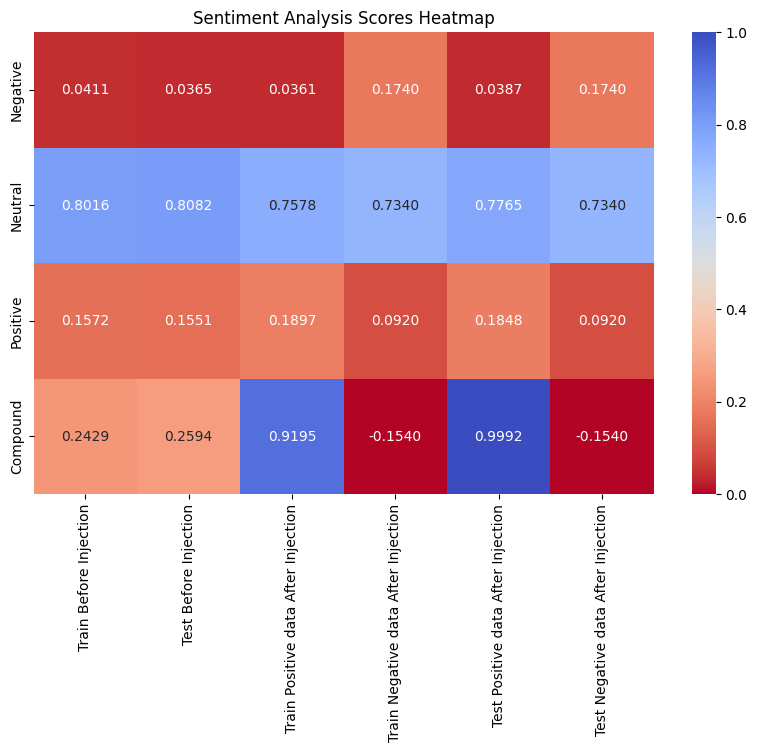

In [11]:
# Prepare the data
data = {
    'Train Before Injection': [0.0411, 0.8016, 0.1572, 0.2429],
    'Test Before Injection': [0.0365, 0.8082, 0.1551, 0.2594],
    'Train Positive data After Injection': [0.0361, 0.7578, 0.1897, 0.9195],
    'Train Negative data After Injection': [0.174, 0.734, 0.092, -0.1540],
    'Test Positive data After Injection': [0.0387, 0.7765, 0.1848, 0.9992],
    'Test Negative data After Injection': [0.174, 0.734, 0.092, -0.1540]
}

# Define the sentiment categories
categories = ['Negative', 'Neutral', 'Positive', 'Compound']

# Create a dataframe
df = pd.DataFrame(data, index=categories)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm_r", cbar=True, vmin=0, vmax=1.0, fmt=".4f")
plt.title('Sentiment Analysis Scores Heatmap')
plt.show()